In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np

from mopet import mopet

from synchronization import plots
from synchronization import runner
from synchronization import constants

# ING Network

In this notebook we model two interconnected inhibitory networks. Gamma rhythm is created by ING mechanism.

We explore the effect on noise strength and try to replicate Meng & Rieckes result.

Based on our findings for the ING model, we move forward to the PING model.

In [66]:
params = {
    "runtime": 500.0,
    
    "ou_enabled": [False, False],
    
    "model_EI": False,
    
    "poisson_enabled": [True, True],
    "poisson_variance": 0.5,
    "poisson_p": 0.75,
    "poisson_size": 800,
    "poisson_mean_input": 200,
    "poisson_I_enabled": True,
    "poisson_I_ratio": 1.0,
    
    "N_pop": 2,
    "net_record_spikes": 200,    
    
    # Only Synaptic Strengths for I<->I.
    "J_ppee": 0.0,
    "J_ppei": 0.0,
    "J_ppii": 0.2,
    
    "J_itoi": 1.0,
    "J_etoe": 0.0,
    "J_etoi": 0.0,
    "J_itoe": 0.0,
    
    # Only connectivity for I to I, all-to-all.
    "p_ppee": 0.00,
    "p_ppei": 0.00,
    "p_ppii": 1.0,
    "p_etoi": 0.0,
    "p_etoe": 0,
    "p_itoe": 0.0,
    "p_itoi": 1.0,
    
    "syn_net_inh": True,
    "syn_net_exc": False,
    
    # Time Constants
    "tau_GABA": 9.0,
    
    #
    "N_e": 1,
    "N_i": 1000,
}

## ING Network with weak coupling and weak noise

We expect to see then almost no overlap in the area around the dominant frequency.

In [73]:
params_mid = dict(params)
params_mid.update({
    "runtime": 5000,
    "J_ppii": 0.1,
    "J_itoi": 0.6,
    "poisson_variance": 0.5
})

In [74]:
model = runner.run(
    modified_params=params_mid
)

Initializing net ...
Net 1 - poisson rate 80000.0 - single neuron 100.0 - strength 0.0025
Poisson rate to I pop: 100.0
Net 2 - rate for single neuron 75.0
Initialization time: 0.4936859607696533s
Starting simulation at t=0. s for a duration of 5. s
1.1422 s (22%) simulated in 10s, estimated 34s remaining.
2.2888 s (45%) simulated in 20s, estimated 24s remaining.
3.48315 s (69%) simulated in 30s, estimated 13s remaining.
4.666 s (93%) simulated in 40s, estimated 3s remaining.
5. s (100%) simulated in 42s
runtime: 49.3


Global Order Parameter value of: 0.68528303267238
Mean Phase Coherence 0.12151425643404416
Computing within synchronization for network 1 and 2
Within Synchronization of Network 1 0.904608625468077
Within Synchronization of Network 2 0.9040963378306304


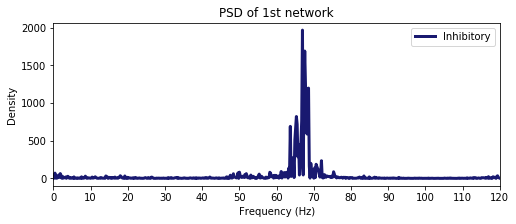

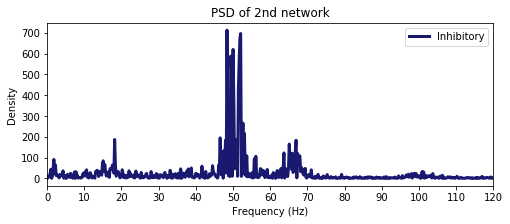

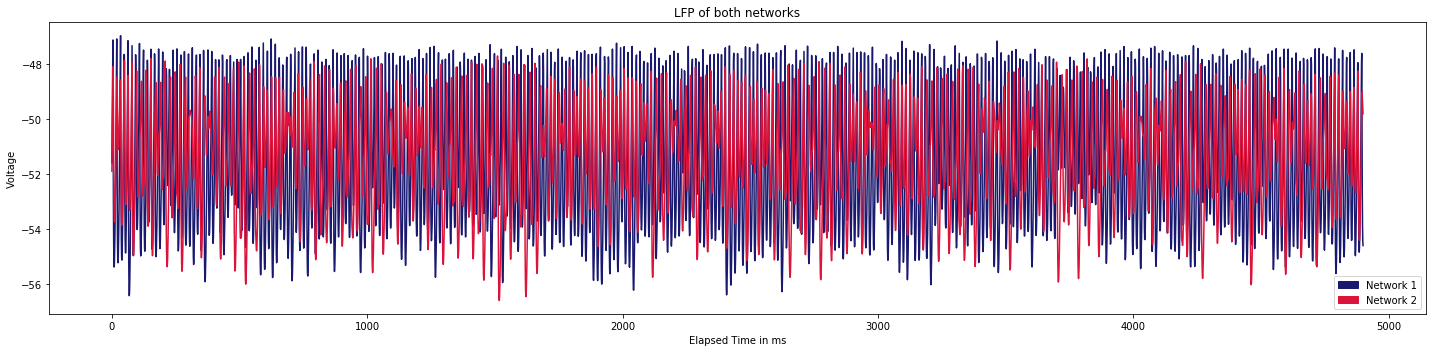

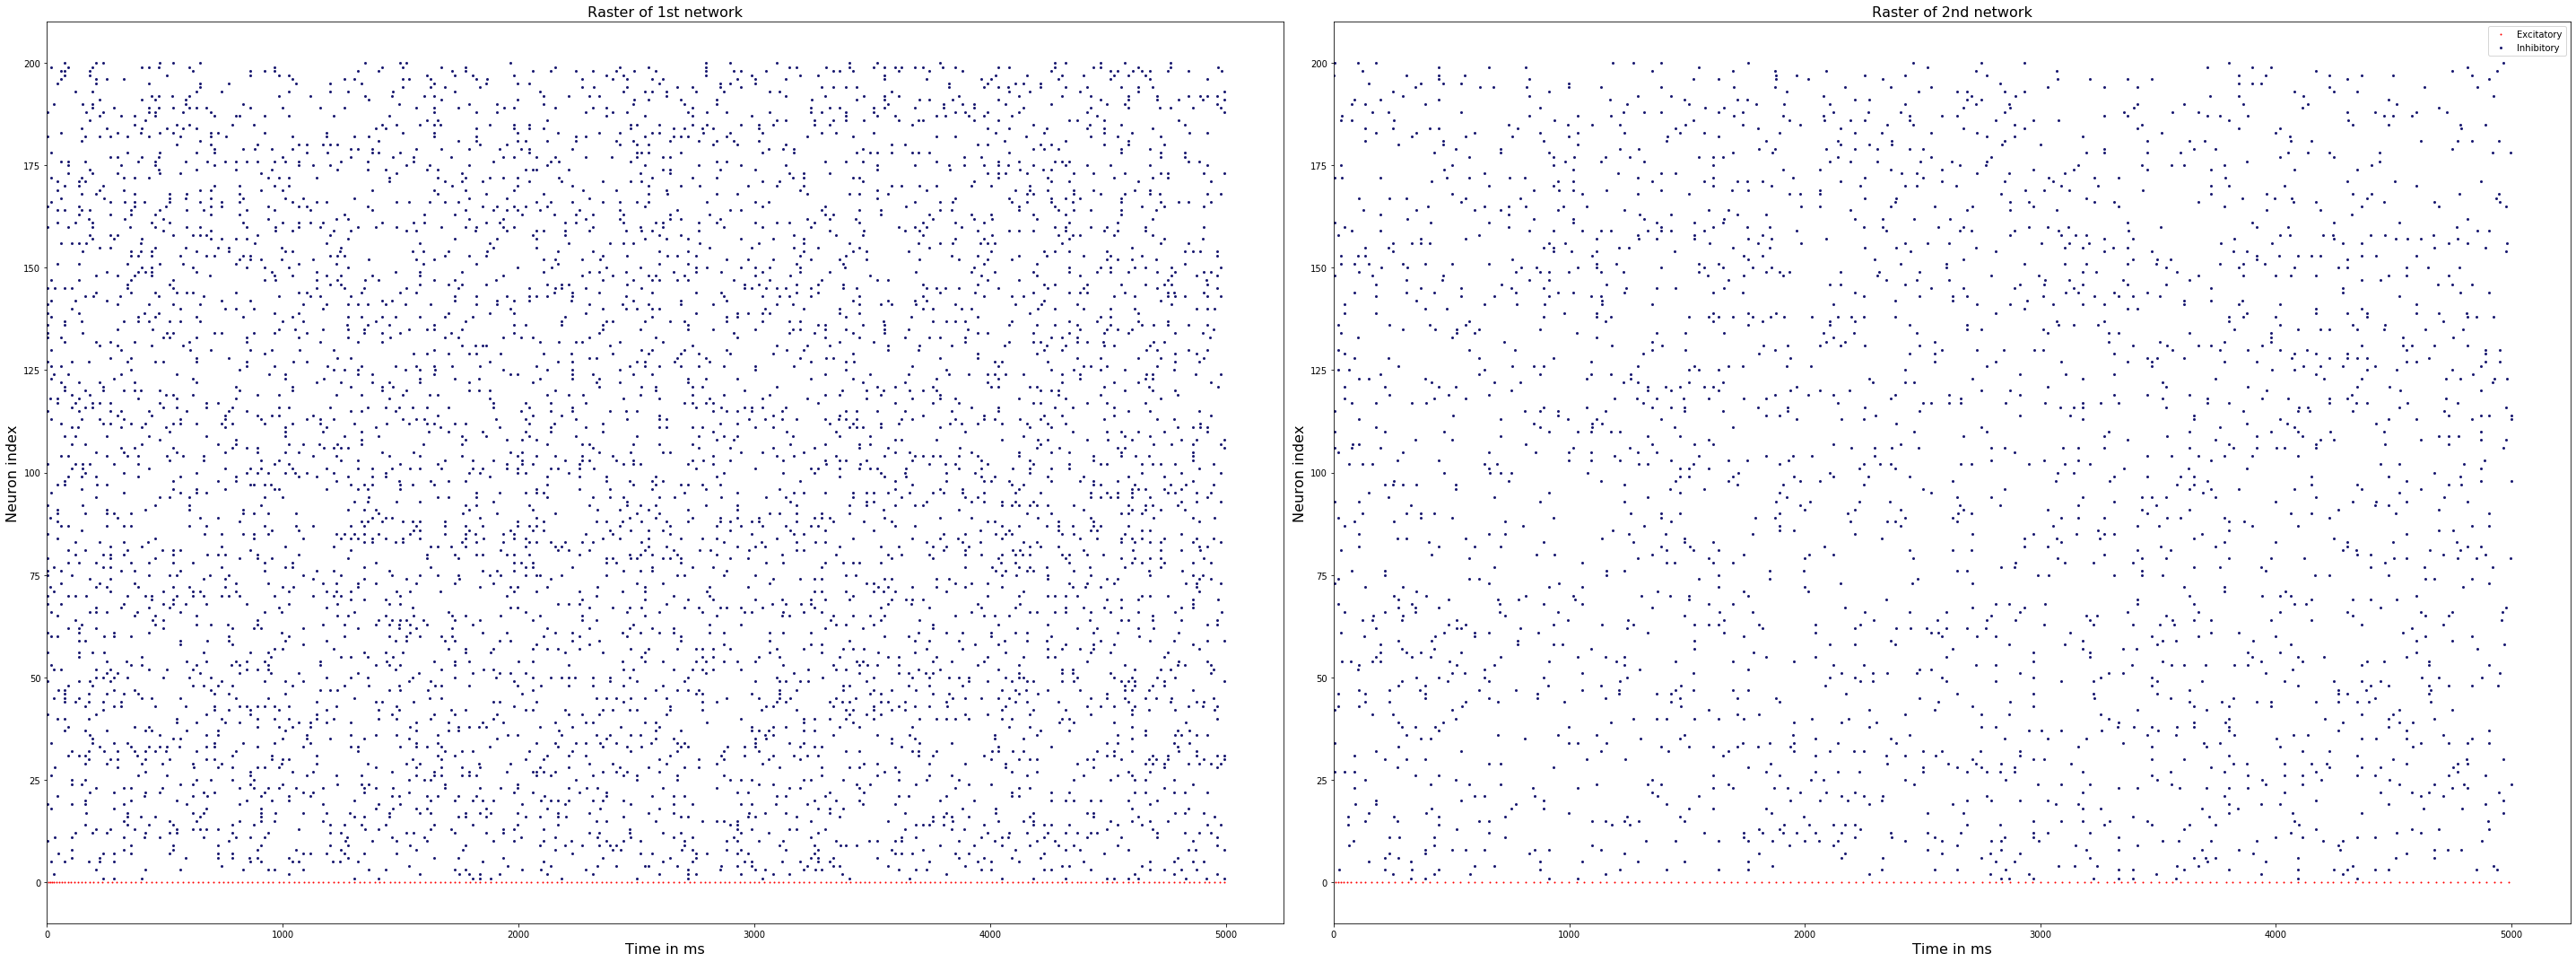

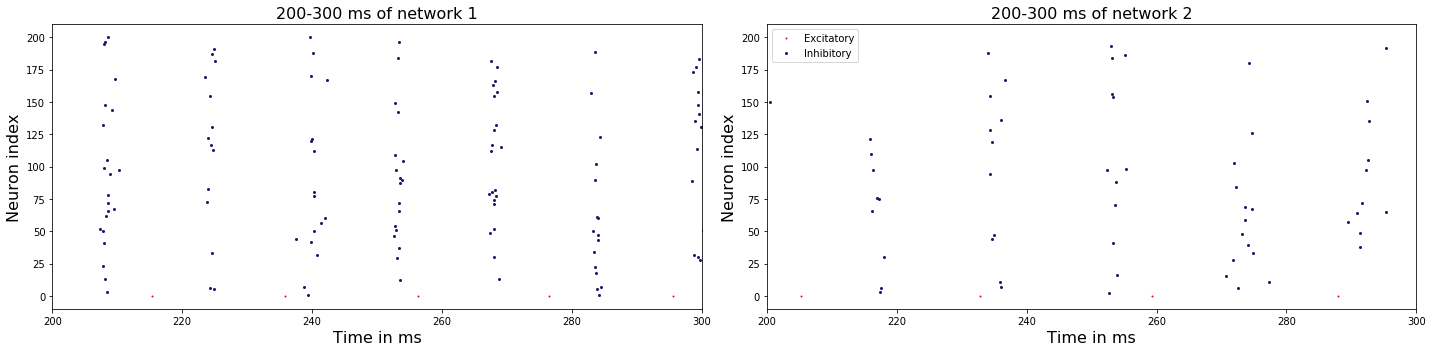

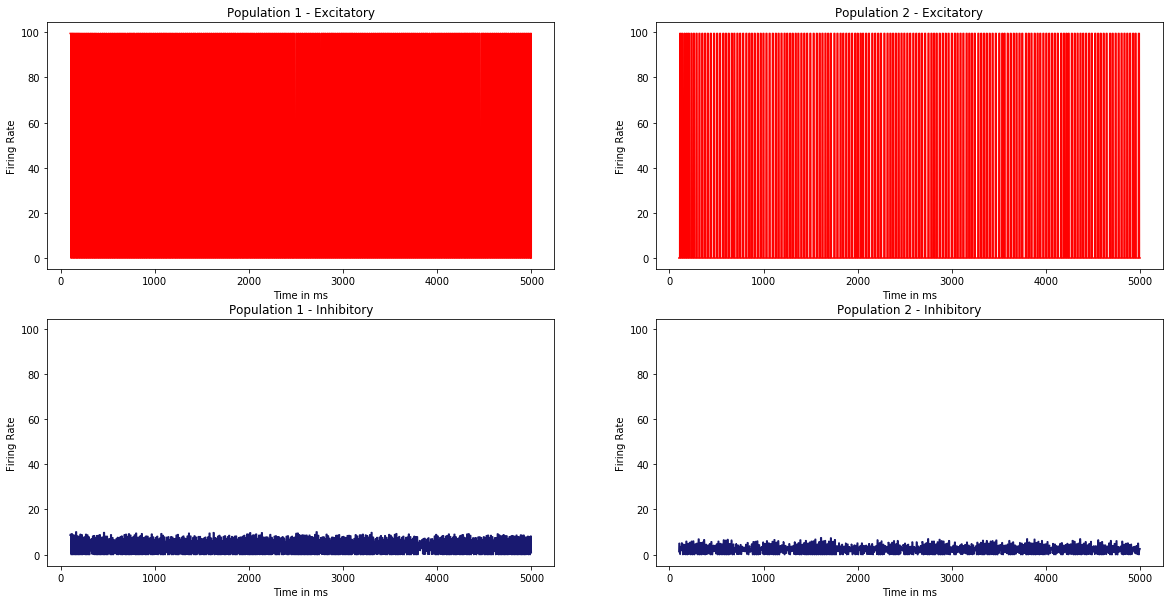

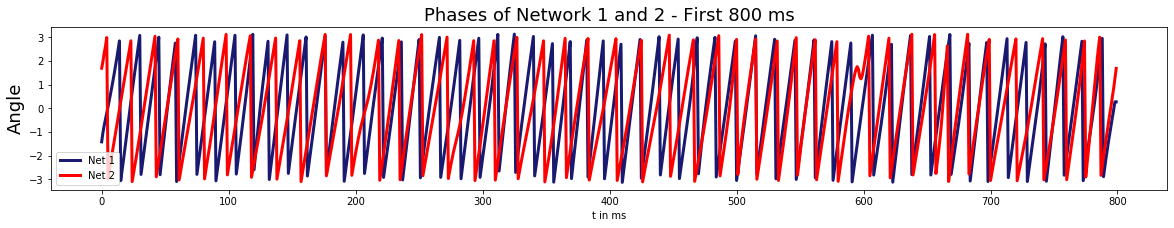

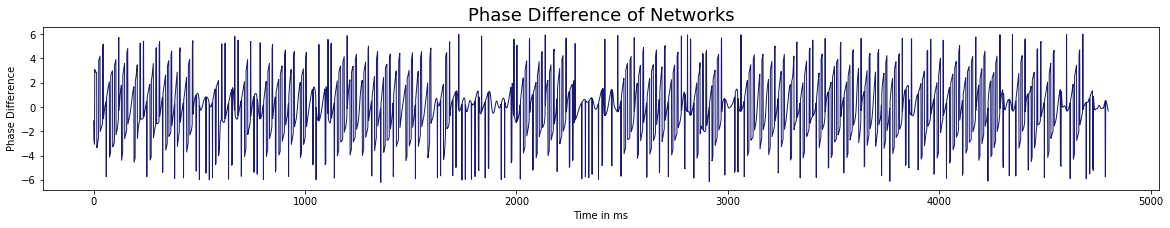

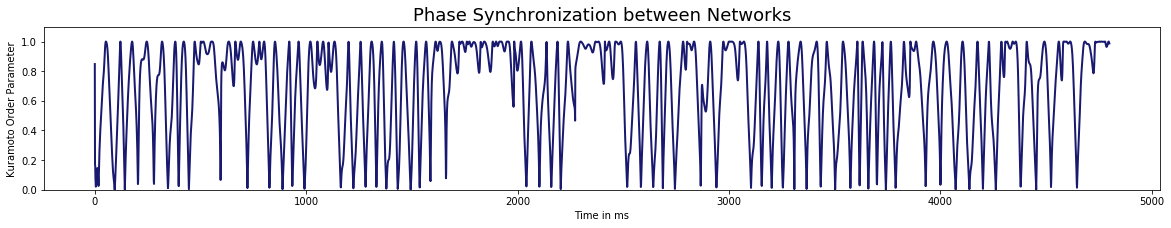

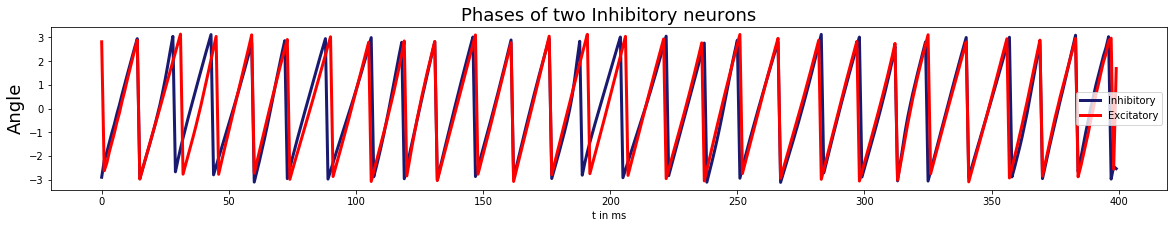

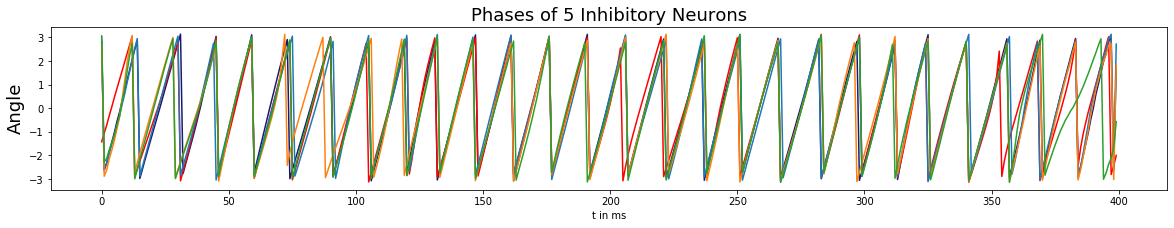

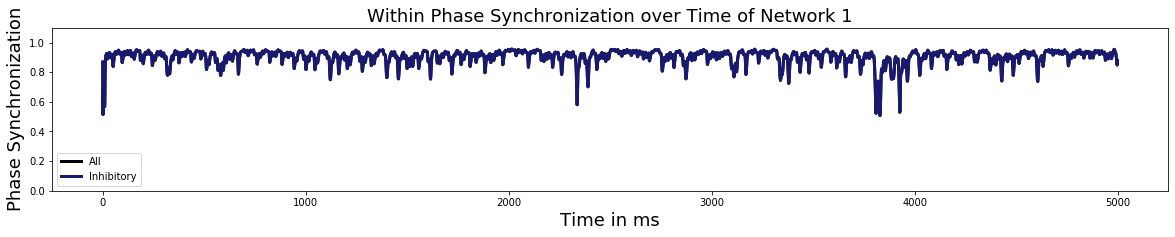

In [75]:
plots.plot_results(model, full_raster=True, psd_group="INH")

## Synchronizing both Networks by increasing network coupling

Increased network coupling will synchronize both networks.

Initializing net ...
Net 1 - poisson rate 80000.0 - single neuron 100.0 - strength 0.0025
Poisson rate to I pop: 100.0
Net 2 - rate for single neuron 75.0
Initialization time: 0.3508620262145996s
Starting simulation at t=0. s for a duration of 5. s
1.5025 s (30%) simulated in 10s, estimated 23s remaining.
2.9825 s (59%) simulated in 20s, estimated 14s remaining.
4.3664 s (87%) simulated in 30s, estimated 4s remaining.
5. s (100%) simulated in 34s
runtime: 40.7
Global Order Parameter value of: 0.9343339430277741
Mean Phase Coherence 0.7880254740840155
Computing within synchronization for network 1 and 2
Within Synchronization of Network 1 0.8893410054679931
Within Synchronization of Network 2 0.9165165763323723


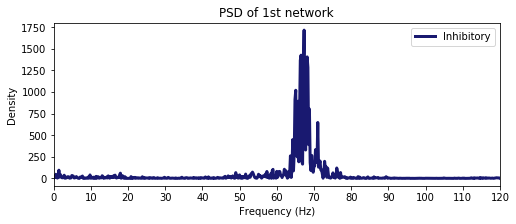

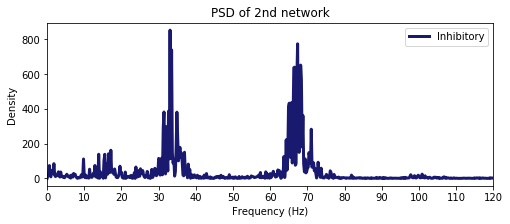

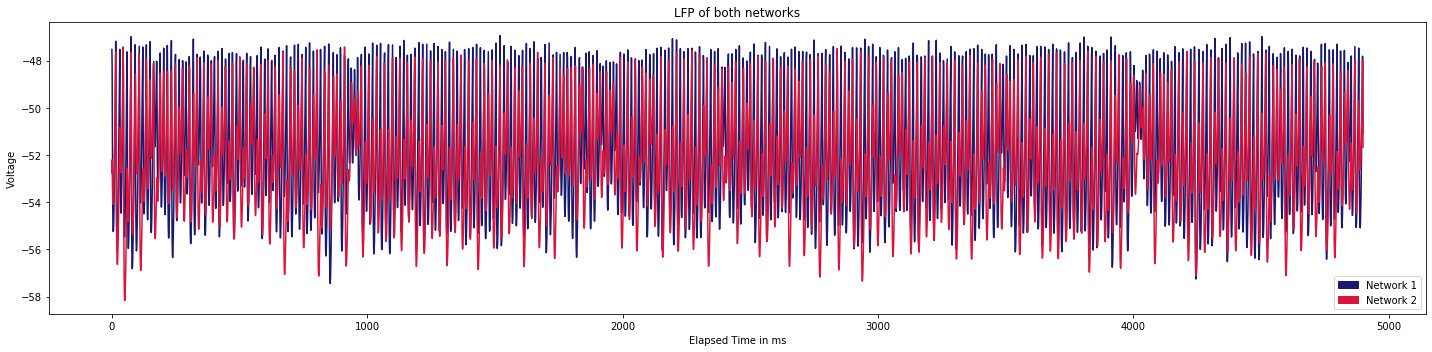

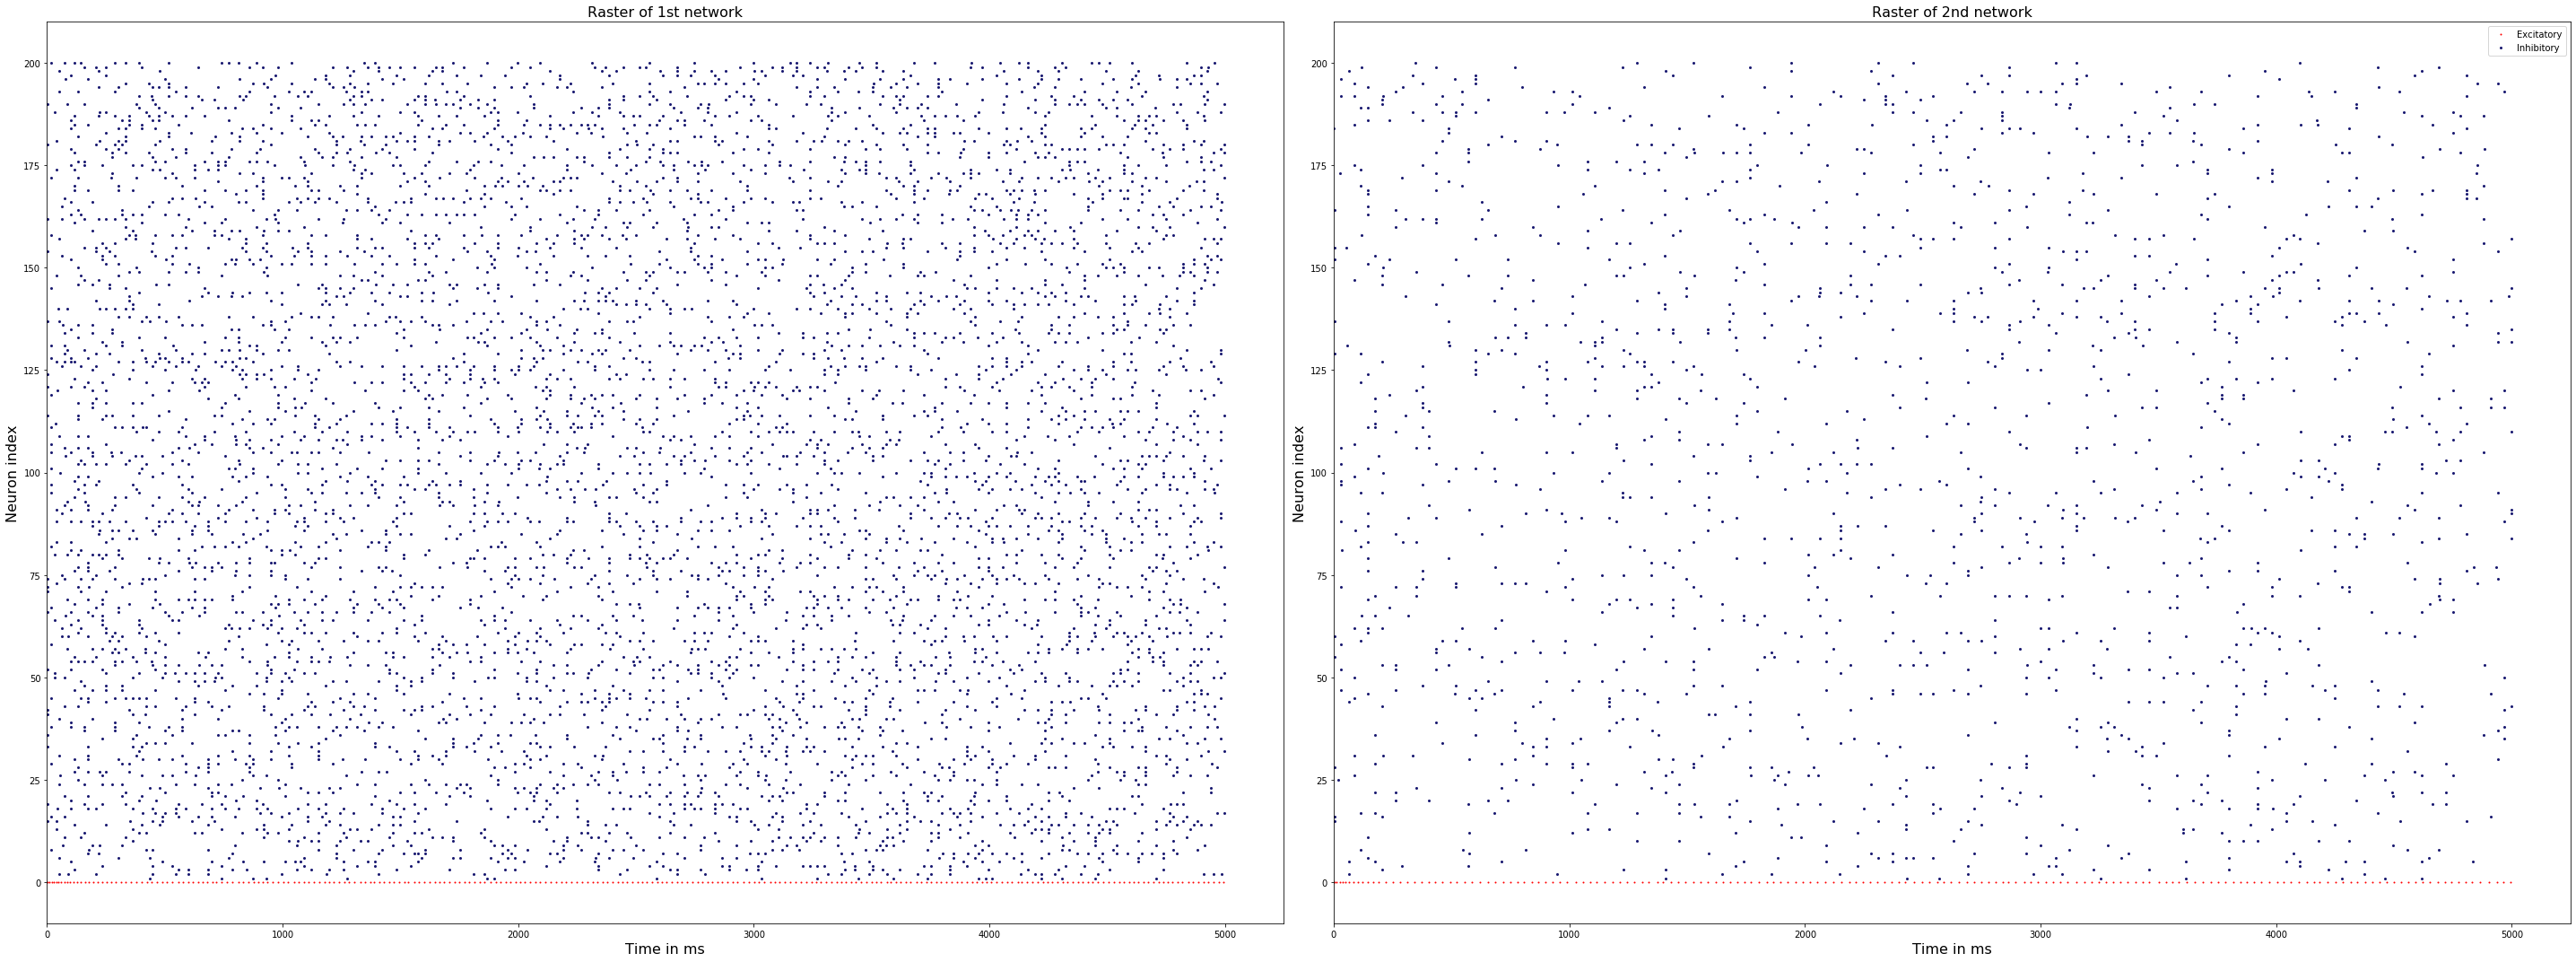

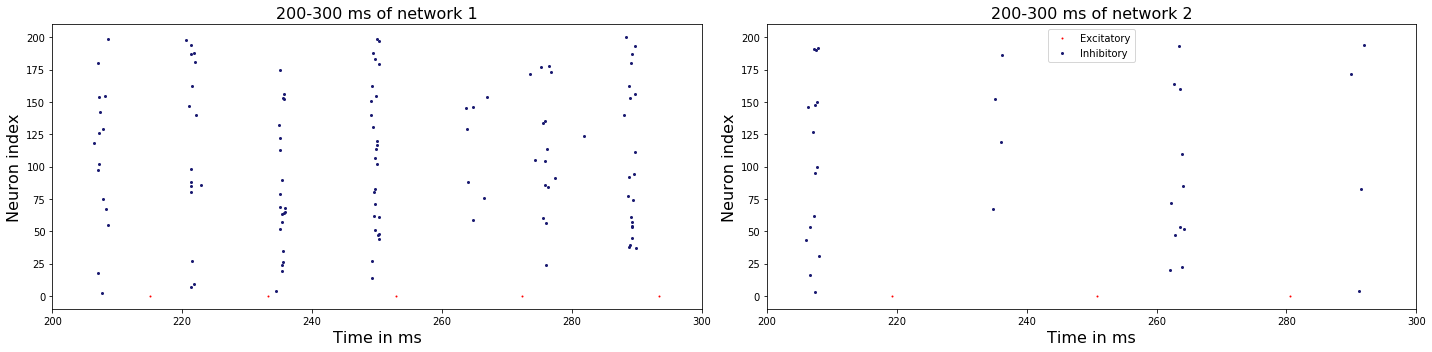

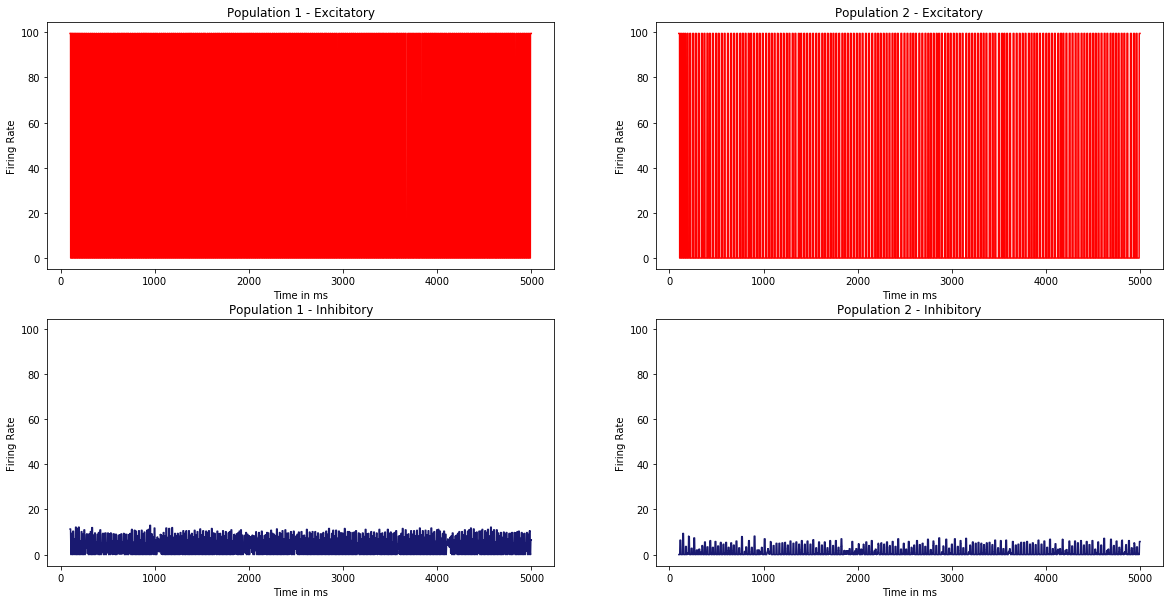

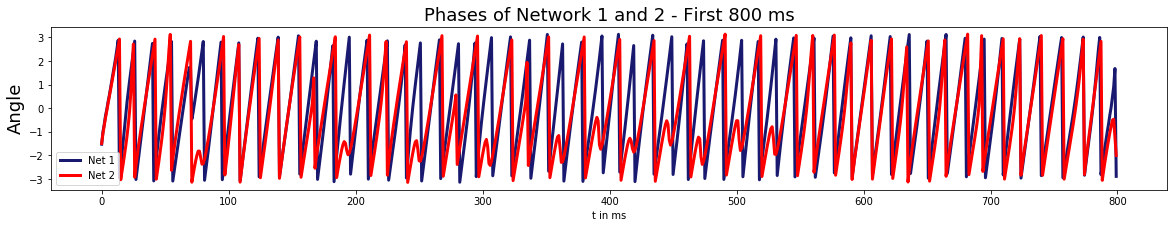

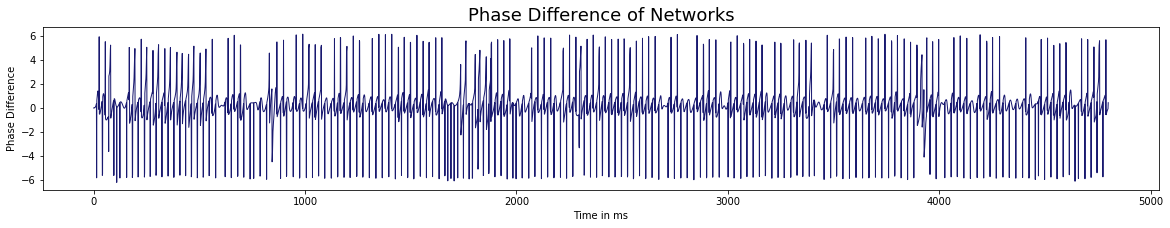

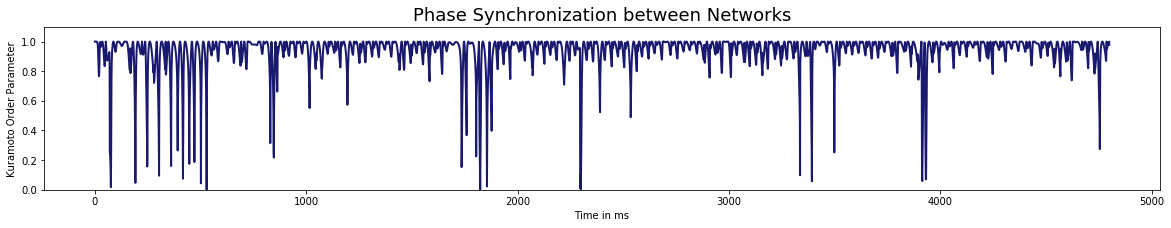

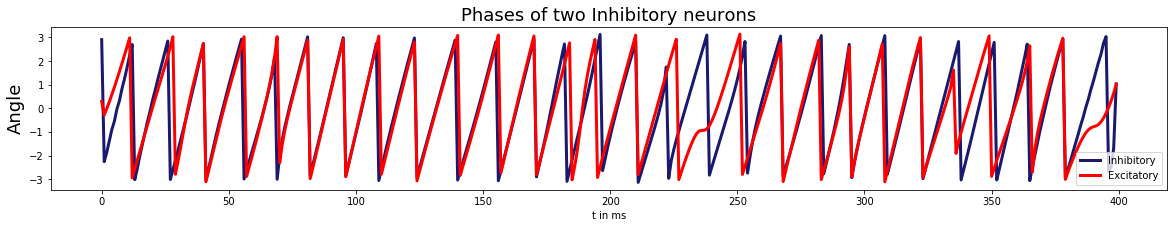

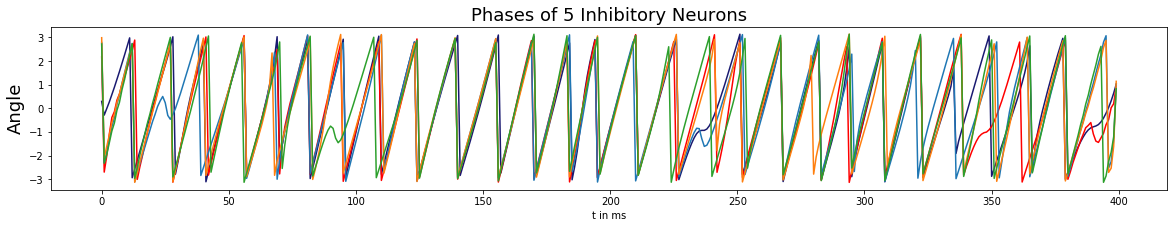

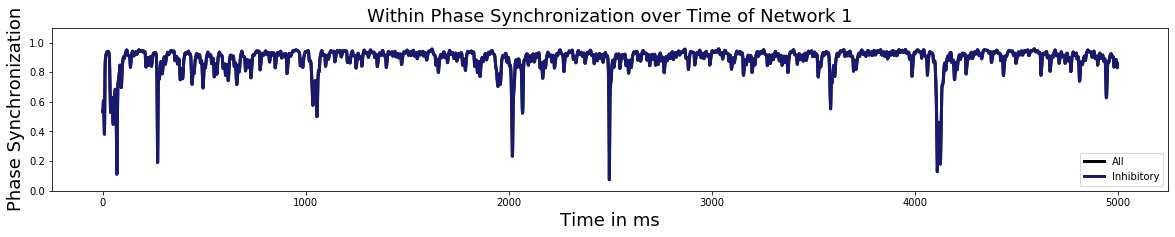

In [41]:
synch = dict(params)
synch.update({
    "J_ppii": 0.5,
    "runtime": 5000,
})
model = runner.run(
    modified_params=synch
)

plots.plot_results(model, full_raster=True, psd_group="INH")

In [42]:
synch = dict(params)
synch.update({
    "J_ppii": 0.7,
    "runtime": 5000,
})
model = runner.run(
    modified_params=synch
)

Initializing net ...
Net 1 - poisson rate 80000.0 - single neuron 100.0 - strength 0.0025
Poisson rate to I pop: 100.0
Net 2 - rate for single neuron 75.0
Initialization time: 0.3974800109863281s
Starting simulation at t=0. s for a duration of 5. s
1.3829 s (27%) simulated in 10s, estimated 26s remaining.
2.73115 s (54%) simulated in 20s, estimated 17s remaining.
4.09605 s (81%) simulated in 30s, estimated 7s remaining.
5. s (100%) simulated in 36s
runtime: 42.9


Global Order Parameter value of: 0.9882644710609799
Mean Phase Coherence 0.9997175803435603
Computing within synchronization for network 1 and 2
Within Synchronization of Network 1 0.8770803532813417
Within Synchronization of Network 2 0.9735217799744381


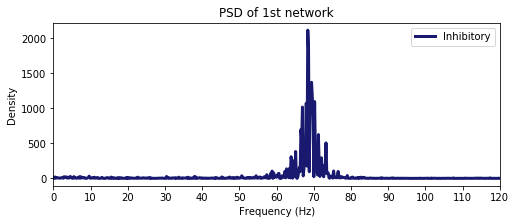

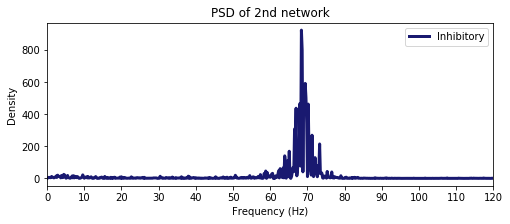

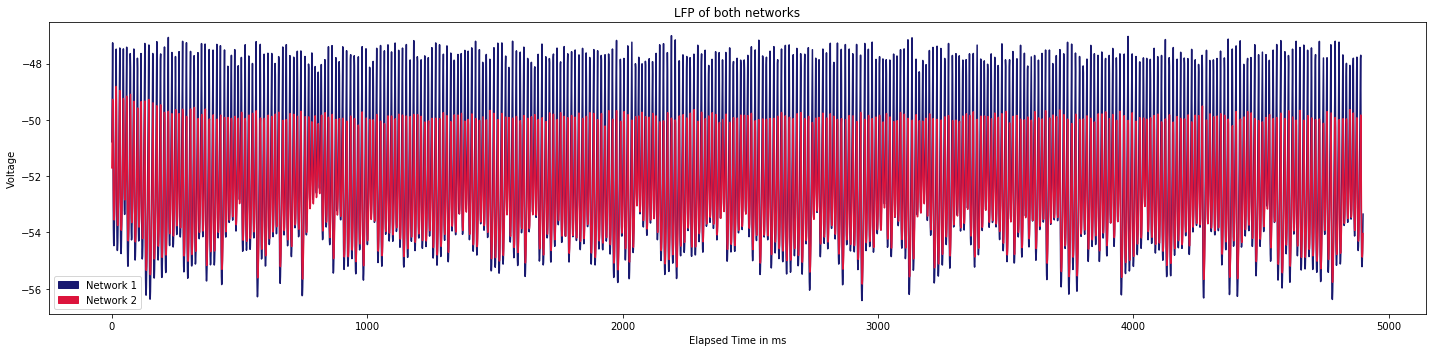

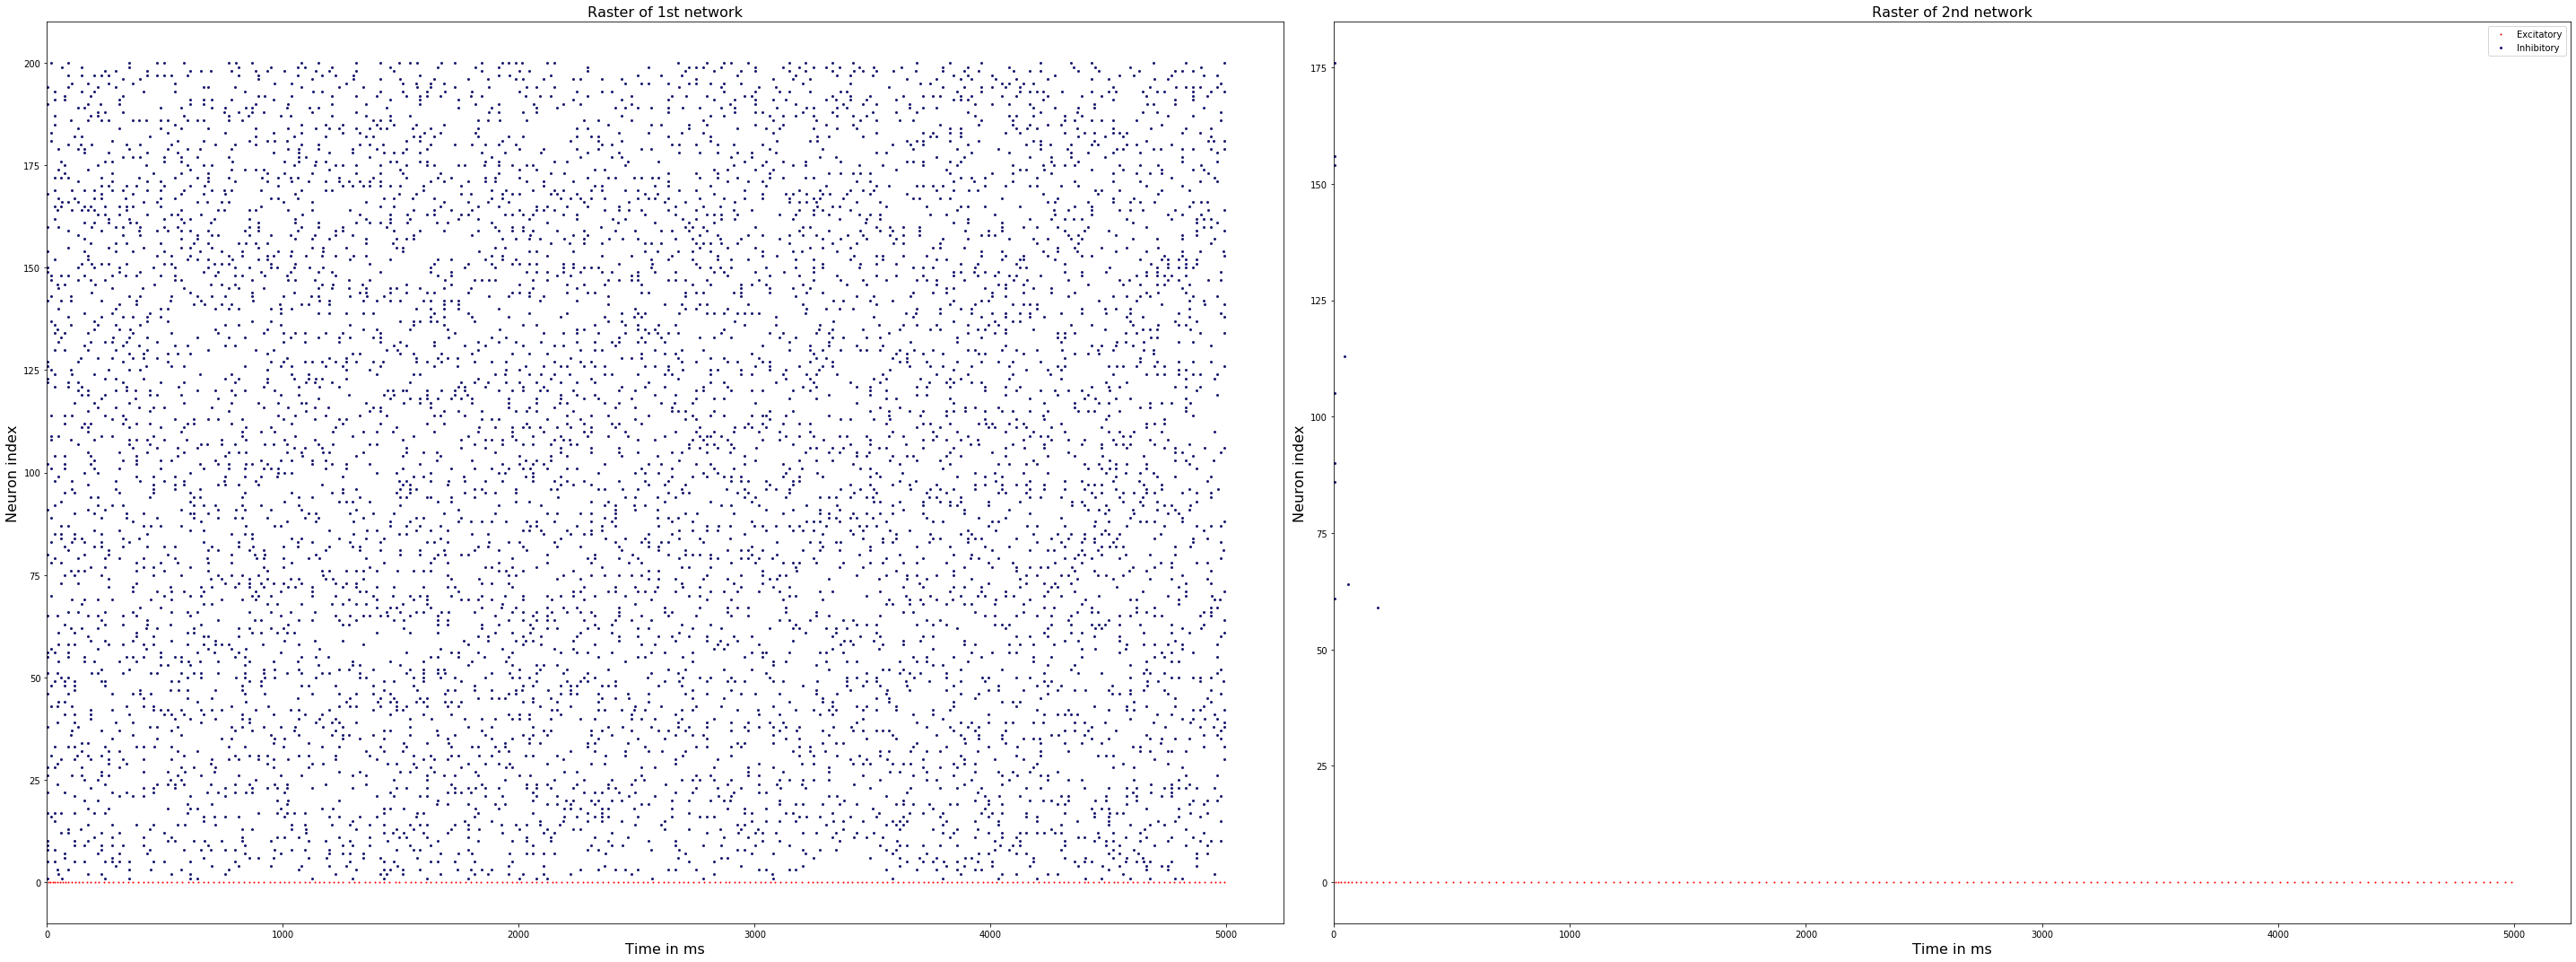

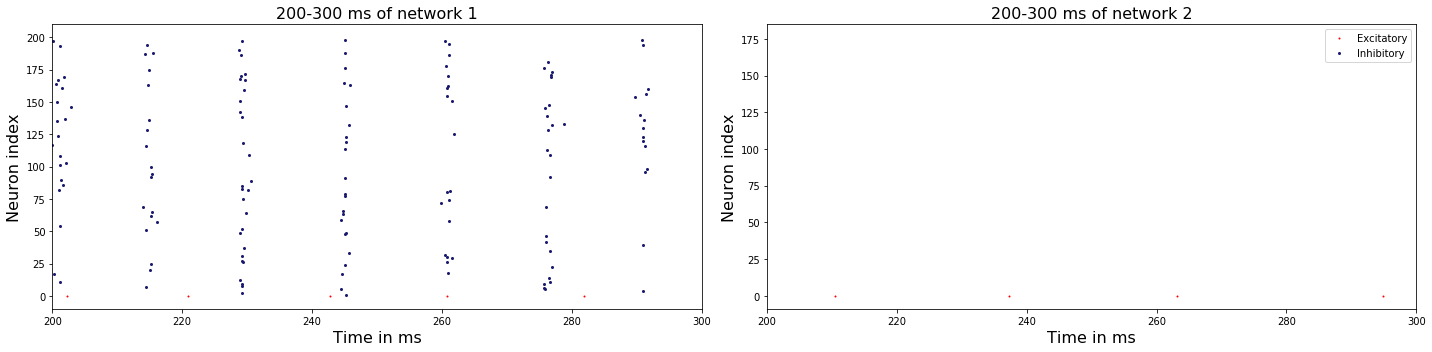

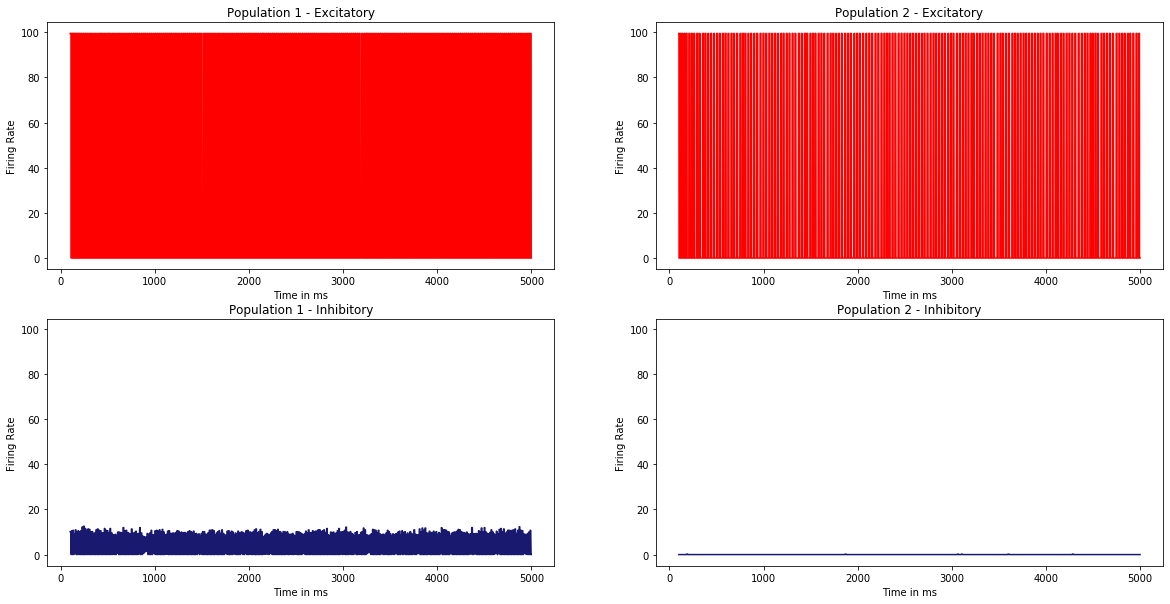

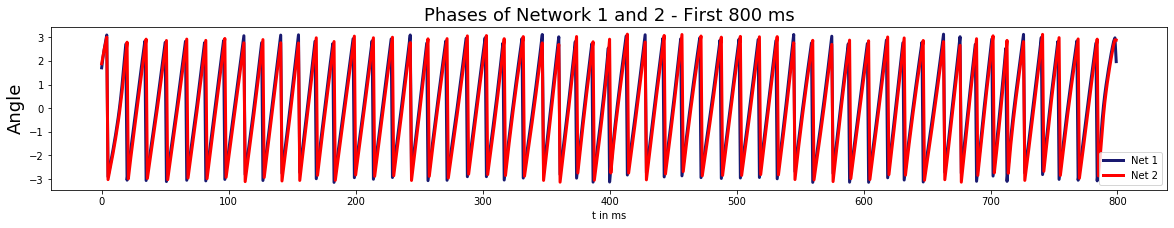

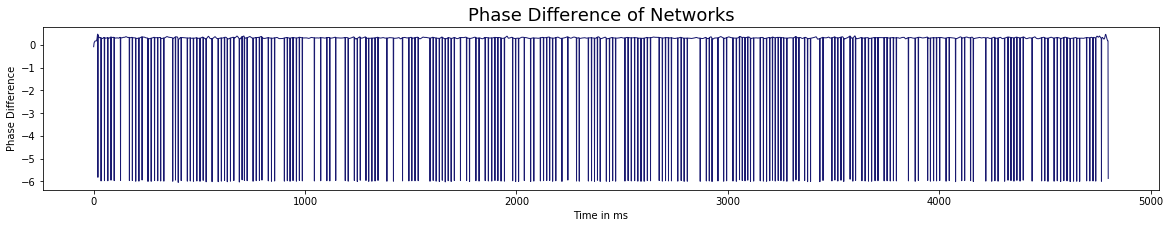

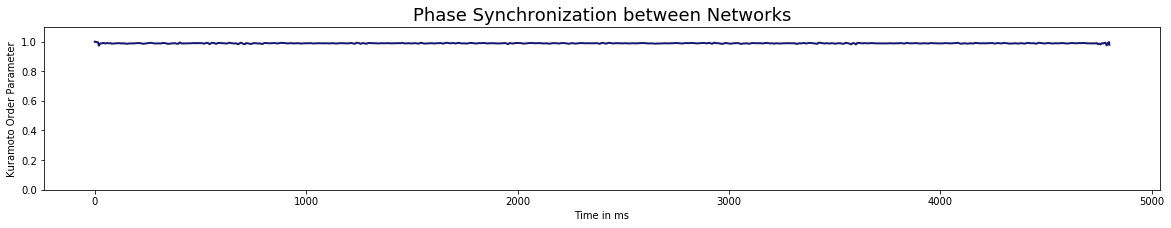

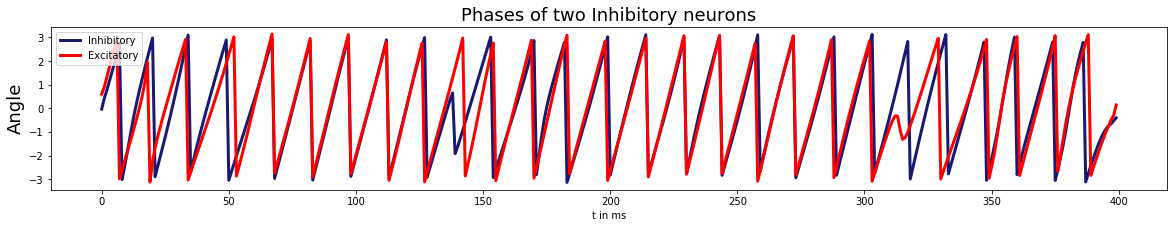

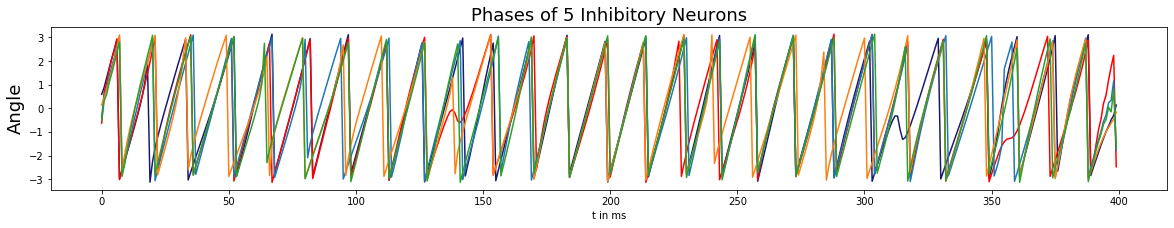

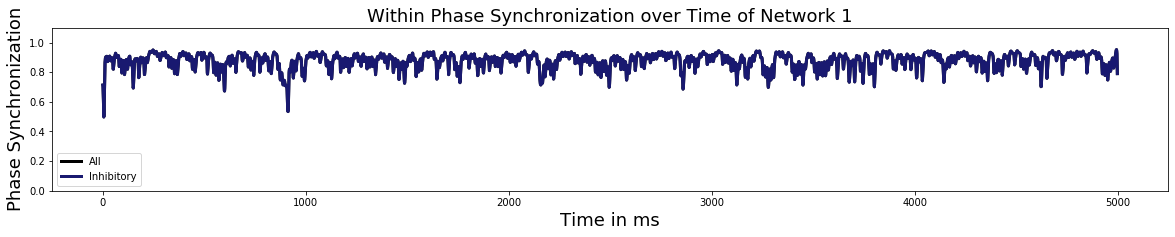

In [43]:
plots.plot_results(model, full_raster=True, psd_group="INH")

## Synchronizing both networks by increasing noise strength

In [78]:
synch = dict(params)
synch.update({
    "J_ppii": 0.2,
    "J_itoi": 0.7,
    "runtime": 1000.0,
    "poisson_variance": 2.0,
    "const_delay": 0.0,
    "poisson_p": 0.82,
})

model = runner.run(
    modified_params=synch
)

Initializing net ...
Net 1 - poisson rate 20000.0 - single neuron 25.0 - strength 0.01
Poisson rate to I pop: 25.0
Net 2 - rate for single neuron 20.5
Initialization time: 0.5190420150756836s
Starting simulation at t=0. s for a duration of 1. s
1. s (100%) simulated in 7s
runtime: 13.2


Global Order Parameter value of: 0.6131317400944316
Mean Phase Coherence 0.05597005101830955
Computing within synchronization for network 1 and 2
Within Synchronization of Network 1 0.20631427193490529
Within Synchronization of Network 2 0.3120796286264488


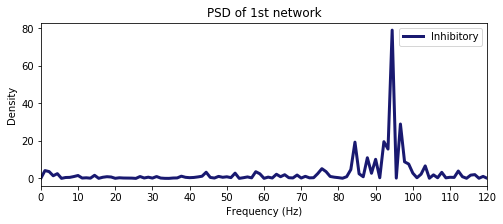

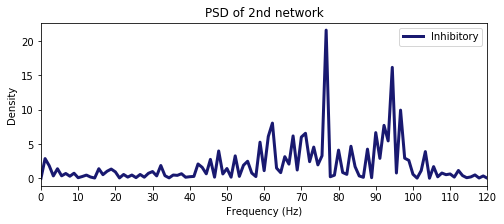

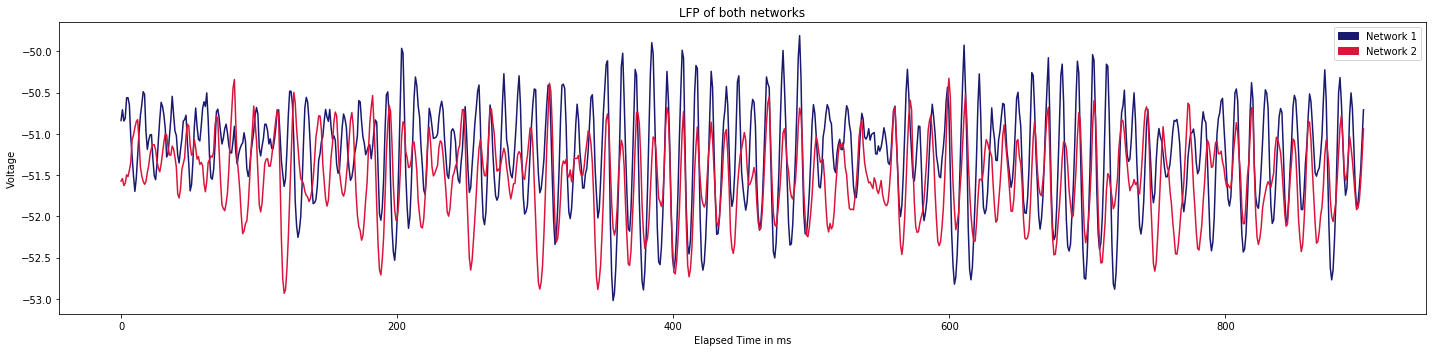

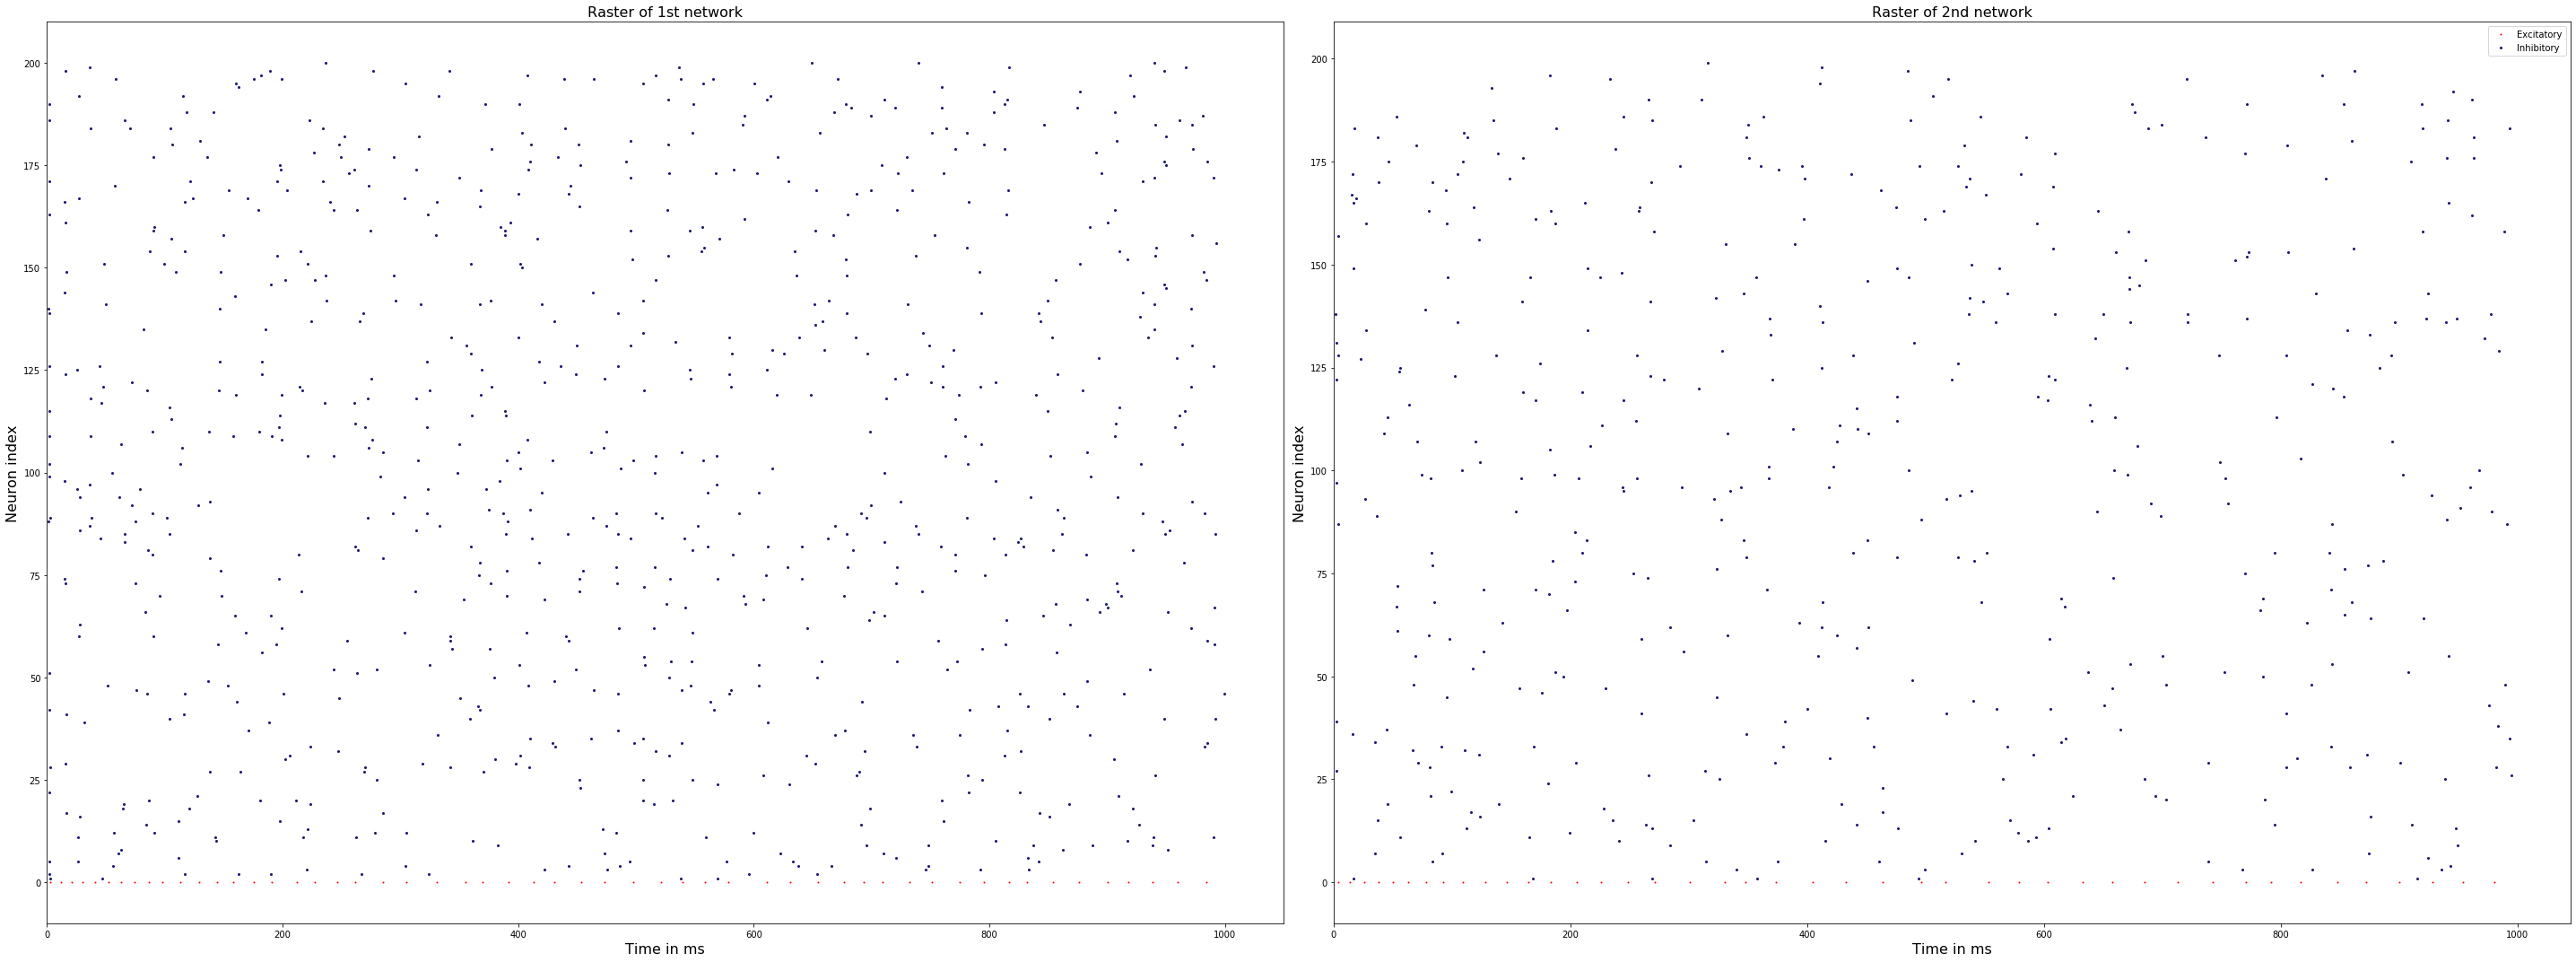

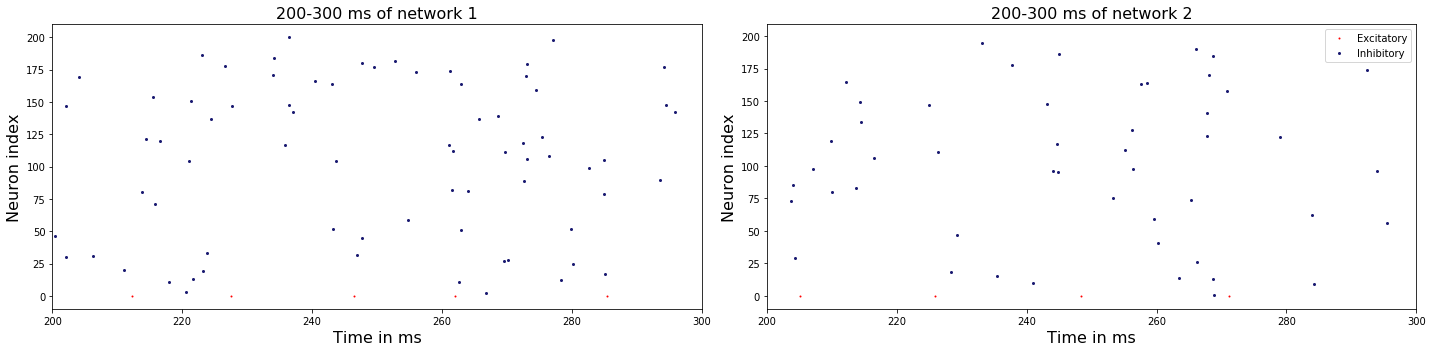

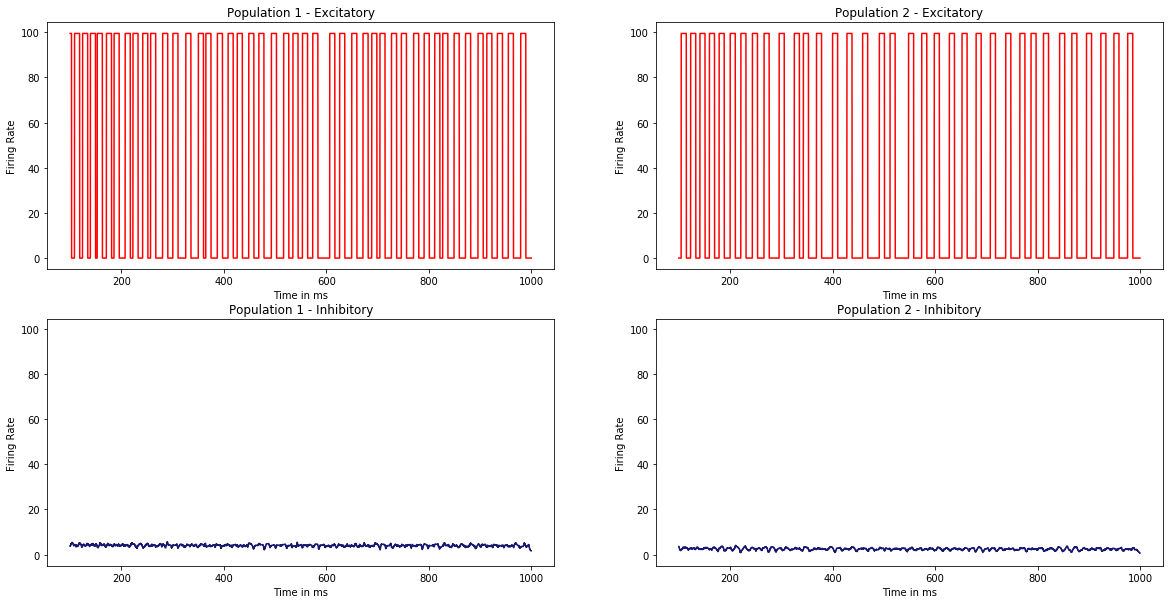

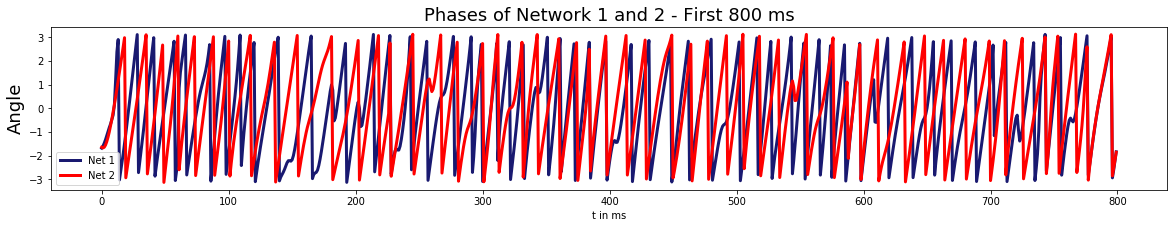

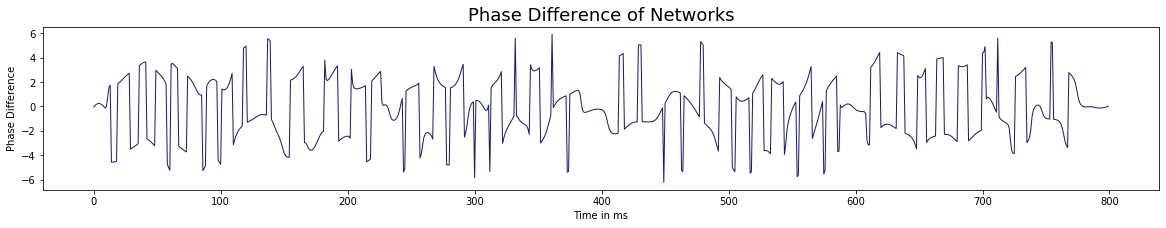

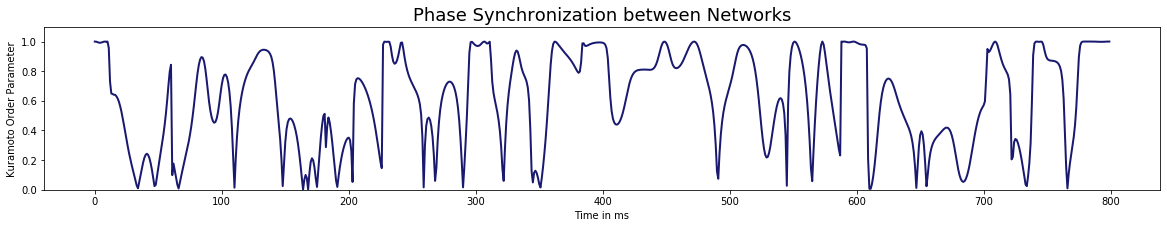

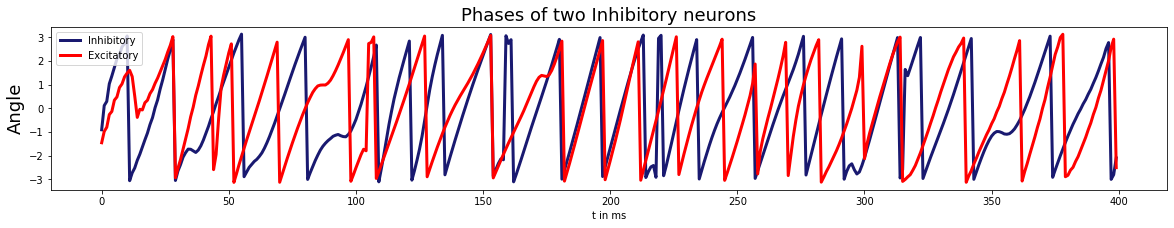

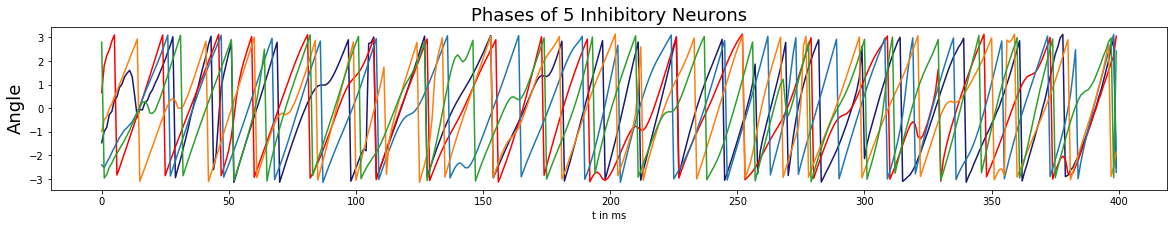

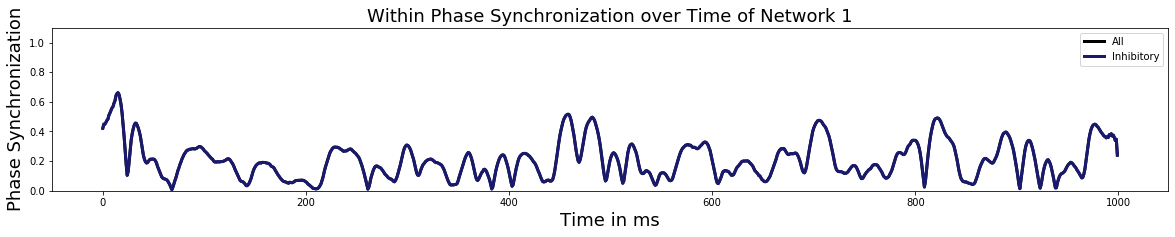

In [79]:
plots.plot_results(model, full_raster=True, psd_group="INH")

# Exploration

## Exploration over Noise Strength 

In [44]:
exp_params = {
    "poisson_variance": np.arange(0.5, 5.0, 0.1),
}

ov_params = dict(params)
ov_params.update({
    "runtime": 3000.0,
    "J_ppii": 0.3,
    "J_itoi": 0.6,
    "const_delay": 0.0
})

ex = mopet.Exploration(
    runner.run_in_mopet, 
    explore_params=exp_params, 
    default_params=ov_params,
    hdf_filename=constants.MODELS_PATH + "/ING_synch_noise.h5",
    exploration_name="exp_6"
)

In [45]:
ex.run()

2020-07-17 11:17:25,954	INFO resource_spec.py:212 -- Starting Ray with 9.47 GiB memory available for workers and up to 4.76 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-07-17 11:17:26,192	WARNING services.py:923 -- Redis failed to start, retrying now.
2020-07-17 11:17:26,360	INFO services.py:1165 -- View the Ray dashboard at localhost:8265
INFO:root:Starting 45 jobs.
100%|██████████| 45/45 [00:00<00:00, 684.07it/s]
INFO:root:Runs took 0.06898093223571777 s to submit.
  0%|          | 0/45 [00:00<?, ?it/s]

(pid=7530) Initializing net ...
(pid=7530) Net 1 - poisson rate 40000.00000000001 - single neuron 50.00000000000001 - strength 0.004999999999999999
(pid=7530) Poisson rate to I pop: 50.00000000000001
(pid=7529) Initializing net ...
(pid=7529) Net 1 - poisson rate 50000.0 - single neuron 62.5 - strength 0.004
(pid=7529) Poisson rate to I pop: 62.5
(pid=7539) Initializing net ...
(pid=7539) Net 1 - poisson rate 57142.85714285715 - single neuron 71.42857142857144 - strength 0.0034999999999999996
(pid=7539) Poisson rate to I pop: 71.42857142857144
(pid=7534) Initializing net ...
(pid=7534) Net 1 - poisson rate 66666.66666666667 - single neuron 83.33333333333334 - strength 0.003
(pid=7534) Poisson rate to I pop: 83.33333333333334
(pid=7533) Initializing net ...
(pid=7533) Net 1 - poisson rate 44444.444444444445 - single neuron 55.55555555555556 - strength 0.0045
(pid=7533) Poisson rate to I pop: 55.55555555555556
(pid=7536) Initializing net ...
(pid=7536) Net 1 - poisson rate 36363.63636363

  2%|▏         | 1/45 [01:58<1:26:45, 118.31s/it]

(pid=7534) Initializing net ...
(pid=7534) Net 1 - poisson rate 14814.81481481482 - single neuron 18.518518518518523 - strength 0.013499999999999996
(pid=7534) Poisson rate to I pop: 18.518518518518523
(pid=7532) Initializing net ...
(pid=7532) Net 1 - poisson rate 14285.714285714288 - single neuron 17.85714285714286 - strength 0.013999999999999997
(pid=7532) Poisson rate to I pop: 17.85714285714286


  4%|▍         | 2/45 [01:58<59:25, 82.91s/it]   

(pid=7536) Starting simulation at t=0. s for a duration of 3. s
(pid=7550) Initializing net ...
(pid=7550) Net 1 - poisson rate 22222.222222222223 - single neuron 27.77777777777778 - strength 0.009
(pid=7550) Poisson rate to I pop: 27.77777777777778
(pid=7534) Net 2 - rate for single neuron 13.888888888888893


  7%|▋         | 3/45 [01:58<40:41, 58.14s/it]

(pid=7532) Net 2 - rate for single neuron 13.392857142857146
(pid=7529) Initialization time: 1.499847173690796s


  9%|▉         | 4/45 [01:59<27:52, 40.79s/it]

(pid=7540) Starting simulation at t=0. s for a duration of 3. s


 11%|█         | 5/45 [01:59<19:06, 28.65s/it]

(pid=7550) Net 2 - rate for single neuron 20.833333333333336


 13%|█▎        | 6/45 [01:59<13:06, 20.16s/it]

(pid=7534) Initialization time: 1.5367019176483154s
(pid=7532) Initialization time: 1.5186069011688232s


 18%|█▊        | 8/45 [02:00<06:11, 10.03s/it]

(pid=7550) Initialization time: 1.798245906829834s
(pid=7529) Starting simulation at t=0. s for a duration of 3. s


 24%|██▍       | 11/45 [02:01<02:03,  3.64s/it]

(pid=7534) Starting simulation at t=0. s for a duration of 3. s
(pid=7532) Starting simulation at t=0. s for a duration of 3. s
(pid=7531) 0.3512 s (11%) simulated in 10s, estimated 1m 15s remaining.


 27%|██▋       | 12/45 [02:01<01:27,  2.64s/it]

(pid=7548) Initializing net ...
(pid=7548) Net 1 - poisson rate 19047.61904761905 - single neuron 23.80952380952381 - strength 0.010499999999999999
(pid=7548) Poisson rate to I pop: 23.80952380952381
(pid=7548) Net 2 - rate for single neuron 17.857142857142858
(pid=7548) Initialization time: 1.5486979484558105s
(pid=7530) 0.3502 s (11%) simulated in 10s, estimated 1m 16s remaining.
(pid=7533) 0.34855 s (11%) simulated in 10s, estimated 1m 16s remaining.
(pid=7549) Initializing net ...
(pid=7549) Net 1 - poisson rate 16000.000000000004 - single neuron 20.000000000000004 - strength 0.012499999999999997
(pid=7549) Poisson rate to I pop: 20.000000000000004
(pid=7549) Net 2 - rate for single neuron 15.000000000000004
(pid=7549) Initialization time: 1.6580889225006104s
(pid=7537) 0.3519 s (11%) simulated in 10s, estimated 1m 15s remaining.
(pid=7536) 0.35175 s (11%) simulated in 10s, estimated 1m 15s remaining.
(pid=7540) 0.3549 s (11%) simulated in 10s, estimated 1m 15s remaining.
(pid=7529

 29%|██▉       | 13/45 [03:20<13:34, 25.47s/it]

(pid=7531) Initializing net ...
(pid=7531) Net 1 - poisson rate 13793.103448275864 - single neuron 17.24137931034483 - strength 0.014499999999999997
(pid=7531) Poisson rate to I pop: 17.24137931034483
(pid=7529) 2.82245 s (94%) simulated in 1m 20s, estimated 5s remaining.
(pid=7550) 1.3635 s (45%) simulated in 40s, estimated 48s remaining.
(pid=7531) Net 2 - rate for single neuron 12.931034482758623
(pid=7534) 2.86695 s (95%) simulated in 1m 20s, estimated 4s remaining.
(pid=7532) 2.8696 s (95%) simulated in 1m 20s, estimated 4s remaining.
(pid=7531) Initialization time: 1.5468170642852783s
(pid=7530) Initializing net ...
(pid=7530) Net 1 - poisson rate 13333.333333333336 - single neuron 16.66666666666667 - strength 0.014999999999999998
(pid=7530) Poisson rate to I pop: 16.66666666666667
(pid=7548) 1.36275 s (45%) simulated in 40s, estimated 48s remaining.
(pid=7537) 3. s (100%) simulated in 1m 25s
(pid=7537) runtime: 87.6
(pid=7531) Starting simulation at t=0. s for a duration of 3. s

 31%|███       | 14/45 [04:14<17:30, 33.88s/it]

(pid=7531) 1.7121 s (57%) simulated in 50s, estimated 38s remaining.


 33%|███▎      | 15/45 [04:14<11:54, 23.80s/it]

(pid=7529) 1.39675 s (46%) simulated in 40s, estimated 46s remaining.
(pid=7550) Initializing net ...
(pid=7550) Net 1 - poisson rate 10526.315789473687 - single neuron 13.157894736842108 - strength 0.018999999999999996
(pid=7550) Poisson rate to I pop: 13.157894736842108


 36%|███▌      | 16/45 [04:14<08:05, 16.75s/it]

(pid=7550) Net 2 - rate for single neuron 9.86842105263158
(pid=7549) INFO       width adjusted from 10. ms to 10.05 ms [brian2.monitors.ratemonitor.adjusted_width]
(pid=7549) 3. s (100%) simulated in 1m 27s
(pid=7549) runtime: 128.3
(pid=7550) Initialization time: 1.4115710258483887s


 40%|████      | 18/45 [04:16<03:54,  8.69s/it]

(pid=7548) Initializing net ...
(pid=7548) Net 1 - poisson rate 10256.410256410258 - single neuron 12.820512820512823 - strength 0.019499999999999997
(pid=7548) Poisson rate to I pop: 12.820512820512823
(pid=7530) 1.71735 s (57%) simulated in 50s, estimated 37s remaining.


 42%|████▏     | 19/45 [04:17<02:41,  6.19s/it]

(pid=7548) Net 2 - rate for single neuron 9.615384615384617


 44%|████▍     | 20/45 [04:17<01:50,  4.43s/it]

(pid=7533) 1.70885 s (56%) simulated in 50s, estimated 38s remaining.
(pid=7548) Initialization time: 1.3933451175689697s


 47%|████▋     | 21/45 [04:19<01:30,  3.77s/it]

(pid=7549) Initializing net ...
(pid=7549) Net 1 - poisson rate 10000.000000000002 - single neuron 12.500000000000002 - strength 0.019999999999999997
(pid=7549) Poisson rate to I pop: 12.500000000000002


 51%|█████     | 23/45 [04:20<00:44,  2.03s/it]

(pid=7549) Net 2 - rate for single neuron 9.375000000000002


 53%|█████▎    | 24/45 [04:20<00:32,  1.53s/it]

(pid=7549) Initialization time: 1.674088954925537s
(pid=7537) 1.71995 s (57%) simulated in 50s, estimated 37s remaining.
(pid=7540) 1.7413 s (58%) simulated in 50s, estimated 36s remaining.
(pid=7536) 1.71545 s (57%) simulated in 50s, estimated 37s remaining.
(pid=7534) 1.75165 s (58%) simulated in 50s, estimated 36s remaining.
(pid=7532) 1.74695 s (58%) simulated in 50s, estimated 36s remaining.
(pid=7531) 2.04215 s (68%) simulated in 1m 0s, estimated 28s remaining.
(pid=7529) 1.72695 s (57%) simulated in 50s, estimated 37s remaining.
(pid=7530) 2.0411 s (68%) simulated in 1m 0s, estimated 28s remaining.
(pid=7533) 2.0242 s (67%) simulated in 1m 0s, estimated 29s remaining.
(pid=7537) 2.0476 s (68%) simulated in 1m 0s, estimated 28s remaining.
(pid=7540) 2.0772 s (69%) simulated in 1m 0s, estimated 27s remaining.
(pid=7536) 2.05165 s (68%) simulated in 1m 0s, estimated 28s remaining.
(pid=7534) 2.08945 s (69%) simulated in 1m 0s, estimated 26s remaining.
(pid=7532) 2.08835 s (69%) sim

 56%|█████▌    | 25/45 [04:54<03:44, 11.22s/it]

(pid=7531) Initializing net ...
(pid=7531) Net 1 - poisson rate 9756.097560975611 - single neuron 12.195121951219514 - strength 0.020499999999999997
(pid=7531) Poisson rate to I pop: 12.195121951219514
(pid=7533) 3. s (100%) simulated in 1m 27s
(pid=7533) runtime: 89.0
(pid=7531) Net 2 - rate for single neuron 9.146341463414636
(pid=7550) 0.73135 s (24%) simulated in 20s, estimated 1m 2s remaining.
(pid=7531) Initialization time: 1.2949249744415283s


 58%|█████▊    | 26/45 [04:57<02:43,  8.62s/it]

(pid=7548) 0.72565 s (24%) simulated in 20s, estimated 1m 3s remaining.
(pid=7530) Initializing net ...
(pid=7530) Net 1 - poisson rate 9523.809523809525 - single neuron 11.904761904761905 - strength 0.020999999999999998
(pid=7530) Poisson rate to I pop: 11.904761904761905
(pid=7530) Net 2 - rate for single neuron 8.928571428571429
(pid=7531) Starting simulation at t=0. s for a duration of 3. s
(pid=7534) 3. s (100%) simulated in 1m 24s
(pid=7534) runtime: 86.3
(pid=7537) 3. s (100%) simulated in 1m 26s
(pid=7537) runtime: 88.1
(pid=7540) 3. s (100%) simulated in 1m 25s
(pid=7540) runtime: 86.9
(pid=7532) 3. s (100%) simulated in 1m 25s
(pid=7532) runtime: 86.9
(pid=7530) Initialization time: 1.4115698337554932s


 60%|██████    | 27/45 [04:59<02:00,  6.68s/it]

(pid=7533) Initializing net ...
(pid=7533) Net 1 - poisson rate 9302.325581395351 - single neuron 11.627906976744189 - strength 0.021499999999999995
(pid=7533) Poisson rate to I pop: 11.627906976744189
(pid=7536) 3. s (100%) simulated in 1m 26s
(pid=7536) runtime: 88.4
(pid=7529) 3. s (100%) simulated in 1m 25s
(pid=7529) runtime: 87.2
(pid=7533) Net 2 - rate for single neuron 8.720930232558143
(pid=7549) 0.71835 s (23%) simulated in 20s, estimated 1m 4s remaining.
(pid=7530) Starting simulation at t=0. s for a duration of 3. s
(pid=7533) Initialization time: 1.5673410892486572s
(pid=7533) Starting simulation at t=0. s for a duration of 3. s
(pid=7534) Initializing net ...
(pid=7534) Net 1 - poisson rate 9090.909090909094 - single neuron 11.363636363636367 - strength 0.021999999999999992
(pid=7534) Poisson rate to I pop: 11.363636363636367


 62%|██████▏   | 28/45 [05:02<01:37,  5.73s/it]

(pid=7537) Initializing net ...
(pid=7537) Net 1 - poisson rate 8888.88888888889 - single neuron 11.111111111111112 - strength 0.022499999999999996
(pid=7537) Poisson rate to I pop: 11.111111111111112
(pid=7540) Initializing net ...
(pid=7540) Net 1 - poisson rate 8695.652173913046 - single neuron 10.869565217391306 - strength 0.022999999999999993
(pid=7540) Poisson rate to I pop: 10.869565217391306
(pid=7534) Net 2 - rate for single neuron 8.522727272727275
(pid=7532) Initializing net ...
(pid=7532) Net 1 - poisson rate 8510.638297872341 - single neuron 10.638297872340427 - strength 0.023499999999999997
(pid=7532) Poisson rate to I pop: 10.638297872340427
(pid=7537) Net 2 - rate for single neuron 8.333333333333334
(pid=7540) Net 2 - rate for single neuron 8.15217391304348
(pid=7532) Net 2 - rate for single neuron 7.97872340425532
(pid=7534) Initialization time: 1.4416661262512207s


 67%|██████▋   | 30/45 [05:04<00:47,  3.19s/it]

(pid=7536) Initializing net ...
(pid=7536) Net 1 - poisson rate 8333.333333333336 - single neuron 10.41666666666667 - strength 0.023999999999999994
(pid=7536) Poisson rate to I pop: 10.41666666666667
(pid=7529) Initializing net ...
(pid=7529) Net 1 - poisson rate 8163.265306122451 - single neuron 10.204081632653065 - strength 0.024499999999999994
(pid=7537) Initialization time: 1.4301469326019287s
(pid=7529) Poisson rate to I pop: 10.204081632653065
(pid=7540) Initialization time: 1.4860079288482666s


 69%|██████▉   | 31/45 [05:04<00:32,  2.33s/it]

(pid=7532) Initialization time: 1.4995167255401611s


 71%|███████   | 32/45 [05:05<00:22,  1.73s/it]

(pid=7536) Net 2 - rate for single neuron 7.812500000000002
(pid=7529) Net 2 - rate for single neuron 7.653061224489798


 73%|███████▎  | 33/45 [05:05<00:15,  1.32s/it]

(pid=7550) 1.04875 s (34%) simulated in 30s, estimated 56s remaining.
(pid=7534) Starting simulation at t=0. s for a duration of 3. s
(pid=7536) Initialization time: 1.5211091041564941s
(pid=7529) Initialization time: 1.5104520320892334s
(pid=7537) Starting simulation at t=0. s for a duration of 3. s
(pid=7540) Starting simulation at t=0. s for a duration of 3. s
(pid=7532) Starting simulation at t=0. s for a duration of 3. s
(pid=7548) 1.0535 s (35%) simulated in 30s, estimated 55s remaining.
(pid=7536) Starting simulation at t=0. s for a duration of 3. s
(pid=7529) Starting simulation at t=0. s for a duration of 3. s
(pid=7531) 0.3228 s (10%) simulated in 10s, estimated 1m 23s remaining.
(pid=7549) 1.0396 s (34%) simulated in 30s, estimated 57s remaining.
(pid=7530) 0.3215 s (10%) simulated in 10s, estimated 1m 23s remaining.
(pid=7533) 305. ms (10%) simulated in 10s, estimated 1m 28s remaining.
(pid=7550) 1.3363 s (44%) simulated in 40s, estimated 50s remaining.
(pid=7534) 288.45 ms

 76%|███████▌  | 34/45 [06:19<04:15, 23.25s/it]

(pid=7530) 2.2903 s (76%) simulated in 1m 20s, estimated 25s remaining.


 78%|███████▊  | 35/45 [06:22<02:48, 16.89s/it]

(pid=7533) 2.2366 s (74%) simulated in 1m 20s, estimated 27s remaining.
(pid=7534) 2.25045 s (75%) simulated in 1m 20s, estimated 27s remaining.


 80%|████████  | 36/45 [06:26<01:57, 13.03s/it]

(pid=7537) 2.1921 s (73%) simulated in 1m 20s, estimated 29s remaining.
(pid=7540) 2.20925 s (73%) simulated in 1m 20s, estimated 29s remaining.
(pid=7532) 2.2323 s (74%) simulated in 1m 20s, estimated 28s remaining.
(pid=7536) 2.20715 s (73%) simulated in 1m 20s, estimated 29s remaining.
(pid=7529) 2.19925 s (73%) simulated in 1m 20s, estimated 29s remaining.
(pid=7531) 2.5155 s (83%) simulated in 1m 30s, estimated 17s remaining.
(pid=7530) 2.4981 s (83%) simulated in 1m 30s, estimated 18s remaining.
(pid=7533) 2.4491 s (81%) simulated in 1m 30s, estimated 20s remaining.
(pid=7534) 2.4653 s (82%) simulated in 1m 30s, estimated 20s remaining.
(pid=7537) 2.39875 s (79%) simulated in 1m 30s, estimated 23s remaining.
(pid=7540) 2.4199 s (80%) simulated in 1m 30s, estimated 22s remaining.
(pid=7532) 2.4419 s (81%) simulated in 1m 30s, estimated 21s remaining.
(pid=7536) 2.41565 s (80%) simulated in 1m 30s, estimated 22s remaining.
(pid=7529) 2.41155 s (80%) simulated in 1m 30s, estimated 2

 82%|████████▏ | 37/45 [06:52<02:17, 17.18s/it]

(pid=7533) 3. s (100%) simulated in 1m 50s
(pid=7533) runtime: 112.0


 84%|████████▍ | 38/45 [06:54<01:27, 12.49s/it]

(pid=7534) 3. s (100%) simulated in 1m 48s
(pid=7534) runtime: 110.2
(pid=7532) 3. s (100%) simulated in 1m 48s
(pid=7532) runtime: 110.3
(pid=7540) 3. s (100%) simulated in 1m 49s
(pid=7540) runtime: 110.9
(pid=7537) 3. s (100%) simulated in 1m 50s
(pid=7537) runtime: 111.5
(pid=7536) 3. s (100%) simulated in 1m 48s
(pid=7536) runtime: 110.1


 87%|████████▋ | 39/45 [06:56<00:56,  9.37s/it]

(pid=7529) 3. s (100%) simulated in 1m 48s
(pid=7529) runtime: 110.4


100%|██████████| 45/45 [06:59<00:00,  9.32s/it]
INFO:root:Runs and storage took 419.4119408130646 s to complete.


In [46]:
ex.load_results(all=True)

INFO:root:/Users/lrebscher/git/Synchronization-by-Uncorrelated-Noise/models/ING_synch_noise.h5 opened for reading.
INFO:root:Gettings runs of exploration ``exp_6``
100%|██████████| 45/45 [00:04<00:00,  9.37it/s]
INFO:root:Creating new results DataFrame
INFO:root:Aggregating scalar results ...
100%|██████████| 45/45 [00:05<00:00,  8.20it/s]
INFO:root:/Users/lrebscher/git/Synchronization-by-Uncorrelated-Noise/models/ING_synch_noise.h5 closed.


{'J_etoe': 0.0,
 'J_etoi': 0.0,
 'J_itoe': 0.0,
 'J_itoi': 0.6,
 'J_ppee': 0.0,
 'J_ppei': 0.0,
 'J_ppii': 0.3,
 'N_e': 1,
 'N_i': 500,
 'N_pop': 2,
 'const_delay': 0.0,
 'model_EI': False,
 'net_record_spikes': 200,
 'ou_enabled': [False, False],
 'p_etoe': 0,
 'p_etoi': 0.0,
 'p_itoe': 0.0,
 'p_itoi': 1.0,
 'p_ppee': 0.0,
 'p_ppei': 0.0,
 'p_ppii': 1.0,
 'poisson_I_enabled': True,
 'poisson_I_ratio': 1.0,
 'poisson_enabled': [True, True],
 'poisson_mean_input': 200,
 'poisson_p': 0.75,
 'poisson_size': 800,
 'poisson_variance': 0.5,
 'runtime': 3000.0,
 'syn_net_exc': False,
 'syn_net_inh': True,
 'tau_GABA': 9.0}


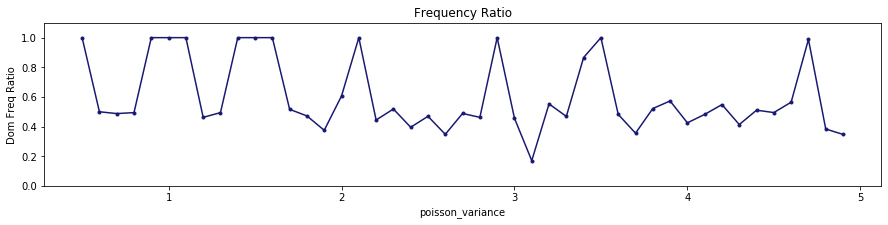

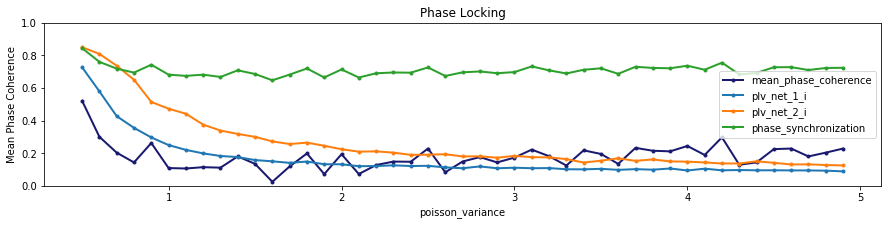

In [51]:
import pprint

plots.plot_exploration(ex, vmin_ratio=None, vmin_phase=None, vmax_phase=None)
pprint.pprint(ex.default_params)

In [52]:
ex.params

{0: {'poisson_variance': 0.5},
 1: {'poisson_variance': 0.6},
 10: {'poisson_variance': 1.4999999999999998},
 11: {'poisson_variance': 1.5999999999999996},
 12: {'poisson_variance': 1.6999999999999997},
 13: {'poisson_variance': 1.7999999999999998},
 14: {'poisson_variance': 1.8999999999999997},
 15: {'poisson_variance': 1.9999999999999996},
 16: {'poisson_variance': 2.0999999999999996},
 17: {'poisson_variance': 2.1999999999999997},
 18: {'poisson_variance': 2.3},
 19: {'poisson_variance': 2.3999999999999995},
 2: {'poisson_variance': 0.7},
 20: {'poisson_variance': 2.4999999999999996},
 21: {'poisson_variance': 2.5999999999999996},
 22: {'poisson_variance': 2.6999999999999993},
 23: {'poisson_variance': 2.7999999999999994},
 24: {'poisson_variance': 2.8999999999999995},
 25: {'poisson_variance': 2.9999999999999996},
 26: {'poisson_variance': 3.0999999999999996},
 27: {'poisson_variance': 3.1999999999999993},
 28: {'poisson_variance': 3.2999999999999994},
 29: {'poisson_variance': 3.3

Global Order Parameter value of: 0.6745226732887132
Mean Phase Coherence 0.1067220961381701
Computing within synchronization for network 1 and 2
Within Synchronization of Network 1 0.2185525653353468
Within Synchronization of Network 2 0.4392009138160308


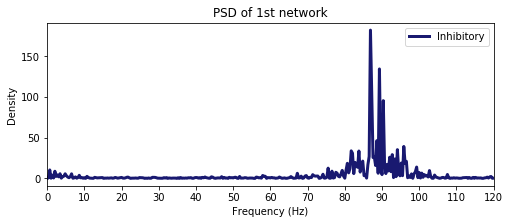

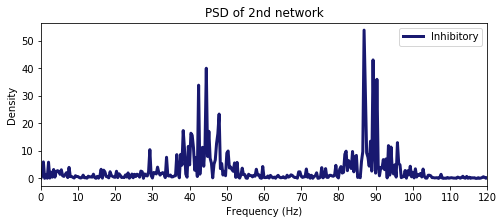

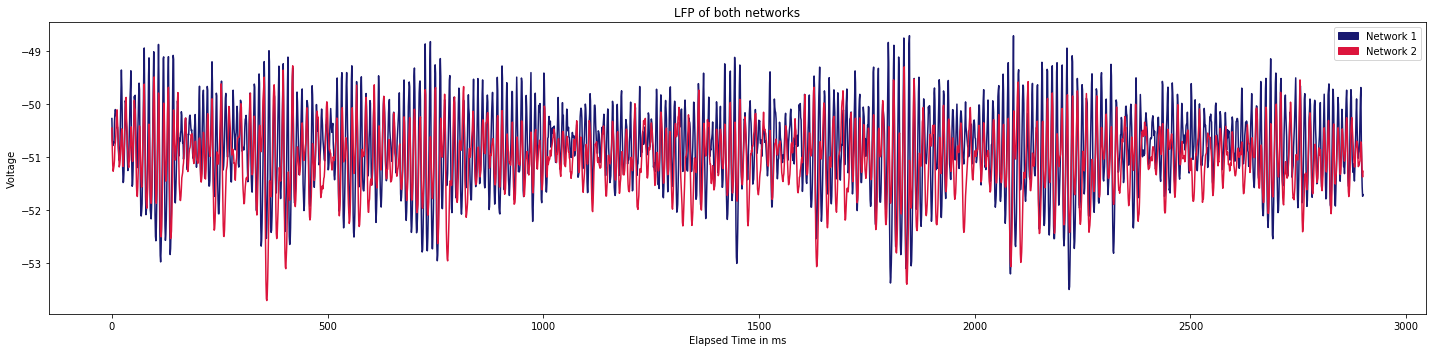

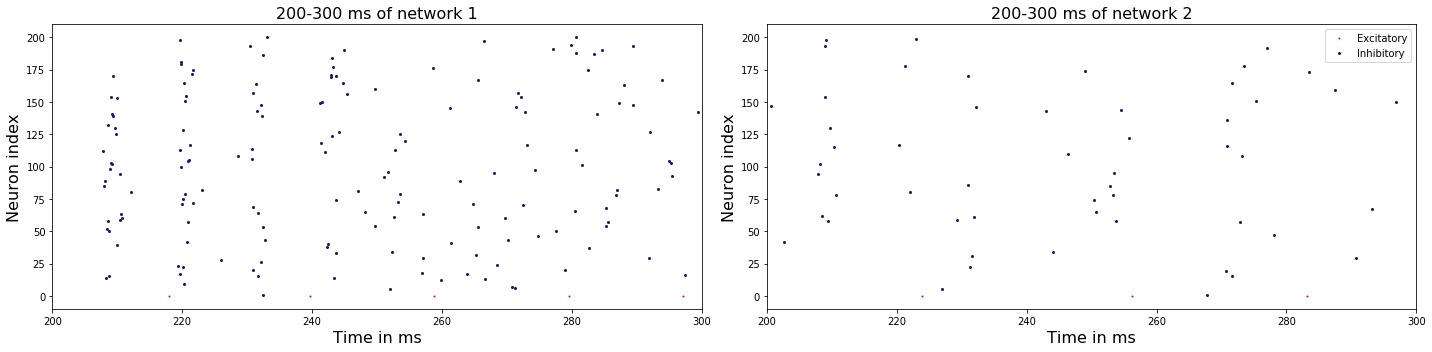

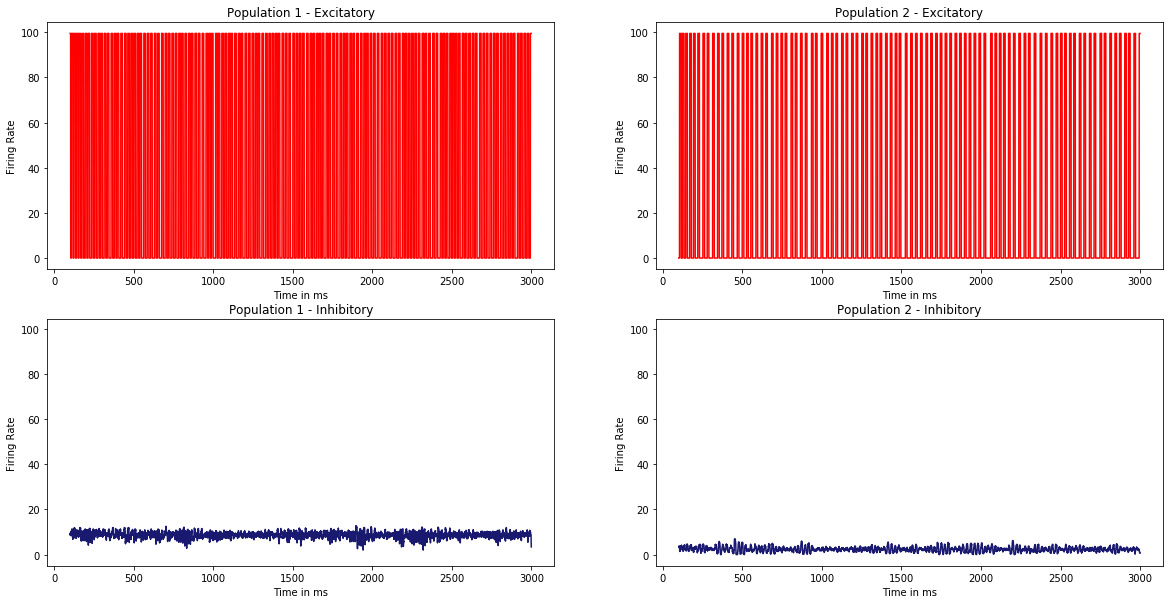

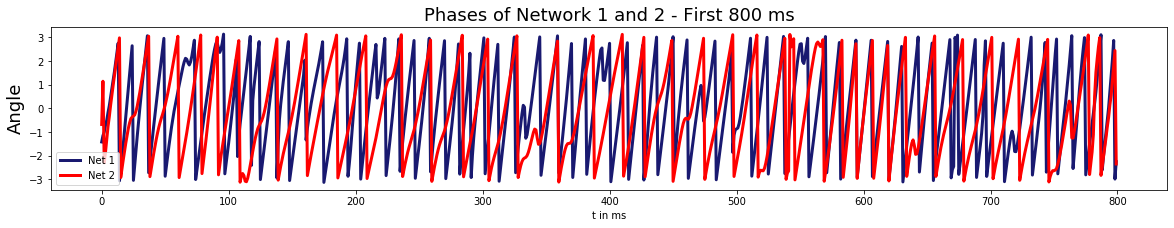

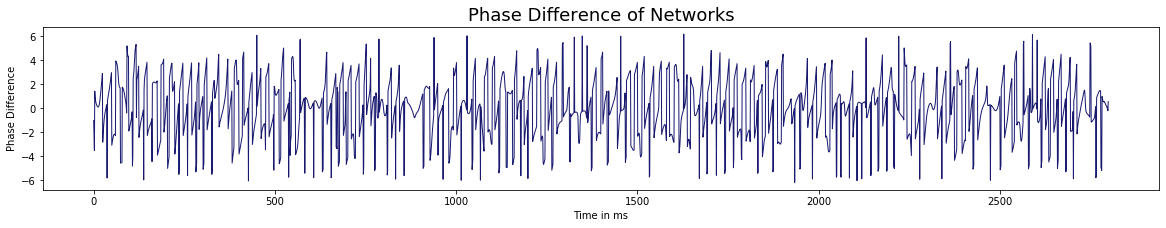

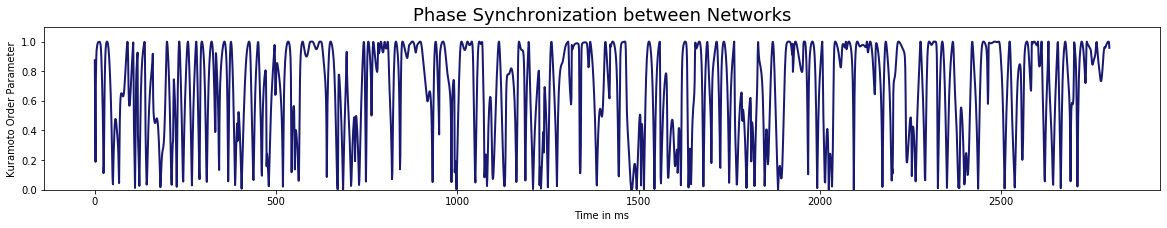

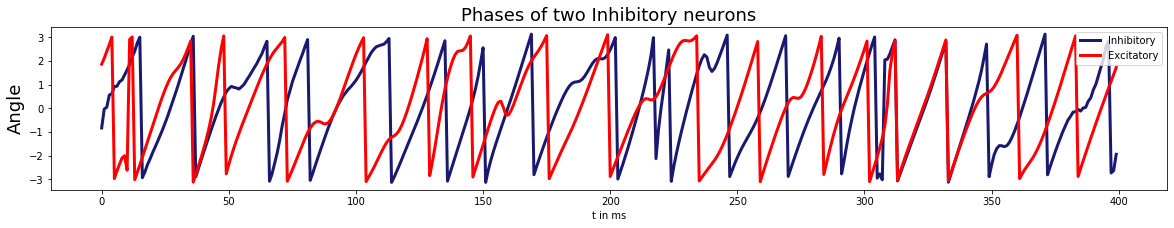

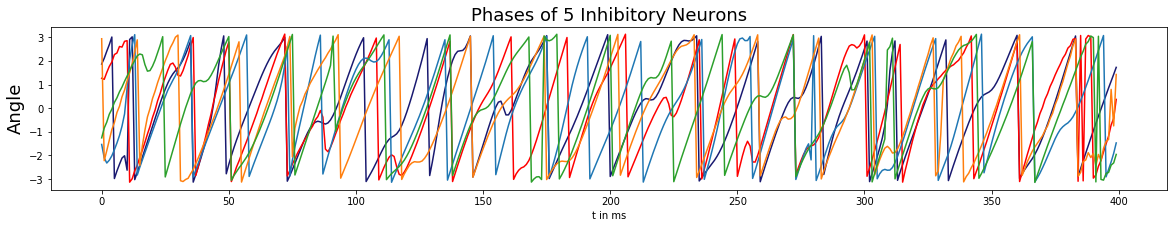

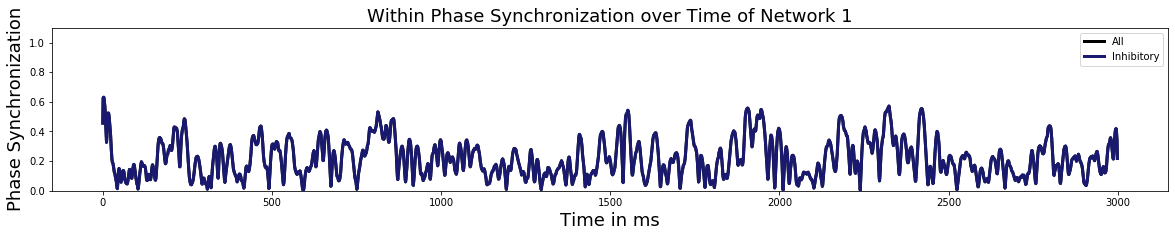

In [54]:
plots.plot_results(ex.get_run(6), psd_group="INH")

## Exploration over Noise Strength and Ratio (2d)

In [65]:
exp_params = {
    "poisson_variance": np.arange(0.5, 3.0, 0.1),
    "poisson_p": np.arange(0.7, 1.0, 0.05),
}

ov_params = dict(params)
ov_params.update({
    "runtime": 2000.0,
    "J_ppii": 0.3,
    "J_itoi": 0.8,
    "const_delay": 0.0
})

ex = mopet.Exploration(
    runner.run_in_mopet, 
    explore_params=exp_params, 
    default_params=ov_params,
    hdf_filename=constants.MODELS_PATH + "/ING_synch_noise.h5",
    exploration_name="exp_1"
)

In [66]:
ex.runplot_exploration

2020-07-17 11:58:39,346	INFO resource_spec.py:212 -- Starting Ray with 9.81 GiB memory available for workers and up to 4.91 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-07-17 11:58:39,594	WARNING services.py:923 -- Redis failed to start, retrying now.
2020-07-17 11:58:39,758	INFO services.py:1165 -- View the Ray dashboard at localhost:8265
INFO:root:Starting 175 jobs.
100%|██████████| 175/175 [00:00<00:00, 302.99it/s]
INFO:root:Runs took 0.5811898708343506 s to submit.
  0%|          | 0/175 [00:00<?, ?it/s]

(pid=8763) Initializing net ...
(pid=8763) Net 1 - poisson rate 80000.0 - single neuron 100.0 - strength 0.0025
(pid=8763) Poisson rate to I pop: 100.0
(pid=8767) Initializing net ...
(pid=8767) Net 1 - poisson rate 66666.66666666667 - single neuron 83.33333333333334 - strength 0.003
(pid=8767) Poisson rate to I pop: 83.33333333333334
(pid=8770) Initializing net ...
(pid=8770) Net 1 - poisson rate 80000.0 - single neuron 100.0 - strength 0.0025
(pid=8770) Poisson rate to I pop: 100.0
(pid=8766) Initializing net ...
(pid=8766) Net 1 - poisson rate 80000.0 - single neuron 100.0 - strength 0.0025
(pid=8766) Poisson rate to I pop: 100.0
(pid=8765) Initializing net ...
(pid=8765) Net 1 - poisson rate 80000.0 - single neuron 100.0 - strength 0.0025
(pid=8765) Poisson rate to I pop: 100.0
(pid=8771) Initializing net ...
(pid=8771) Net 1 - poisson rate 80000.0 - single neuron 100.0 - strength 0.0025
(pid=8771) Poisson rate to I pop: 100.0
(pid=8774) Initializing net ...
(pid=8774) Net 1 - pois

  1%|          | 1/175 [01:45<5:07:11, 105.93s/it]

(pid=8763) Initializing net ...
(pid=8763) Net 1 - poisson rate 57142.85714285715 - single neuron 71.42857142857144 - strength 0.0034999999999999996
(pid=8763) Poisson rate to I pop: 71.42857142857144


  1%|          | 2/175 [01:46<3:34:08, 74.27s/it] 

(pid=8766) INFO       width adjusted from 10. ms to 10.05 ms [brian2.monitors.ratemonitor.adjusted_width]
(pid=8766) 2. s (100%) simulated in 1m 9s
(pid=8766) runtime: 96.7
(pid=8763) Net 2 - rate for single neuron 50.00000000000001
(pid=8772) Initializing net ...
(pid=8772) Net 1 - poisson rate 57142.85714285715 - single neuron 71.42857142857144 - strength 0.0034999999999999996
(pid=8772) Poisson rate to I pop: 71.42857142857144
(pid=8767) Initialization time: 1.707043170928955s
(pid=8772) Net 2 - rate for single neuron 53.571428571428584
(pid=8768) 1.99755 s (99%) simulated in 1m 10s, estimated < 1s remaining.
(pid=8763) Initialization time: 1.5252768993377686s
(pid=8768) INFO       width adjusted from 10. ms to 10.05 ms [brian2.monitors.ratemonitor.adjusted_width]
(pid=8768) 2. s (100%) simulated in 1m 10s
(pid=8768) runtime: 98.0
(pid=8765) Initializing net ...
(pid=8765) Net 1 - poisson rate 57142.85714285715 - single neuron 71.42857142857144 - strength 0.0034999999999999996
(pid=

  2%|▏         | 4/175 [01:50<1:46:25, 37.34s/it]

(pid=8766) Initializing net ...
(pid=8766) Net 1 - poisson rate 50000.0 - single neuron 62.5 - strength 0.004
(pid=8766) Poisson rate to I pop: 62.5


  3%|▎         | 6/175 [01:51<52:01, 18.47s/it]  

(pid=8770) Initialization time: 1.7513010501861572s
(pid=8766) Net 2 - rate for single neuron 46.875


  5%|▌         | 9/175 [01:52<18:00,  6.51s/it]

(pid=8768) Initializing net ...
(pid=8768) Net 1 - poisson rate 50000.0 - single neuron 62.5 - strength 0.004
(pid=8768) Poisson rate to I pop: 62.5
(pid=8766) Initialization time: 1.599217176437378s


  6%|▋         | 11/175 [01:52<09:03,  3.32s/it]

(pid=8768) Net 2 - rate for single neuron 50.0


  7%|▋         | 12/175 [01:52<06:29,  2.39s/it]

(pid=8770) Starting simulation at t=0. s for a duration of 2. s
(pid=8768) Initialization time: 1.236020803451538s
(pid=8784) Initializing net ...
(pid=8784) Net 1 - poisson rate 66666.66666666667 - single neuron 83.33333333333334 - strength 0.003
(pid=8784) Poisson rate to I pop: 83.33333333333334
(pid=8784) Net 2 - rate for single neuron 79.16666666666669
(pid=8784) Initialization time: 1.5426051616668701s
(pid=8786) Initializing net ...
(pid=8786) Net 1 - poisson rate 57142.85714285715 - single neuron 71.42857142857144 - strength 0.0034999999999999996
(pid=8786) Poisson rate to I pop: 71.42857142857144
(pid=8786) Net 2 - rate for single neuron 57.14285714285716
(pid=8781) Initializing net ...
(pid=8781) Net 1 - poisson rate 57142.85714285715 - single neuron 71.42857142857144 - strength 0.0034999999999999996
(pid=8781) Poisson rate to I pop: 71.42857142857144
(pid=8778) Initializing net ...
(pid=8778) Net 1 - poisson rate 57142.85714285715 - single neuron 71.42857142857144 - strength

  8%|▊         | 14/175 [03:51<1:09:56, 26.06s/it]

(pid=8784) Initializing net ...
(pid=8784) Net 1 - poisson rate 44444.444444444445 - single neuron 55.55555555555556 - strength 0.0045
(pid=8784) Poisson rate to I pop: 55.55555555555556
(pid=8786) Initializing net ...
(pid=8786) Net 1 - poisson rate 44444.444444444445 - single neuron 55.55555555555556 - strength 0.0045
(pid=8786) Poisson rate to I pop: 55.55555555555556
(pid=8770) 0.92535 s (46%) simulated in 30s, estimated 35s remaining.


  9%|▉         | 16/175 [03:51<34:16, 12.93s/it]  

(pid=8784) Net 2 - rate for single neuron 50.00000000000001
(pid=8786) Net 2 - rate for single neuron 52.777777777777786


 10%|█         | 18/175 [03:52<16:59,  6.50s/it]

(pid=8781) Initializing net ...
(pid=8781) Net 1 - poisson rate 44444.444444444445 - single neuron 55.55555555555556 - strength 0.0045
(pid=8781) Poisson rate to I pop: 55.55555555555556
(pid=8766) 0.62555 s (31%) simulated in 20s, estimated 44s remaining.


 11%|█▏        | 20/175 [03:53<08:37,  3.34s/it]

(pid=8786) Initialization time: 1.6751611232757568s
(pid=8778) Initializing net ...
(pid=8778) Net 1 - poisson rate 40000.00000000001 - single neuron 50.00000000000001 - strength 0.004999999999999999
(pid=8778) Poisson rate to I pop: 50.00000000000001
(pid=8784) Initialization time: 1.7092480659484863s
(pid=8781) Net 2 - rate for single neuron 55.55555555555557


 13%|█▎        | 22/175 [03:53<04:34,  1.80s/it]

(pid=8778) Net 2 - rate for single neuron 35.0


 14%|█▎        | 24/175 [03:54<02:35,  1.03s/it]

(pid=8781) Initialization time: 1.6545610427856445s
(pid=8778) Initialization time: 1.6373651027679443s
(pid=8768) Starting simulation at t=0. s for a duration of 2. s
(pid=8772) 0.60235 s (30%) simulated in 20s, estimated 46s remaining.
(pid=8774) 0.6063 s (30%) simulated in 20s, estimated 46s remaining.
(pid=8763) 314.25 ms (15%) simulated in 10s, estimated 54s remaining.
(pid=8767) 0.6175 s (30%) simulated in 20s, estimated 45s remaining.
(pid=8765) 0.32195 s (16%) simulated in 10s, estimated 52s remaining.
(pid=8770) 1.2618 s (63%) simulated in 40s, estimated 23s remaining.
(pid=8784) Starting simulation at t=0. s for a duration of 2. s
(pid=8766) 0.97595 s (48%) simulated in 30s, estimated 31s remaining.
(pid=8768) 0.35945 s (17%) simulated in 10s, estimated 46s remaining.
(pid=8772) 0.9596 s (47%) simulated in 30s, estimated 33s remaining.
(pid=8774) 0.95765 s (47%) simulated in 30s, estimated 33s remaining.
(pid=8763) 0.66565 s (33%) simulated in 20s, estimated 40s remaining.
(p

 14%|█▍        | 25/175 [04:26<25:54, 10.37s/it]

(pid=8770) Initializing net ...
(pid=8770) Net 1 - poisson rate 40000.00000000001 - single neuron 50.00000000000001 - strength 0.004999999999999999
(pid=8770) Poisson rate to I pop: 50.00000000000001
(pid=8770) Net 2 - rate for single neuron 37.50000000000001
(pid=8772) 1.634 s (81%) simulated in 50s, estimated 11s remaining.
(pid=8770) Initialization time: 1.437873125076294s
(pid=8774) 1.63445 s (81%) simulated in 50s, estimated 11s remaining.
(pid=8763) 1.35145 s (67%) simulated in 40s, estimated 19s remaining.
(pid=8767) 1.6488 s (82%) simulated in 50s, estimated 11s remaining.
(pid=8765) 1.3514 s (67%) simulated in 40s, estimated 19s remaining.
(pid=8781) 0.6877 s (34%) simulated in 20s, estimated 38s remaining.
(pid=8786) 0.6814 s (34%) simulated in 20s, estimated 39s remaining.
(pid=8784) 1.0095 s (50%) simulated in 30s, estimated 29s remaining.
(pid=8766) 1.99815 s (99%) simulated in 1m 0s, estimated < 1s remaining.
(pid=8766) 2. s (100%) simulated in 1m 0s
(pid=8766) runtime: 7

 15%|█▍        | 26/175 [04:36<25:30, 10.27s/it]

(pid=8766) Initializing net ...
(pid=8766) Net 1 - poisson rate 40000.00000000001 - single neuron 50.00000000000001 - strength 0.004999999999999999
(pid=8766) Poisson rate to I pop: 50.00000000000001
(pid=8766) Net 2 - rate for single neuron 40.00000000000001
(pid=8772) 1.9663 s (98%) simulated in 1m 0s, estimated 1s remaining.
(pid=8766) Initialization time: 1.425786018371582s
(pid=8772) 2. s (100%) simulated in 1m 0s
(pid=8772) runtime: 71.6
(pid=8774) 1.9687 s (98%) simulated in 1m 0s, estimated 1s remaining.
(pid=8763) 1.68655 s (84%) simulated in 50s, estimated 9s remaining.
(pid=8767) 1.98595 s (99%) simulated in 1m 0s, estimated < 1s remaining.
(pid=8765) 1.68565 s (84%) simulated in 50s, estimated 9s remaining.
(pid=8774) 2. s (100%) simulated in 1m 0s
(pid=8774) runtime: 71.5
(pid=8767) 2. s (100%) simulated in 1m 0s
(pid=8767) runtime: 71.5
(pid=8781) 1.02785 s (51%) simulated in 30s, estimated 28s remaining.
(pid=8786) 1.02275 s (51%) simulated in 30s, estimated 29s remainin

 15%|█▌        | 27/175 [04:42<22:11,  9.00s/it]

(pid=8784) 1.3468 s (67%) simulated in 40s, estimated 19s remaining.
(pid=8772) Initializing net ...
(pid=8772) Net 1 - poisson rate 40000.00000000001 - single neuron 50.00000000000001 - strength 0.004999999999999999
(pid=8772) Poisson rate to I pop: 50.00000000000001
(pid=8778) 1.0355 s (51%) simulated in 30s, estimated 28s remaining.
(pid=8772) Net 2 - rate for single neuron 42.50000000000001


 17%|█▋        | 29/175 [04:44<11:27,  4.71s/it]

(pid=8767) Initializing net ...
(pid=8767) Net 1 - poisson rate 40000.00000000001 - single neuron 50.00000000000001 - strength 0.004999999999999999
(pid=8767) Poisson rate to I pop: 50.00000000000001
(pid=8774) Initializing net ...
(pid=8774) Net 1 - poisson rate 40000.00000000001 - single neuron 50.00000000000001 - strength 0.004999999999999999
(pid=8774) Poisson rate to I pop: 50.00000000000001
(pid=8772) Initialization time: 1.4006400108337402s
(pid=8767) Net 2 - rate for single neuron 45.000000000000014
(pid=8774) Net 2 - rate for single neuron 47.500000000000014
(pid=8767) Initialization time: 1.3763923645019531s
(pid=8774) Initialization time: 1.360076904296875s
(pid=8768) 1.70365 s (85%) simulated in 50s, estimated 9s remaining.
(pid=8770) Starting simulation at t=0. s for a duration of 2. s
(pid=8763) 2. s (100%) simulated in 59s
(pid=8763) runtime: 79.1
(pid=8766) Starting simulation at t=0. s for a duration of 2. s
(pid=8765) 2. s (100%) simulated in 59s
(pid=8765) runtime: 8

 18%|█▊        | 31/175 [04:52<10:02,  4.19s/it]

(pid=8763) Net 2 - rate for single neuron 50.00000000000002
(pid=8765) Initializing net ...
(pid=8765) Net 1 - poisson rate 36363.63636363637 - single neuron 45.45454545454546 - strength 0.0055
(pid=8765) Poisson rate to I pop: 45.45454545454546
(pid=8784) 1.68615 s (84%) simulated in 50s, estimated 9s remaining.
(pid=8765) Net 2 - rate for single neuron 31.81818181818182
(pid=8778) 1.3765 s (68%) simulated in 40s, estimated 18s remaining.
(pid=8763) Initialization time: 1.4979758262634277s
(pid=8765) Initialization time: 1.4247171878814697s
(pid=8772) Starting simulation at t=0. s for a duration of 2. s
(pid=8768) 2. s (100%) simulated in 58s
(pid=8768) runtime: 79.3
(pid=8767) Starting simulation at t=0. s for a duration of 2. s
(pid=8774) Starting simulation at t=0. s for a duration of 2. s
(pid=8770) 0.34225 s (17%) simulated in 10s, estimated 48s remaining.


 18%|█▊        | 32/175 [04:58<10:50,  4.55s/it]

(pid=8768) Initializing net ...
(pid=8768) Net 1 - poisson rate 36363.63636363637 - single neuron 45.45454545454546 - strength 0.0055
(pid=8768) Poisson rate to I pop: 45.45454545454546
(pid=8766) 0.34635 s (17%) simulated in 10s, estimated 48s remaining.
(pid=8768) Net 2 - rate for single neuron 34.09090909090909
(pid=8768) Initialization time: 1.3810811042785645s
(pid=8781) 1.7176 s (85%) simulated in 50s, estimated 8s remaining.
(pid=8784) 2. s (100%) simulated in 59s
(pid=8784) runtime: 68.6
(pid=8786) 1.7098 s (85%) simulated in 50s, estimated 8s remaining.
(pid=8778) 1.73185 s (86%) simulated in 50s, estimated 8s remaining.
(pid=8763) Starting simulation at t=0. s for a duration of 2. s
(pid=8772) 0.3499 s (17%) simulated in 10s, estimated 47s remaining.


 19%|█▉        | 33/175 [05:05<12:36,  5.32s/it]

(pid=8767) 0.3462 s (17%) simulated in 10s, estimated 48s remaining.
(pid=8784) Initializing net ...
(pid=8784) Net 1 - poisson rate 36363.63636363637 - single neuron 45.45454545454546 - strength 0.0055
(pid=8784) Poisson rate to I pop: 45.45454545454546
(pid=8774) 0.351 s (17%) simulated in 10s, estimated 47s remaining.
(pid=8784) Net 2 - rate for single neuron 36.36363636363637
(pid=8784) Initialization time: 1.3523709774017334s
(pid=8770) 0.69205 s (34%) simulated in 20s, estimated 38s remaining.
(pid=8766) 0.70395 s (35%) simulated in 20s, estimated 37s remaining.
(pid=8781) 2. s (100%) simulated in 58s
(pid=8781) runtime: 75.2
(pid=8786) 2. s (100%) simulated in 58s
(pid=8786) runtime: 77.4
(pid=8778) 2. s (100%) simulated in 58s
(pid=8778) runtime: 76.5
(pid=8765) Starting simulation at t=0. s for a duration of 2. s
(pid=8763) 0.3212 s (16%) simulated in 10s, estimated 52s remaining.
(pid=8781) Initializing net ...
(pid=8781) Net 1 - poisson rate 36363.63636363637 - single neuron

 19%|█▉        | 34/175 [05:15<15:36,  6.64s/it]

(pid=8781) Net 2 - rate for single neuron 38.63636363636365
(pid=8786) Initializing net ...
(pid=8786) Net 1 - poisson rate 36363.63636363637 - single neuron 45.45454545454546 - strength 0.0055
(pid=8786) Poisson rate to I pop: 45.45454545454546


 20%|██        | 35/175 [05:15<11:06,  4.76s/it]

(pid=8767) 0.6445 s (32%) simulated in 20s, estimated 42s remaining.


 21%|██        | 36/175 [05:15<07:59,  3.45s/it]

(pid=8774) 0.64485 s (32%) simulated in 20s, estimated 42s remaining.
(pid=8786) Net 2 - rate for single neuron 40.90909090909092
(pid=8778) Initializing net ...
(pid=8778) Net 1 - poisson rate 36363.63636363637 - single neuron 45.45454545454546 - strength 0.0055
(pid=8778) Poisson rate to I pop: 45.45454545454546
(pid=8781) Initialization time: 1.9428629875183105s
(pid=8778) Net 2 - rate for single neuron 43.181818181818194
(pid=8786) Initialization time: 1.7075181007385254s
(pid=8770) 0.984 s (49%) simulated in 30s, estimated 31s remaining.
(pid=8778) Initialization time: 1.4382472038269043s
(pid=8766) 0.99825 s (49%) simulated in 30s, estimated 30s remaining.
(pid=8768) Starting simulation at t=0. s for a duration of 2. s
(pid=8765) 304.1 ms (15%) simulated in 10s, estimated 56s remaining.
(pid=8763) 0.63245 s (31%) simulated in 20s, estimated 43s remaining.
(pid=8772) 0.97925 s (48%) simulated in 30s, estimated 31s remaining.
(pid=8767) 0.969 s (48%) simulated in 30s, estimated 32s

 21%|██        | 37/175 [05:56<33:37, 14.62s/it]

(pid=8770) Initializing net ...
(pid=8770) Net 1 - poisson rate 36363.63636363637 - single neuron 45.45454545454546 - strength 0.0055
(pid=8770) Poisson rate to I pop: 45.45454545454546


 22%|██▏       | 38/175 [05:57<24:00, 10.51s/it]

(pid=8770) Net 2 - rate for single neuron 45.45454545454547
(pid=8781) 0.8309 s (41%) simulated in 30s, estimated 42s remaining.
(pid=8766) Initializing net ...
(pid=8766) Net 1 - poisson rate 33333.33333333334 - single neuron 41.66666666666668 - strength 0.005999999999999998
(pid=8766) Poisson rate to I pop: 41.66666666666668
(pid=8786) 0.8133 s (40%) simulated in 30s, estimated 44s remaining.
(pid=8784) 0.808 s (40%) simulated in 30s, estimated 44s remaining.
(pid=8766) Net 2 - rate for single neuron 29.16666666666667
(pid=8778) 0.8114 s (40%) simulated in 30s, estimated 44s remaining.
(pid=8770) Initialization time: 2.0294458866119385s
(pid=8766) Initialization time: 2.0696520805358887s
(pid=8768) 1.12275 s (56%) simulated in 40s, estimated 31s remaining.
(pid=8772) 2. s (100%) simulated in 1m 6s
(pid=8772) runtime: 77.0
(pid=8765) 1.3981 s (69%) simulated in 50s, estimated 22s remaining.
(pid=8767) 2. s (100%) simulated in 1m 7s
(pid=8767) runtime: 78.0
(pid=8763) 1.73525 s (86%) s

 22%|██▏       | 39/175 [06:06<22:35,  9.97s/it]

(pid=8772) Initializing net ...
(pid=8772) Net 1 - poisson rate 33333.33333333334 - single neuron 41.66666666666668 - strength 0.005999999999999998
(pid=8772) Poisson rate to I pop: 41.66666666666668
(pid=8772) Net 2 - rate for single neuron 31.250000000000007
(pid=8781) 1.07755 s (53%) simulated in 40s, estimated 34s remaining.


 23%|██▎       | 40/175 [06:08<16:58,  7.54s/it]

(pid=8786) 1.05735 s (52%) simulated in 40s, estimated 36s remaining.


 23%|██▎       | 41/175 [06:08<12:03,  5.40s/it]

(pid=8767) Initializing net ...
(pid=8767) Net 1 - poisson rate 33333.33333333334 - single neuron 41.66666666666668 - strength 0.005999999999999998
(pid=8767) Poisson rate to I pop: 41.66666666666668
(pid=8772) Initialization time: 1.8887498378753662s
(pid=8784) 1.04925 s (52%) simulated in 40s, estimated 36s remaining.
(pid=8774) Initializing net ...
(pid=8774) Net 1 - poisson rate 33333.33333333334 - single neuron 41.66666666666668 - strength 0.005999999999999998
(pid=8774) Poisson rate to I pop: 41.66666666666668
(pid=8778) 1.0588 s (52%) simulated in 40s, estimated 36s remaining.
(pid=8767) Net 2 - rate for single neuron 33.33333333333334
(pid=8774) Net 2 - rate for single neuron 35.41666666666668
(pid=8767) Initialization time: 1.9171621799468994s
(pid=8768) 1.3665 s (68%) simulated in 50s, estimated 23s remaining.
(pid=8774) Initialization time: 1.861633062362671s
(pid=8765) 1.66245 s (83%) simulated in 1m 0s, estimated 12s remaining.
(pid=8763) 2. s (100%) simulated in 1m 9s
(pi

 24%|██▍       | 42/175 [06:18<14:43,  6.64s/it]

(pid=8786) 1.33575 s (66%) simulated in 50s, estimated 25s remaining.
(pid=8763) Initializing net ...
(pid=8763) Net 1 - poisson rate 33333.33333333334 - single neuron 41.66666666666668 - strength 0.005999999999999998
(pid=8763) Poisson rate to I pop: 41.66666666666668
(pid=8784) 1.325 s (66%) simulated in 50s, estimated 25s remaining.
(pid=8778) 1.344 s (67%) simulated in 50s, estimated 24s remaining.
(pid=8763) Net 2 - rate for single neuron 37.500000000000014
(pid=8763) Initialization time: 1.6134850978851318s
(pid=8768) 1.6444 s (82%) simulated in 1m 0s, estimated 13s remaining.
(pid=8770) Starting simulation at t=0. s for a duration of 2. s
(pid=8765) 1.93035 s (96%) simulated in 1m 10s, estimated 3s remaining.
(pid=8767) Starting simulation at t=0. s for a duration of 2. s
(pid=8772) Starting simulation at t=0. s for a duration of 2. s
(pid=8766) Starting simulation at t=0. s for a duration of 2. s
(pid=8774) Starting simulation at t=0. s for a duration of 2. s
(pid=8765) 2. s (1

 25%|██▍       | 43/175 [06:30<18:47,  8.54s/it]

(pid=8765) Initializing net ...
(pid=8765) Net 1 - poisson rate 33333.33333333334 - single neuron 41.66666666666668 - strength 0.005999999999999998
(pid=8765) Poisson rate to I pop: 41.66666666666668
(pid=8765) Net 2 - rate for single neuron 39.58333333333335
(pid=8765) Initialization time: 1.621077060699463s
(pid=8763) Starting simulation at t=0. s for a duration of 2. s
(pid=8770) 257.5 ms (12%) simulated in 10s, estimated 1m 8s remaining.
(pid=8767) 265.4 ms (13%) simulated in 10s, estimated 1m 5s remaining.
(pid=8768) 2. s (100%) simulated in 1m 13s
(pid=8768) runtime: 94.1
(pid=8772) 266.25 ms (13%) simulated in 10s, estimated 1m 5s remaining.
(pid=8766) 270.6 ms (13%) simulated in 10s, estimated 1m 4s remaining.
(pid=8774) 265.9 ms (13%) simulated in 10s, estimated 1m 5s remaining.
(pid=8781) 1.8813 s (94%) simulated in 1m 10s, estimated 4s remaining.
(pid=8786) 1.8546 s (92%) simulated in 1m 10s, estimated 5s remaining.
(pid=8784) 1.83855 s (91%) simulated in 1m 10s, estimated 6

 25%|██▌       | 44/175 [06:38<18:17,  8.38s/it]

(pid=8768) Initializing net ...
(pid=8768) Net 1 - poisson rate 33333.33333333334 - single neuron 41.66666666666668 - strength 0.005999999999999998
(pid=8768) Poisson rate to I pop: 41.66666666666668
(pid=8768) Net 2 - rate for single neuron 41.666666666666686
(pid=8768) Initialization time: 2.0704331398010254s
(pid=8781) 2. s (100%) simulated in 1m 14s
(pid=8781) runtime: 86.4
(pid=8763) 250.15 ms (12%) simulated in 10s, estimated 1m 10s remaining.
(pid=8770) 0.5044 s (25%) simulated in 20s, estimated 59s remaining.
(pid=8767) 0.5133 s (25%) simulated in 20s, estimated 58s remaining.
(pid=8786) 2. s (100%) simulated in 1m 15s
(pid=8786) runtime: 86.8
(pid=8778) 2. s (100%) simulated in 1m 15s
(pid=8778) runtime: 86.2
(pid=8772) 0.5181 s (25%) simulated in 20s, estimated 57s remaining.
(pid=8784) 2. s (100%) simulated in 1m 16s
(pid=8784) runtime: 97.7
(pid=8766) 0.52385 s (26%) simulated in 20s, estimated 56s remaining.
(pid=8774) 0.5183 s (25%) simulated in 20s, estimated 57s remaini

 26%|██▌       | 45/175 [06:48<19:06,  8.82s/it]

(pid=8778) Net 2 - rate for single neuron 30.769230769230774


 26%|██▋       | 46/175 [06:49<13:27,  6.26s/it]

(pid=8784) Initializing net ...
(pid=8784) Net 1 - poisson rate 30769.230769230773 - single neuron 38.46153846153847 - strength 0.006499999999999999
(pid=8784) Poisson rate to I pop: 38.46153846153847


 27%|██▋       | 48/175 [06:49<06:49,  3.22s/it]

(pid=8778) Initialization time: 1.6887431144714355s
(pid=8784) Net 2 - rate for single neuron 32.6923076923077
(pid=8786) Initialization time: 1.7540838718414307s
(pid=8784) Initialization time: 1.6179478168487549s
(pid=8763) 0.5667 s (28%) simulated in 20s, estimated 51s remaining.
(pid=8770) 0.82145 s (41%) simulated in 30s, estimated 43s remaining.
(pid=8767) 0.83365 s (41%) simulated in 30s, estimated 42s remaining.
(pid=8772) 0.83855 s (41%) simulated in 30s, estimated 42s remaining.
(pid=8766) 0.85305 s (42%) simulated in 30s, estimated 40s remaining.
(pid=8774) 0.8477 s (42%) simulated in 30s, estimated 41s remaining.
(pid=8765) 0.3261 s (16%) simulated in 10s, estimated 51s remaining.
(pid=8763) 0.88745 s (44%) simulated in 30s, estimated 38s remaining.
(pid=8770) 1.1383 s (56%) simulated in 40s, estimated 30s remaining.
(pid=8767) 1.14535 s (57%) simulated in 40s, estimated 30s remaining.
(pid=8772) 1.13795 s (56%) simulated in 40s, estimated 30s remaining.
(pid=8766) 1.1535 s

 28%|██▊       | 49/175 [07:28<29:09, 13.88s/it]

(pid=8770) Initializing net ...
(pid=8770) Net 1 - poisson rate 30769.230769230773 - single neuron 38.46153846153847 - strength 0.006499999999999999
(pid=8770) Poisson rate to I pop: 38.46153846153847


 29%|██▊       | 50/175 [07:29<20:35,  9.88s/it]

(pid=8767) Initializing net ...
(pid=8767) Net 1 - poisson rate 30769.230769230773 - single neuron 38.46153846153847 - strength 0.006499999999999999
(pid=8767) Poisson rate to I pop: 38.46153846153847
(pid=8766) Initializing net ...
(pid=8766) Net 1 - poisson rate 30769.230769230773 - single neuron 38.46153846153847 - strength 0.006499999999999999
(pid=8766) Poisson rate to I pop: 38.46153846153847
(pid=8772) Initializing net ...
(pid=8772) Net 1 - poisson rate 28571.428571428576 - single neuron 35.71428571428572 - strength 0.006999999999999999
(pid=8772) Poisson rate to I pop: 35.71428571428572


 29%|██▉       | 51/175 [07:29<14:28,  7.00s/it]

(pid=8770) Net 2 - rate for single neuron 34.61538461538463


 30%|██▉       | 52/175 [07:29<10:14,  4.99s/it]

(pid=8767) Net 2 - rate for single neuron 36.53846153846155
(pid=8766) Net 2 - rate for single neuron 38.461538461538474
(pid=8772) Net 2 - rate for single neuron 25.000000000000004


 30%|███       | 53/175 [07:30<07:21,  3.62s/it]

(pid=8774) Initializing net ...
(pid=8774) Net 1 - poisson rate 28571.428571428576 - single neuron 35.71428571428572 - strength 0.006999999999999999
(pid=8774) Poisson rate to I pop: 35.71428571428572
(pid=8770) Initialization time: 1.755687952041626s
(pid=8767) Initialization time: 1.8261072635650635s
(pid=8772) Initialization time: 1.6968441009521484s
(pid=8766) Initialization time: 1.8318171501159668s
(pid=8774) Net 2 - rate for single neuron 26.785714285714292
(pid=8774) Initialization time: 1.6788280010223389s
(pid=8763) 2. s (100%) simulated in 59s
(pid=8763) runtime: 72.4
(pid=8784) Starting simulation at t=0. s for a duration of 2. s


 31%|███       | 54/175 [07:34<08:00,  3.97s/it]

(pid=8763) Initializing net ...
(pid=8763) Net 1 - poisson rate 28571.428571428576 - single neuron 35.71428571428572 - strength 0.006999999999999999
(pid=8763) Poisson rate to I pop: 35.71428571428572
(pid=8763) Net 2 - rate for single neuron 28.57142857142858
(pid=8763) Initialization time: 0.7301788330078125s
(pid=8765) 1.82845 s (91%) simulated in 50s, estimated 5s remaining.
(pid=8768) 1.2399 s (61%) simulated in 30s, estimated 18s remaining.
(pid=8778) Starting simulation at t=0. s for a duration of 2. s
(pid=8765) 2. s (100%) simulated in 52s
(pid=8765) runtime: 65.3


 31%|███▏      | 55/175 [07:40<08:44,  4.37s/it]

(pid=8765) Initializing net ...
(pid=8765) Net 1 - poisson rate 28571.428571428576 - single neuron 35.71428571428572 - strength 0.006999999999999999
(pid=8765) Poisson rate to I pop: 35.71428571428572
(pid=8765) Net 2 - rate for single neuron 30.35714285714287
(pid=8765) Initialization time: 0.6995000839233398s
(pid=8784) 0.68775 s (34%) simulated in 10s, estimated 19s remaining.
(pid=8786) Starting simulation at t=0. s for a duration of 2. s
(pid=8768) 1.9502 s (97%) simulated in 40s, estimated 1s remaining.
(pid=8768) 2. s (100%) simulated in 40s
(pid=8768) runtime: 66.1
(pid=8778) 0.71365 s (35%) simulated in 10s, estimated 18s remaining.
(pid=8781) Starting simulation at t=0. s for a duration of 2. s


 32%|███▏      | 56/175 [07:49<11:36,  5.85s/it]

(pid=8768) Initializing net ...
(pid=8768) Net 1 - poisson rate 28571.428571428576 - single neuron 35.71428571428572 - strength 0.006999999999999999
(pid=8768) Poisson rate to I pop: 35.71428571428572
(pid=8768) Net 2 - rate for single neuron 32.14285714285715
(pid=8768) Initialization time: 0.6956369876861572s
(pid=8784) 1.40545 s (70%) simulated in 20s, estimated 8s remaining.
(pid=8786) 0.7176 s (35%) simulated in 10s, estimated 18s remaining.
(pid=8778) 1.44045 s (72%) simulated in 20s, estimated 8s remaining.
(pid=8781) 0.72795 s (36%) simulated in 10s, estimated 17s remaining.
(pid=8784) 2. s (100%) simulated in 28s
(pid=8784) runtime: 70.5
(pid=8786) 1.423 s (71%) simulated in 20s, estimated 8s remaining.
(pid=8784) Initializing net ...
(pid=8784) Net 1 - poisson rate 28571.428571428576 - single neuron 35.71428571428572 - strength 0.006999999999999999
(pid=8784) Poisson rate to I pop: 35.71428571428572
(pid=8784) Net 2 - rate for single neuron 33.928571428571445
(pid=8784) Initi

 33%|███▎      | 58/175 [08:28<21:46, 11.17s/it]

(pid=8781) Initializing net ...
(pid=8781) Net 1 - poisson rate 26666.66666666667 - single neuron 33.33333333333334 - strength 0.007499999999999999
(pid=8781) Poisson rate to I pop: 33.33333333333334


 34%|███▍      | 60/175 [08:29<10:56,  5.71s/it]

(pid=8767) 311.05 ms (15%) simulated in 10s, estimated 54s remaining.
(pid=8781) Net 2 - rate for single neuron 25.000000000000007
(pid=8770) 307.75 ms (15%) simulated in 10s, estimated 55s remaining.
(pid=8766) 302.5 ms (15%) simulated in 10s, estimated 56s remaining.
(pid=8781) Initialization time: 2.0760810375213623s
(pid=8765) 0.33665 s (16%) simulated in 10s, estimated 49s remaining.
(pid=8763) 0.35185 s (17%) simulated in 10s, estimated 47s remaining.
(pid=8774) 0.3636 s (18%) simulated in 10s, estimated 45s remaining.
(pid=8772) 0.3694 s (18%) simulated in 10s, estimated 44s remaining.
(pid=8768) 0.366 s (18%) simulated in 10s, estimated 45s remaining.
(pid=8784) Starting simulation at t=0. s for a duration of 2. s
(pid=8767) 0.6982 s (34%) simulated in 20s, estimated 37s remaining.
(pid=8770) 0.71715 s (35%) simulated in 20s, estimated 36s remaining.
(pid=8766) 0.709 s (35%) simulated in 20s, estimated 36s remaining.
(pid=8765) 0.747 s (37%) simulated in 20s, estimated 34s rema

 36%|███▌      | 63/175 [09:36<22:04, 11.82s/it]

(pid=8784) 0.7436 s (37%) simulated in 20s, estimated 34s remaining.
(pid=8786) Starting simulation at t=0. s for a duration of 2. s
(pid=8786) 0.3542 s (17%) simulated in 10s, estimated 46s remaining.
(pid=8786) 0.6637 s (33%) simulated in 20s, estimated 40s remaining.
(pid=8786) 1.25375 s (62%) simulated in 30s, estimated 18s remaining.
(pid=8763) 1.4515 s (72%) simulated in 40s, estimated 15s remaining.
(pid=8763) 1.80475 s (90%) simulated in 50s, estimated 5s remaining.
(pid=8763) 2. s (100%) simulated in 56s
(pid=8763) runtime: 104.2
(pid=8767) 1.3944 s (69%) simulated in 40s, estimated 17s remaining.
(pid=8767) 1.7444 s (87%) simulated in 50s, estimated 7s remaining.
(pid=8767) 2. s (100%) simulated in 57s
(pid=8767) runtime: 106.4
(pid=8767) Initializing net ...
(pid=8767) Net 1 - poisson rate 26666.66666666667 - single neuron 33.33333333333334 - strength 0.007499999999999999
(pid=8767) Poisson rate to I pop: 33.33333333333334
(pid=8770) 1.4155 s (70%) simulated in 40s, estimate

 37%|███▋      | 64/175 [09:38<16:21,  8.84s/it]

(pid=8763) Net 2 - rate for single neuron 21.875
(pid=8765) Initializing net ...
(pid=8765) Net 1 - poisson rate 25000.000000000004 - single neuron 31.250000000000004 - strength 0.007999999999999998
(pid=8765) Poisson rate to I pop: 31.250000000000004
(pid=8772) Initializing net ...
(pid=8772) Net 1 - poisson rate 25000.000000000004 - single neuron 31.250000000000004 - strength 0.007999999999999998
(pid=8772) Poisson rate to I pop: 31.250000000000004


 37%|███▋      | 65/175 [09:38<11:31,  6.28s/it]

(pid=8765) Net 2 - rate for single neuron 23.437500000000004
(pid=8774) Initializing net ...
(pid=8774) Net 1 - poisson rate 25000.000000000004 - single neuron 31.250000000000004 - strength 0.007999999999999998
(pid=8774) Poisson rate to I pop: 31.250000000000004
(pid=8772) Net 2 - rate for single neuron 25.000000000000004

 38%|███▊      | 66/175 [09:38<08:11,  4.51s/it]


(pid=8763) Initialization time: 1.1465249061584473s


 38%|███▊      | 67/175 [09:39<05:47,  3.22s/it]

(pid=8774) Net 2 - rate for single neuron 26.562500000000007
(pid=8768) Initializing net ...
(pid=8768) Net 1 - poisson rate 25000.000000000004 - single neuron 31.250000000000004 - strength 0.007999999999999998
(pid=8768) Poisson rate to I pop: 31.250000000000004


 39%|███▉      | 68/175 [09:39<04:07,  2.31s/it]

(pid=8765) Initialization time: 1.140721321105957s
(pid=8772) Initialization time: 1.1156749725341797s


 39%|███▉      | 69/175 [09:39<02:57,  1.68s/it]

(pid=8768) Net 2 - rate for single neuron 28.125000000000007


 40%|████      | 70/175 [09:39<02:09,  1.24s/it]

(pid=8774) Initialization time: 1.1283247470855713s
(pid=8768) Initialization time: 1.0625169277191162s
(pid=8786) 1.8492 s (92%) simulated in 40s, estimated 3s remaining.
(pid=8781) 1.8527 s (92%) simulated in 40s, estimated 3s remaining.
(pid=8786) 2. s (100%) simulated in 42s
(pid=8786) runtime: 76.5
(pid=8781) 2. s (100%) simulated in 42s
(pid=8781) runtime: 72.1


 41%|████      | 72/175 [09:44<02:53,  1.68s/it]

(pid=8786) Initializing net ...
(pid=8786) Net 1 - poisson rate 25000.000000000004 - single neuron 31.250000000000004 - strength 0.007999999999999998
(pid=8786) Poisson rate to I pop: 31.250000000000004
(pid=8781) Initializing net ...
(pid=8781) Net 1 - poisson rate 25000.000000000004 - single neuron 31.250000000000004 - strength 0.007999999999999998
(pid=8781) Poisson rate to I pop: 31.250000000000004
(pid=8786) Net 2 - rate for single neuron 29.68750000000001
(pid=8781) Net 2 - rate for single neuron 31.25000000000001
(pid=8786) Initialization time: 0.6024718284606934s
(pid=8781) Initialization time: 0.5997598171234131s
(pid=8784) Starting simulation at t=0. s for a duration of 2. s
(pid=8786) Starting simulation at t=0. s for a duration of 2. s
(pid=8786) 0.43355 s (21%) simulated in 10s, estimated 36s remaining.
(pid=8786) 0.87835 s (43%) simulated in 20s, estimated 26s remaining.
(pid=8786) 1.17665 s (58%) simulated in 30s, estimated 21s remaining.
(pid=8763) Starting simulation a

 42%|████▏     | 73/175 [11:06<43:51, 25.79s/it]

(pid=8784) Initializing net ...
(pid=8784) Net 1 - poisson rate 23529.411764705885 - single neuron 29.411764705882355 - strength 0.008499999999999999
(pid=8784) Poisson rate to I pop: 29.411764705882355
(pid=8778) Initializing net ...
(pid=8778) Net 1 - poisson rate 23529.411764705885 - single neuron 29.411764705882355 - strength 0.008499999999999999
(pid=8778) Poisson rate to I pop: 29.411764705882355
(pid=8784) Net 2 - rate for single neuron 20.58823529411765
(pid=8786) 2. s (100%) simulated in 57s
(pid=8786) runtime: 82.4
(pid=8778) Net 2 - rate for single neuron 22.058823529411768
(pid=8781) 2. s (100%) simulated in 58s
(pid=8781) runtime: 82.7
(pid=8766) Initializing net ...
(pid=8766) Net 1 - poisson rate 23529.411764705885 - single neuron 29.411764705882355 - strength 0.008499999999999999
(pid=8766) Poisson rate to I pop: 29.411764705882355
(pid=8784) Initialization time: 1.3957338333129883s


 42%|████▏     | 74/175 [11:08<31:20, 18.62s/it]

(pid=8778) Initialization time: 1.4201040267944336s
(pid=8772) Initializing net ...
(pid=8772) Net 1 - poisson rate 23529.411764705885 - single neuron 29.411764705882355 - strength 0.008499999999999999
(pid=8772) Poisson rate to I pop: 29.411764705882355
(pid=8770) Initializing net ...
(pid=8770) Net 1 - poisson rate 23529.411764705885 - single neuron 29.411764705882355 - strength 0.008499999999999999
(pid=8770) Poisson rate to I pop: 29.411764705882355
(pid=8766) Net 2 - rate for single neuron 23.529411764705884
(pid=8774) Initializing net ...
(pid=8774) Net 1 - poisson rate 23529.411764705885 - single neuron 29.411764705882355 - strength 0.008499999999999999
(pid=8774) Poisson rate to I pop: 29.411764705882355
(pid=8772) Net 2 - rate for single neuron 25.000000000000004
(pid=8770) Net 2 - rate for single neuron 26.470588235294123
(pid=8774) Net 2 - rate for single neuron 27.941176470588243


 43%|████▎     | 75/175 [11:09<22:21, 13.41s/it]

(pid=8763) Initializing net ...
(pid=8763) Net 1 - poisson rate 22222.222222222223 - single neuron 27.77777777777778 - strength 0.009
(pid=8765) Initializing net ...
(pid=8765) Net 1 - poisson rate 23529.411764705885 - single neuron 29.411764705882355 - strength 0.008499999999999999
(pid=8765) Poisson rate to I pop: 29.411764705882355
(pid=8763) Poisson rate to I pop: 27.77777777777778
(pid=8766) Initialization time: 1.6423609256744385s
(pid=8768) Initializing net ...
(pid=8768) Net 1 - poisson rate 22222.222222222223 - single neuron 27.77777777777778 - strength 0.009
(pid=8768) Poisson rate to I pop: 27.77777777777778


 43%|████▎     | 76/175 [11:10<15:35,  9.45s/it]

(pid=8767) Initializing net ...
(pid=8767) Net 1 - poisson rate 22222.222222222223 - single neuron 27.77777777777778 - strength 0.009
(pid=8767) Poisson rate to I pop: 27.77777777777778


 44%|████▍     | 77/175 [11:10<10:54,  6.68s/it]

(pid=8765) Net 2 - rate for single neuron 29.411764705882362
(pid=8772) Initialization time: 1.5648491382598877s
(pid=8763) Net 2 - rate for single neuron 19.444444444444443
(pid=8770) Initialization time: 1.591064214706421s
(pid=8768) Net 2 - rate for single neuron 20.833333333333336


 45%|████▍     | 78/175 [11:10<07:39,  4.74s/it]

(pid=8767) Net 2 - rate for single neuron 22.222222222222225
(pid=8774) Initialization time: 1.5781829357147217s


 46%|████▋     | 81/175 [11:11<02:46,  1.78s/it]

(pid=8763) Initialization time: 1.4010727405548096s
(pid=8765) Initialization time: 1.4210529327392578s


 47%|████▋     | 82/175 [11:11<02:04,  1.34s/it]

(pid=8768) Initialization time: 1.3873391151428223s
(pid=8786) Initializing net ...
(pid=8786) Net 1 - poisson rate 22222.222222222223 - single neuron 27.77777777777778 - strength 0.009
(pid=8786) Poisson rate to I pop: 27.77777777777778
(pid=8767) Initialization time: 1.3507251739501953s


 48%|████▊     | 84/175 [11:12<01:08,  1.32it/s]

(pid=8781) Initializing net ...
(pid=8781) Net 1 - poisson rate 22222.222222222223 - single neuron 27.77777777777778 - strength 0.009
(pid=8781) Poisson rate to I pop: 27.77777777777778
(pid=8786) Net 2 - rate for single neuron 23.611111111111114
(pid=8781) Net 2 - rate for single neuron 25.000000000000004
(pid=8786) Initialization time: 1.050426959991455s
(pid=8781) Initialization time: 0.8805129528045654s
(pid=8772) Starting simulation at t=0. s for a duration of 2. s
(pid=8772) 1.33495 s (66%) simulated in 10s, estimated 5s remaining.
(pid=8772) 2. s (100%) simulated in 14s
(pid=8772) runtime: 53.5
(pid=8772) Initializing net ...
(pid=8772) Net 1 - poisson rate 22222.222222222223 - single neuron 27.77777777777778 - strength 0.009
(pid=8772) Poisson rate to I pop: 27.77777777777778
(pid=8772) Net 2 - rate for single neuron 26.388888888888893
(pid=8772) Initialization time: 0.3908820152282715s
(pid=8784) Starting simulation at t=0. s for a duration of 2. s
(pid=8778) Starting simulati

 49%|████▊     | 85/175 [13:26<1:01:26, 40.96s/it]

(pid=8784) Initializing net ...
(pid=8784) Net 1 - poisson rate 22222.222222222223 - single neuron 27.77777777777778 - strength 0.009
(pid=8784) Poisson rate to I pop: 27.77777777777778
(pid=8784) Net 2 - rate for single neuron 27.777777777777786
(pid=8784) Initialization time: 0.4745800495147705s
(pid=8765) 1.18725 s (59%) simulated in 10s, estimated 7s remaining.
(pid=8774) Starting simulation at t=0. s for a duration of 2. s
(pid=8778) 2. s (100%) simulated in 15s
(pid=8778) runtime: 142.7


 49%|████▉     | 86/175 [13:32<45:11, 30.46s/it]  

(pid=8778) Initializing net ...
(pid=8778) Net 1 - poisson rate 21052.631578947374 - single neuron 26.315789473684216 - strength 0.009499999999999998
(pid=8778) Poisson rate to I pop: 26.315789473684216
(pid=8778) Net 2 - rate for single neuron 18.42105263157895
(pid=8778) Initialization time: 0.409517765045166s
(pid=8770) 1.223 s (61%) simulated in 10s, estimated 6s remaining.
(pid=8766) Starting simulation at t=0. s for a duration of 2. s
(pid=8767) Starting simulation at t=0. s for a duration of 2. s
(pid=8770) 1.7876 s (89%) simulated in 20s, estimated 2s remaining.
(pid=8770) 2. s (100%) simulated in 24s
(pid=8770) runtime: 159.3
(pid=8770) Initializing net ...
(pid=8770) Net 1 - poisson rate 21052.631578947374 - single neuron 26.315789473684216 - strength 0.009499999999999998
(pid=8770) Poisson rate to I pop: 26.315789473684216
(pid=8770) Net 2 - rate for single neuron 19.73684210526316
(pid=8770) Initialization time: 0.84157395362854s
(pid=8766) 0.5503 s (27%) simulated in 10s, 

 50%|█████     | 88/175 [14:14<34:19, 23.68s/it]

(pid=8766) Initializing net ...
(pid=8766) Net 1 - poisson rate 21052.631578947374 - single neuron 26.315789473684216 - strength 0.009499999999999998
(pid=8766) Poisson rate to I pop: 26.315789473684216
(pid=8767) 2. s (100%) simulated in 36s
(pid=8767) runtime: 182.8
(pid=8763) 2. s (100%) simulated in 36s
(pid=8763) runtime: 183.1
(pid=8772) 1.65235 s (82%) simulated in 30s, estimated 6s remaining.


 51%|█████▏    | 90/175 [14:14<16:32, 11.67s/it]

(pid=8766) Net 2 - rate for single neuron 23.6842105263158
(pid=8781) 2. s (100%) simulated in 36s
(pid=8781) runtime: 181.8
(pid=8786) 2. s (100%) simulated in 36s
(pid=8786) runtime: 182.2


 52%|█████▏    | 91/175 [14:14<11:30,  8.22s/it]

(pid=8768) 2. s (100%) simulated in 37s
(pid=8768) runtime: 183.4
(pid=8766) Initialization time: 0.7990708351135254s


 53%|█████▎    | 92/175 [14:16<08:35,  6.21s/it]

(pid=8767) Initializing net ...
(pid=8767) Net 1 - poisson rate 21052.631578947374 - single neuron 26.315789473684216 - strength 0.009499999999999998
(pid=8767) Poisson rate to I pop: 26.315789473684216
(pid=8763) Initializing net ...
(pid=8763) Net 1 - poisson rate 21052.631578947374 - single neuron 26.315789473684216 - strength 0.009499999999999998
(pid=8763) Poisson rate to I pop: 26.315789473684216
(pid=8767) Net 2 - rate for single neuron 25.00000000000001
(pid=8781) Initializing net ...
(pid=8781) Net 1 - poisson rate 20000.000000000004 - single neuron 25.000000000000004 - strength 0.009999999999999998
(pid=8781) Poisson rate to I pop: 25.000000000000004
(pid=8786) Initializing net ...
(pid=8786) Net 1 - poisson rate 20000.000000000004 - single neuron 25.000000000000004 - strength 0.009999999999999998
(pid=8786) Poisson rate to I pop: 25.000000000000004
(pid=8763) Net 2 - rate for single neuron 26.315789473684223


 54%|█████▎    | 94/175 [14:16<04:16,  3.17s/it]

(pid=8781) Net 2 - rate for single neuron 17.5
(pid=8768) Initializing net ...
(pid=8768) Net 1 - poisson rate 20000.000000000004 - single neuron 25.000000000000004 - strength 0.009999999999999998
(pid=8768) Poisson rate to I pop: 25.000000000000004
(pid=8786) Net 2 - rate for single neuron 18.750000000000004
(pid=8767) Initialization time: 0.7590298652648926s


 55%|█████▍    | 96/175 [14:17<02:09,  1.64s/it]

(pid=8768) Net 2 - rate for single neuron 20.000000000000004
(pid=8763) Initialization time: 0.8356349468231201s
(pid=8781) Initialization time: 0.7973859310150146s
(pid=8784) 2. s (100%) simulated in 35s
(pid=8784) runtime: 50.0
(pid=8786) Initialization time: 0.8042938709259033s
(pid=8768) Initialization time: 0.8125457763671875s
(pid=8778) 1.73275 s (86%) simulated in 30s, estimated 5s remaining.
(pid=8784) Initializing net ...
(pid=8784) Net 1 - poisson rate 20000.000000000004 - single neuron 25.000000000000004 - strength 0.009999999999999998
(pid=8784) Poisson rate to I pop: 25.000000000000004
(pid=8772) 2. s (100%) simulated in 34s
(pid=8772) runtime: 133.5
(pid=8784) Net 2 - rate for single neuron 21.250000000000004
(pid=8784) Initialization time: 0.49932217597961426s


 55%|█████▌    | 97/175 [14:20<02:39,  2.05s/it]

(pid=8778) 2. s (100%) simulated in 32s
(pid=8778) runtime: 46.9
(pid=8772) Initializing net ...
(pid=8772) Net 1 - poisson rate 20000.000000000004 - single neuron 25.000000000000004 - strength 0.009999999999999998
(pid=8772) Poisson rate to I pop: 25.000000000000004


 56%|█████▌    | 98/175 [14:20<01:54,  1.49s/it]

(pid=8772) Net 2 - rate for single neuron 22.500000000000007
(pid=8772) Initialization time: 0.4138960838317871s


 57%|█████▋    | 99/175 [14:21<01:39,  1.31s/it]

(pid=8778) Initializing net ...
(pid=8778) Net 1 - poisson rate 20000.000000000004 - single neuron 25.000000000000004 - strength 0.009999999999999998
(pid=8778) Poisson rate to I pop: 25.000000000000004
(pid=8778) Net 2 - rate for single neuron 23.750000000000007
(pid=8778) Initialization time: 0.4154179096221924s
(pid=8765) Starting simulation at t=0. s for a duration of 2. s
(pid=8767) Starting simulation at t=0. s for a duration of 2. s
(pid=8766) Starting simulation at t=0. s for a duration of 2. s
(pid=8763) Starting simulation at t=0. s for a duration of 2. s
(pid=8774) Starting simulation at t=0. s for a duration of 2. s
(pid=8770) Starting simulation at t=0. s for a duration of 2. s
(pid=8778) Starting simulation at t=0. s for a duration of 2. s
(pid=8786) Starting simulation at t=0. s for a duration of 2. s
(pid=8781) Starting simulation at t=0. s for a duration of 2. s
(pid=8784) Starting simulation at t=0. s for a duration of 2. s
(pid=8768) Starting simulation at t=0. s for

 57%|█████▋    | 100/175 [15:23<24:37, 19.70s/it]

(pid=8763) Initializing net ...
(pid=8763) Net 1 - poisson rate 19047.61904761905 - single neuron 23.80952380952381 - strength 0.010499999999999999
(pid=8763) Poisson rate to I pop: 23.80952380952381
(pid=8770) Initializing net ...
(pid=8770) Net 1 - poisson rate 19047.61904761905 - single neuron 23.80952380952381 - strength 0.010499999999999999
(pid=8770) Poisson rate to I pop: 23.80952380952381
(pid=8767) Net 2 - rate for single neuron 17.857142857142858
(pid=8781) 1.94175 s (97%) simulated in 40s, estimated 1s remaining.
(pid=8763) Net 2 - rate for single neuron 19.047619047619047
(pid=8770) Net 2 - rate for single neuron 20.23809523809524
(pid=8765) Initialization time: 1.1681230068206787s


 58%|█████▊    | 101/175 [15:24<17:13, 13.97s/it]

(pid=8766) Initialization time: 1.1869850158691406s
(pid=8784) 1.9562 s (97%) simulated in 40s, estimated 1s remaining.
(pid=8774) Initializing net ...
(pid=8774) Net 1 - poisson rate 19047.61904761905 - single neuron 23.80952380952381 - strength 0.010499999999999999
(pid=8774) Poisson rate to I pop: 23.80952380952381


 59%|█████▉    | 103/175 [15:24<08:19,  6.94s/it]

(pid=8768) 1.9221 s (96%) simulated in 40s, estimated 2s remaining.


 59%|█████▉    | 104/175 [15:25<05:49,  4.92s/it]

(pid=8767) Initialization time: 1.2264227867126465s
(pid=8774) Net 2 - rate for single neuron 21.42857142857143
(pid=8772) 1.92925 s (96%) simulated in 40s, estimated 1s remaining.
(pid=8778) 2. s (100%) simulated in 41s
(pid=8778) runtime: 63.2
(pid=8763) Initialization time: 1.2379157543182373s
(pid=8770) Initialization time: 1.239508867263794s


 60%|██████    | 105/175 [15:25<04:05,  3.51s/it]

(pid=8784) 2. s (100%) simulated in 41s
(pid=8784) runtime: 66.1
(pid=8781) 2. s (100%) simulated in 41s
(pid=8781) runtime: 68.3
(pid=8786) 2. s (100%) simulated in 41s
(pid=8786) runtime: 68.3
(pid=8774) Initialization time: 1.2704150676727295s
(pid=8768) 2. s (100%) simulated in 41s
(pid=8768) runtime: 68.8
(pid=8772) 2. s (100%) simulated in 41s
(pid=8772) runtime: 66.0
(pid=8778) Initializing net ...
(pid=8778) Net 1 - poisson rate 19047.61904761905 - single neuron 23.80952380952381 - strength 0.010499999999999999
(pid=8778) Poisson rate to I pop: 23.80952380952381


 61%|██████    | 107/175 [15:28<02:39,  2.35s/it]

(pid=8784) Initializing net ...
(pid=8784) Net 1 - poisson rate 19047.61904761905 - single neuron 23.80952380952381 - strength 0.010499999999999999
(pid=8784) Poisson rate to I pop: 23.80952380952381
(pid=8778) Net 2 - rate for single neuron 22.619047619047624
(pid=8781) Initializing net ...
(pid=8781) Net 1 - poisson rate 18181.818181818184 - single neuron 22.72727272727273 - strength 0.011
(pid=8781) Poisson rate to I pop: 22.72727272727273
(pid=8786) Initializing net ...
(pid=8786) Net 1 - poisson rate 18181.818181818184 - single neuron 22.72727272727273 - strength 0.011
(pid=8786) Poisson rate to I pop: 22.72727272727273
(pid=8784) Net 2 - rate for single neuron 23.809523809523814
(pid=8781) Net 2 - rate for single neuron 15.90909090909091
(pid=8786) Net 2 - rate for single neuron 17.045454545454547


 62%|██████▏   | 108/175 [15:28<02:00,  1.80s/it]

(pid=8778) Initialization time: 0.8569011688232422s


 62%|██████▏   | 109/175 [15:28<01:26,  1.31s/it]

(pid=8768) Initializing net ...
(pid=8768) Net 1 - poisson rate 18181.818181818184 - single neuron 22.72727272727273 - strength 0.011
(pid=8768) Poisson rate to I pop: 22.72727272727273
(pid=8784) Initialization time: 0.849707841873169s
(pid=8772) Initializing net ...
(pid=8772) Net 1 - poisson rate 18181.818181818184 - single neuron 22.72727272727273 - strength 0.011
(pid=8772) Poisson rate to I pop: 22.72727272727273
(pid=8781) Initialization time: 0.8753321170806885s


 63%|██████▎   | 111/175 [15:29<00:46,  1.37it/s]

(pid=8786) Initialization time: 0.883404016494751s
(pid=8768) Net 2 - rate for single neuron 18.181818181818183
(pid=8772) Net 2 - rate for single neuron 19.318181818181824
(pid=8768) Initialization time: 0.8829140663146973s
(pid=8772) Initialization time: 0.7873241901397705s
(pid=8765) Starting simulation at t=0. s for a duration of 2. s
(pid=8763) Starting simulation at t=0. s for a duration of 2. s
(pid=8770) Starting simulation at t=0. s for a duration of 2. s
(pid=8767) Starting simulation at t=0. s for a duration of 2. s
(pid=8774) Starting simulation at t=0. s for a duration of 2. s
(pid=8766) Starting simulation at t=0. s for a duration of 2. s
(pid=8765) 0.43315 s (21%) simulated in 10s, estimated 36s remaining.
(pid=8778) Starting simulation at t=0. s for a duration of 2. s
(pid=8784) Starting simulation at t=0. s for a duration of 2. s
(pid=8781) Starting simulation at t=0. s for a duration of 2. s
(pid=8786) Starting simulation at t=0. s for a duration of 2. s
(pid=8768) St

 64%|██████▍   | 112/175 [16:26<18:33, 17.68s/it]

(pid=8772) 1.5115 s (75%) simulated in 40s, estimated 13s remaining.
(pid=8765) Initializing net ...
(pid=8765) Net 1 - poisson rate 18181.818181818184 - single neuron 22.72727272727273 - strength 0.011
(pid=8765) Poisson rate to I pop: 22.72727272727273
(pid=8765) Net 2 - rate for single neuron 20.45454545454546
(pid=8763) 1.90505 s (95%) simulated in 50s, estimated 2s remaining.
(pid=8770) 1.90065 s (95%) simulated in 50s, estimated 3s remaining.
(pid=8765) Initialization time: 1.3411242961883545s
(pid=8767) 1.89535 s (94%) simulated in 50s, estimated 3s remaining.
(pid=8774) 1.8699 s (93%) simulated in 50s, estimated 3s remaining.
(pid=8766) 1.92225 s (96%) simulated in 50s, estimated 2s remaining.
(pid=8763) 2. s (100%) simulated in 52s
(pid=8763) runtime: 65.3
(pid=8770) 2. s (100%) simulated in 52s
(pid=8770) runtime: 65.7
(pid=8766) 2. s (100%) simulated in 52s
(pid=8766) runtime: 66.9
(pid=8767) 2. s (100%) simulated in 53s
(pid=8767) runtime: 66.6
(pid=8774) 2. s (100%) simula

 65%|██████▍   | 113/175 [16:35<15:29, 15.00s/it]

(pid=8763) Net 2 - rate for single neuron 21.590909090909097
(pid=8770) Initializing net ...
(pid=8770) Net 1 - poisson rate 18181.818181818184 - single neuron 22.72727272727273 - strength 0.011
(pid=8770) Poisson rate to I pop: 22.72727272727273
(pid=8786) 1.84765 s (92%) simulated in 50s, estimated 4s remaining.
(pid=8766) Initializing net ...
(pid=8766) Net 1 - poisson rate 17391.304347826088 - single neuron 21.73913043478261 - strength 0.0115
(pid=8766) Poisson rate to I pop: 21.73913043478261


 65%|██████▌   | 114/175 [16:35<10:49, 10.65s/it]

(pid=8767) Initializing net ...
(pid=8767) Net 1 - poisson rate 17391.304347826088 - single neuron 21.73913043478261 - strength 0.0115
(pid=8767) Poisson rate to I pop: 21.73913043478261
(pid=8770) Net 2 - rate for single neuron 22.727272727272734
(pid=8768) 1.80965 s (90%) simulated in 50s, estimated 5s remaining.
(pid=8766) Net 2 - rate for single neuron 15.217391304347826


 66%|██████▋   | 116/175 [16:36<05:15,  5.35s/it]

(pid=8763) Initialization time: 1.4242959022521973s
(pid=8767) Net 2 - rate for single neuron 16.304347826086957
(pid=8772) 1.83935 s (91%) simulated in 50s, estimated 4s remaining.


 67%|██████▋   | 117/175 [16:36<03:42,  3.83s/it]

(pid=8770) Initialization time: 1.5842628479003906s
(pid=8774) Initializing net ...
(pid=8774) Net 1 - poisson rate 17391.304347826088 - single neuron 21.73913043478261 - strength 0.0115
(pid=8774) Poisson rate to I pop: 21.73913043478261
(pid=8766) Initialization time: 1.5409798622131348s
(pid=8767) Initialization time: 1.4992530345916748s
(pid=8774) Net 2 - rate for single neuron 17.39130434782609
(pid=8778) 2. s (100%) simulated in 53s
(pid=8778) runtime: 68.7
(pid=8774) Initialization time: 1.4127249717712402s
(pid=8784) 2. s (100%) simulated in 54s
(pid=8784) runtime: 69.3
(pid=8781) 2. s (100%) simulated in 54s
(pid=8781) runtime: 69.6
(pid=8765) Starting simulation at t=0. s for a duration of 2. s
(pid=8786) 2. s (100%) simulated in 55s
(pid=8786) runtime: 71.1


 67%|██████▋   | 118/175 [16:41<04:04,  4.29s/it]

(pid=8772) 2. s (100%) simulated in 55s
(pid=8772) runtime: 72.2
(pid=8778) Initializing net ...
(pid=8778) Net 1 - poisson rate 17391.304347826088 - single neuron 21.73913043478261 - strength 0.0115
(pid=8778) Poisson rate to I pop: 21.73913043478261
(pid=8768) 2. s (100%) simulated in 56s
(pid=8768) runtime: 72.7
(pid=8778) Net 2 - rate for single neuron 18.47826086956522


 68%|██████▊   | 119/175 [16:42<03:03,  3.29s/it]

(pid=8784) Initializing net ...
(pid=8784) Net 1 - poisson rate 17391.304347826088 - single neuron 21.73913043478261 - strength 0.0115
(pid=8784) Poisson rate to I pop: 21.73913043478261


 69%|██████▊   | 120/175 [16:43<02:14,  2.45s/it]

(pid=8778) Initialization time: 1.2575170993804932s
(pid=8781) Initializing net ...
(pid=8781) Net 1 - poisson rate 17391.304347826088 - single neuron 21.73913043478261 - strength 0.0115
(pid=8781) Poisson rate to I pop: 21.73913043478261
(pid=8784) Net 2 - rate for single neuron 19.56521739130435


 69%|██████▉   | 121/175 [16:44<01:44,  1.94s/it]

(pid=8781) Net 2 - rate for single neuron 20.652173913043484
(pid=8786) Initializing net ...
(pid=8786) Net 1 - poisson rate 17391.304347826088 - single neuron 21.73913043478261 - strength 0.0115
(pid=8786) Poisson rate to I pop: 21.73913043478261
(pid=8784) Initialization time: 1.352592945098877s
(pid=8786) Net 2 - rate for single neuron 21.739130434782613
(pid=8781) Initialization time: 1.2877938747406006s
(pid=8772) Initializing net ...
(pid=8772) Net 1 - poisson rate 16666.66666666667 - single neuron 20.83333333333334 - strength 0.011999999999999997
(pid=8772) Poisson rate to I pop: 20.83333333333334
(pid=8786) Initialization time: 1.2690908908843994s


 70%|███████   | 123/175 [16:45<01:10,  1.36s/it]

(pid=8772) Net 2 - rate for single neuron 14.583333333333336
(pid=8768) Initializing net ...
(pid=8768) Net 1 - poisson rate 16666.66666666667 - single neuron 20.83333333333334 - strength 0.011999999999999997
(pid=8768) Poisson rate to I pop: 20.83333333333334
(pid=8768) Net 2 - rate for single neuron 15.625000000000004
(pid=8772) Initialization time: 1.1781859397888184s
(pid=8763) Starting simulation at t=0. s for a duration of 2. s
(pid=8768) Initialization time: 1.1062190532684326s
(pid=8770) Starting simulation at t=0. s for a duration of 2. s
(pid=8765) 0.33655 s (16%) simulated in 10s, estimated 49s remaining.
(pid=8774) Starting simulation at t=0. s for a duration of 2. s
(pid=8767) Starting simulation at t=0. s for a duration of 2. s
(pid=8766) Starting simulation at t=0. s for a duration of 2. s
(pid=8763) 0.384 s (19%) simulated in 10s, estimated 42s remaining.
(pid=8770) 0.38595 s (19%) simulated in 10s, estimated 42s remaining.
(pid=8765) 0.72345 s (36%) simulated in 20s, e

 71%|███████   | 124/175 [17:31<12:18, 14.49s/it]

(pid=8765) Initializing net ...
(pid=8765) Net 1 - poisson rate 16666.66666666667 - single neuron 20.83333333333334 - strength 0.011999999999999997
(pid=8765) Poisson rate to I pop: 20.83333333333334
(pid=8784) 1.3194 s (65%) simulated in 30s, estimated 15s remaining.
(pid=8765) Net 2 - rate for single neuron 16.66666666666667
(pid=8778) 1.32765 s (66%) simulated in 30s, estimated 15s remaining.
(pid=8786) 1.31775 s (65%) simulated in 30s, estimated 16s remaining.
(pid=8765) Initialization time: 1.088674783706665s
(pid=8781) 1.3229 s (66%) simulated in 30s, estimated 15s remaining.
(pid=8772) 1.34925 s (67%) simulated in 30s, estimated 14s remaining.
(pid=8770) 2. s (100%) simulated in 46s
(pid=8770) runtime: 57.3
(pid=8763) 2. s (100%) simulated in 47s
(pid=8763) runtime: 58.0
(pid=8768) 1.3255 s (66%) simulated in 30s, estimated 15s remaining.
(pid=8774) 1.7407 s (87%) simulated in 40s, estimated 6s remaining.
(pid=8767) 1.75005 s (87%) simulated in 40s, estimated 6s remaining.
(pid=

 72%|███████▏  | 126/175 [17:37<06:54,  8.45s/it]

(pid=8770) Initializing net ...
(pid=8770) Net 1 - poisson rate 16666.66666666667 - single neuron 20.83333333333334 - strength 0.011999999999999997
(pid=8770) Poisson rate to I pop: 20.83333333333334
(pid=8763) Initializing net ...
(pid=8763) Net 1 - poisson rate 16666.66666666667 - single neuron 20.83333333333334 - strength 0.011999999999999997
(pid=8763) Poisson rate to I pop: 20.83333333333334
(pid=8770) Net 2 - rate for single neuron 17.70833333333334
(pid=8763) Net 2 - rate for single neuron 18.750000000000007
(pid=8770) Initialization time: 1.4080183506011963s
(pid=8763) Initialization time: 1.3777432441711426s
(pid=8763) Starting simulation at t=0. s for a duration of 2. s
(pid=8765) Starting simulation at t=0. s for a duration of 2. s
(pid=8784) 1.7155 s (85%) simulated in 40s, estimated 7s remaining.
(pid=8778) 1.72195 s (86%) simulated in 40s, estimated 6s remaining.
(pid=8786) 1.7106 s (85%) simulated in 40s, estimated 7s remaining.
(pid=8774) 2. s (100%) simulated in 46s
(p

 73%|███████▎  | 128/175 [17:46<04:45,  6.07s/it]

(pid=8766) Initializing net ...
(pid=8766) Net 1 - poisson rate 16666.66666666667 - single neuron 20.83333333333334 - strength 0.011999999999999997
(pid=8766) Poisson rate to I pop: 20.83333333333334
(pid=8774) Net 2 - rate for single neuron 19.791666666666675
(pid=8767) Initializing net ...
(pid=8767) Net 1 - poisson rate 16000.000000000004 - single neuron 20.000000000000004 - strength 0.012499999999999997
(pid=8767) Poisson rate to I pop: 20.000000000000004


 74%|███████▎  | 129/175 [17:46<03:18,  4.32s/it]

(pid=8766) Net 2 - rate for single neuron 20.833333333333343
(pid=8767) Net 2 - rate for single neuron 14.000000000000002
(pid=8774) Initialization time: 1.3877620697021484s
(pid=8766) Initialization time: 1.351181983947754s
(pid=8767) Initialization time: 1.3422861099243164s
(pid=8770) Starting simulation at t=0. s for a duration of 2. s
(pid=8784) 2. s (100%) simulated in 47s
(pid=8784) runtime: 64.8
(pid=8778) 2. s (100%) simulated in 47s
(pid=8778) runtime: 66.0
(pid=8786) 2. s (100%) simulated in 48s
(pid=8786) runtime: 64.6
(pid=8763) 0.3694 s (18%) simulated in 10s, estimated 44s remaining.
(pid=8781) 2. s (100%) simulated in 48s
(pid=8781) runtime: 65.9
(pid=8772) 2. s (100%) simulated in 47s
(pid=8772) runtime: 64.8
(pid=8765) 0.35565 s (17%) simulated in 10s, estimated 46s remaining.


 74%|███████▍  | 130/175 [17:53<03:43,  4.96s/it]

(pid=8784) Initializing net ...
(pid=8784) Net 1 - poisson rate 16000.000000000004 - single neuron 20.000000000000004 - strength 0.012499999999999997
(pid=8784) Poisson rate to I pop: 20.000000000000004
(pid=8778) Initializing net ...
(pid=8778) Net 1 - poisson rate 16000.000000000004 - single neuron 20.000000000000004 - strength 0.012499999999999997
(pid=8778) Poisson rate to I pop: 20.000000000000004


 75%|███████▍  | 131/175 [17:53<02:35,  3.54s/it]

(pid=8784) Net 2 - rate for single neuron 15.000000000000004
(pid=8778) Net 2 - rate for single neuron 16.000000000000004
(pid=8786) Initializing net ...
(pid=8786) Net 1 - poisson rate 16000.000000000004 - single neuron 20.000000000000004 - strength 0.012499999999999997
(pid=8786) Poisson rate to I pop: 20.000000000000004


 75%|███████▌  | 132/175 [17:54<01:56,  2.70s/it]

(pid=8768) 2. s (100%) simulated in 49s
(pid=8768) runtime: 67.0
(pid=8781) Initializing net ...

 76%|███████▌  | 133/175 [17:54<01:21,  1.95s/it]


(pid=8781) Net 1 - poisson rate 16000.000000000004 - single neuron 20.000000000000004 - strength 0.012499999999999997
(pid=8781) Poisson rate to I pop: 20.000000000000004
(pid=8784) Initialization time: 1.4016790390014648s
(pid=8786) Net 2 - rate for single neuron 17.000000000000004
(pid=8778) Initialization time: 1.2418389320373535s


 77%|███████▋  | 134/175 [17:54<00:59,  1.46s/it]

(pid=8781) Net 2 - rate for single neuron 18.000000000000007
(pid=8772) Initializing net ...
(pid=8772) Net 1 - poisson rate 16000.000000000004 - single neuron 20.000000000000004 - strength 0.012499999999999997
(pid=8772) Poisson rate to I pop: 20.000000000000004
(pid=8786) Initialization time: 1.2233729362487793s
(pid=8772) Net 2 - rate for single neuron 19.000000000000007
(pid=8781) Initialization time: 1.2266590595245361s
(pid=8772) Initialization time: 1.1614558696746826s


 77%|███████▋  | 135/175 [17:56<01:09,  1.73s/it]

(pid=8774) Starting simulation at t=0. s for a duration of 2. s
(pid=8768) Initializing net ...
(pid=8768) Net 1 - poisson rate 16000.000000000004 - single neuron 20.000000000000004 - strength 0.012499999999999997
(pid=8768) Poisson rate to I pop: 20.000000000000004
(pid=8768) Net 2 - rate for single neuron 20.000000000000007
(pid=8766) Starting simulation at t=0. s for a duration of 2. s
(pid=8770) 0.38465 s (19%) simulated in 10s, estimated 42s remaining.
(pid=8768) Initialization time: 1.0866289138793945s
(pid=8763) 0.7893 s (39%) simulated in 20s, estimated 31s remaining.
(pid=8765) 0.8096 s (40%) simulated in 20s, estimated 29s remaining.
(pid=8767) Starting simulation at t=0. s for a duration of 2. s
(pid=8774) 0.4568 s (22%) simulated in 10s, estimated 34s remaining.
(pid=8766) 0.45545 s (22%) simulated in 10s, estimated 34s remaining.
(pid=8770) 0.8358 s (41%) simulated in 20s, estimated 28s remaining.
(pid=8768) Starting simulation at t=0. s for a duration of 2. s
(pid=8763) 1

 78%|███████▊  | 136/175 [18:36<08:31, 13.10s/it]

(pid=8765) Initializing net ...
(pid=8765) Net 1 - poisson rate 15384.615384615387 - single neuron 19.230769230769234 - strength 0.012999999999999998
(pid=8765) Poisson rate to I pop: 19.230769230769234
(pid=8774) 1.5481 s (77%) simulated in 40s, estimated 12s remaining.
(pid=8765) Net 2 - rate for single neuron 14.423076923076925
(pid=8766) 1.56015 s (78%) simulated in 40s, estimated 11s remaining.
(pid=8765) Initialization time: 1.1826539039611816s
(pid=8770) 1.93265 s (96%) simulated in 50s, estimated 2s remaining.
(pid=8770) 2. s (100%) simulated in 51s
(pid=8770) runtime: 60.8
(pid=8768) 1.1072 s (55%) simulated in 30s, estimated 24s remaining.
(pid=8778) 1.13675 s (56%) simulated in 30s, estimated 23s remaining.
(pid=8784) 1.12485 s (56%) simulated in 30s, estimated 23s remaining.
(pid=8786) 1.1267 s (56%) simulated in 30s, estimated 23s remaining.
(pid=8781) 1.1399 s (56%) simulated in 30s, estimated 23s remaining.
(pid=8772) 1.13515 s (56%) simulated in 30s, estimated 23s remai

 79%|███████▉  | 138/175 [18:42<04:43,  7.66s/it]

(pid=8770) Initializing net ...
(pid=8770) Net 1 - poisson rate 15384.615384615387 - single neuron 19.230769230769234 - strength 0.012999999999999998
(pid=8770) Poisson rate to I pop: 19.230769230769234
(pid=8770) Net 2 - rate for single neuron 15.384615384615387
(pid=8770) Initialization time: 1.1036059856414795s
(pid=8767) 1.5332 s (76%) simulated in 40s, estimated 12s remaining.
(pid=8774) 1.95775 s (97%) simulated in 50s, estimated 1s remaining.
(pid=8766) 1.97215 s (98%) simulated in 50s, estimated 1s remaining.
(pid=8774) 2. s (100%) simulated in 51s
(pid=8774) runtime: 60.9
(pid=8766) 2. s (100%) simulated in 50s
(pid=8766) runtime: 60.6
(pid=8768) 1.4965 s (74%) simulated in 40s, estimated 13s remaining.
(pid=8778) 1.5292 s (76%) simulated in 40s, estimated 12s remaining.
(pid=8784) 1.51615 s (75%) simulated in 40s, estimated 13s remaining.
(pid=8786) 1.51325 s (75%) simulated in 40s, estimated 13s remaining.


 80%|████████  | 140/175 [18:51<03:19,  5.69s/it]

(pid=8781) 1.51995 s (75%) simulated in 40s, estimated 13s remaining.
(pid=8774) Initializing net ...
(pid=8774) Net 1 - poisson rate 15384.615384615387 - single neuron 19.230769230769234 - strength 0.012999999999999998
(pid=8774) Poisson rate to I pop: 19.230769230769234
(pid=8766) Initializing net ...
(pid=8766) Net 1 - poisson rate 15384.615384615387 - single neuron 19.230769230769234 - strength 0.012999999999999998
(pid=8766) Poisson rate to I pop: 19.230769230769234
(pid=8772) 1.51415 s (75%) simulated in 40s, estimated 13s remaining.
(pid=8774) Net 2 - rate for single neuron 16.34615384615385
(pid=8766) Net 2 - rate for single neuron 17.307692307692314
(pid=8774) Initialization time: 1.2881989479064941s
(pid=8766) Initialization time: 1.2729010581970215s
(pid=8770) Starting simulation at t=0. s for a duration of 2. s
(pid=8763) Starting simulation at t=0. s for a duration of 2. s
(pid=8765) Starting simulation at t=0. s for a duration of 2. s
(pid=8767) 1.89205 s (94%) simulated 

 81%|████████  | 141/175 [19:00<03:43,  6.58s/it]

(pid=8767) Initializing net ...
(pid=8767) Net 1 - poisson rate 15384.615384615387 - single neuron 19.230769230769234 - strength 0.012999999999999998
(pid=8767) Poisson rate to I pop: 19.230769230769234
(pid=8778) 1.90715 s (95%) simulated in 50s, estimated 2s remaining.
(pid=8784) 1.8979 s (94%) simulated in 50s, estimated 3s remaining.
(pid=8767) Net 2 - rate for single neuron 18.269230769230774
(pid=8786) 1.89195 s (94%) simulated in 50s, estimated 3s remaining.
(pid=8781) 1.90245 s (95%) simulated in 50s, estimated 3s remaining.
(pid=8767) Initialization time: 1.2131290435791016s
(pid=8772) 1.8975 s (94%) simulated in 50s, estimated 3s remaining.
(pid=8774) Starting simulation at t=0. s for a duration of 2. s
(pid=8766) Starting simulation at t=0. s for a duration of 2. s
(pid=8778) 2. s (100%) simulated in 52s
(pid=8778) runtime: 68.5
(pid=8770) 0.38255 s (19%) simulated in 10s, estimated 42s remaining.
(pid=8768) 2. s (100%) simulated in 53s
(pid=8768) runtime: 65.0
(pid=8784) 2.

 81%|████████  | 142/175 [19:06<03:37,  6.59s/it]

(pid=8768) Initializing net ...
(pid=8768) Net 1 - poisson rate 14814.81481481482 - single neuron 18.518518518518523 - strength 0.013499999999999996
(pid=8768) Poisson rate to I pop: 18.518518518518523
(pid=8778) Net 2 - rate for single neuron 19.230769230769237


 82%|████████▏ | 143/175 [19:07<02:29,  4.68s/it]

(pid=8784) Initializing net ...
(pid=8784) Net 1 - poisson rate 14814.81481481482 - single neuron 18.518518518518523 - strength 0.013499999999999996
(pid=8784) Poisson rate to I pop: 18.518518518518523


 82%|████████▏ | 144/175 [19:07<01:45,  3.41s/it]

(pid=8768) Net 2 - rate for single neuron 12.962962962962965
(pid=8784) Net 2 - rate for single neuron 13.888888888888893


 83%|████████▎ | 145/175 [19:07<01:14,  2.48s/it]

(pid=8786) Initializing net ...
(pid=8786) Net 1 - poisson rate 14814.81481481482 - single neuron 18.518518518518523 - strength 0.013499999999999996
(pid=8786) Poisson rate to I pop: 18.518518518518523
(pid=8781) Initializing net ...
(pid=8781) Net 1 - poisson rate 14814.81481481482 - single neuron 18.518518518518523 - strength 0.013499999999999996
(pid=8781) Poisson rate to I pop: 18.518518518518523
(pid=8778) Initialization time: 1.598680019378662s


 83%|████████▎ | 146/175 [19:08<00:54,  1.89s/it]

(pid=8786) Net 2 - rate for single neuron 14.814814814814818
(pid=8772) Initializing net ...
(pid=8772) Net 1 - poisson rate 14814.81481481482 - single neuron 18.518518518518523 - strength 0.013499999999999996
(pid=8772) Poisson rate to I pop: 18.518518518518523
(pid=8781) Net 2 - rate for single neuron 15.740740740740746
(pid=8768) Initialization time: 1.742095947265625s


 84%|████████▍ | 147/175 [19:08<00:39,  1.40s/it]

(pid=8784) Initialization time: 1.6672778129577637s
(pid=8772) Net 2 - rate for single neuron 16.66666666666667
(pid=8786) Initialization time: 1.4993858337402344s
(pid=8781) Initialization time: 1.4886858463287354s
(pid=8772) Initialization time: 1.2943599224090576s
(pid=8767) Starting simulation at t=0. s for a duration of 2. s
(pid=8774) 0.38325 s (19%) simulated in 10s, estimated 42s remaining.
(pid=8766) 0.3918 s (19%) simulated in 10s, estimated 41s remaining.
(pid=8770) 0.78045 s (39%) simulated in 20s, estimated 31s remaining.
(pid=8763) 0.7733 s (38%) simulated in 20s, estimated 32s remaining.
(pid=8765) 0.76985 s (38%) simulated in 20s, estimated 32s remaining.
(pid=8767) 0.4396 s (21%) simulated in 10s, estimated 35s remaining.
(pid=8774) 0.8197 s (40%) simulated in 20s, estimated 29s remaining.
(pid=8766) 0.8352 s (41%) simulated in 20s, estimated 28s remaining.
(pid=8770) 1.21625 s (60%) simulated in 30s, estimated 19s remaining.
(pid=8763) 1.2059 s (60%) simulated in 30s,

 85%|████████▍ | 148/175 [19:47<05:44, 12.77s/it]

(pid=8763) Initializing net ...
(pid=8763) Net 1 - poisson rate 14814.81481481482 - single neuron 18.518518518518523 - strength 0.013499999999999996
(pid=8763) Poisson rate to I pop: 18.518518518518523


 85%|████████▌ | 149/175 [19:48<03:55,  9.07s/it]

(pid=8770) Initialization time: 1.235818862915039s
(pid=8765) Initializing net ...
(pid=8765) Net 1 - poisson rate 14285.714285714288 - single neuron 17.85714285714286 - strength 0.013999999999999997
(pid=8765) Poisson rate to I pop: 17.85714285714286


 86%|████████▌ | 150/175 [19:48<02:40,  6.41s/it]

(pid=8763) Net 2 - rate for single neuron 18.518518518518526
(pid=8765) Net 2 - rate for single neuron 12.500000000000002
(pid=8763) Initialization time: 1.2825520038604736s
(pid=8765) Initialization time: 1.235767126083374s
(pid=8767) 1.5877 s (79%) simulated in 40s, estimated 10s remaining.
(pid=8774) 1.9567 s (97%) simulated in 50s, estimated 1s remaining.
(pid=8766) 1.9944 s (99%) simulated in 50s, estimated < 1s remaining.
(pid=8766) 2. s (100%) simulated in 50s
(pid=8766) runtime: 59.6
(pid=8774) 2. s (100%) simulated in 51s
(pid=8774) runtime: 60.3
(pid=8778) 1.15665 s (57%) simulated in 30s, estimated 22s remaining.
(pid=8768) 1.14805 s (57%) simulated in 30s, estimated 22s remaining.
(pid=8784) 1.1584 s (57%) simulated in 30s, estimated 22s remaining.
(pid=8766) Initializing net ...
(pid=8766) Net 1 - poisson rate 14285.714285714288 - single neuron 17.85714285714286 - strength 0.013999999999999997
(pid=8766) Poisson rate to I pop: 17.85714285714286


 86%|████████▋ | 151/175 [19:56<02:43,  6.82s/it]

(pid=8786) 1.1586 s (57%) simulated in 30s, estimated 22s remaining.
(pid=8766) Net 2 - rate for single neuron 13.392857142857146


 87%|████████▋ | 152/175 [19:56<01:51,  4.84s/it]

(pid=8774) Initializing net ...
(pid=8774) Net 1 - poisson rate 14285.714285714288 - single neuron 17.85714285714286 - strength 0.013999999999999997
(pid=8774) Poisson rate to I pop: 17.85714285714286
(pid=8774) Net 2 - rate for single neuron 14.28571428571429
(pid=8781) 1.1739 s (58%) simulated in 30s, estimated 21s remaining.
(pid=8766) Initialization time: 1.3091912269592285s
(pid=8772) 1.1559 s (57%) simulated in 30s, estimated 22s remaining.
(pid=8770) Starting simulation at t=0. s for a duration of 2. s
(pid=8774) Initialization time: 1.2755661010742188s
(pid=8763) Starting simulation at t=0. s for a duration of 2. s
(pid=8767) 1.9863 s (99%) simulated in 50s, estimated < 1s remaining.
(pid=8767) 2. s (100%) simulated in 50s
(pid=8767) runtime: 59.9
(pid=8778) 1.56685 s (78%) simulated in 40s, estimated 11s remaining.


 87%|████████▋ | 153/175 [20:04<02:08,  5.83s/it]

(pid=8767) Initializing net ...
(pid=8767) Net 1 - poisson rate 14285.714285714288 - single neuron 17.85714285714286 - strength 0.013999999999999997
(pid=8767) Poisson rate to I pop: 17.85714285714286
(pid=8768) 1.55505 s (77%) simulated in 40s, estimated 11s remaining.
(pid=8767) Net 2 - rate for single neuron 15.178571428571434
(pid=8784) 1.56955 s (78%) simulated in 40s, estimated 11s remaining.
(pid=8767) Initialization time: 1.120074987411499s
(pid=8766) Starting simulation at t=0. s for a duration of 2. s
(pid=8786) 1.5699 s (78%) simulated in 40s, estimated 11s remaining.
(pid=8765) Starting simulation at t=0. s for a duration of 2. s
(pid=8774) Starting simulation at t=0. s for a duration of 2. s
(pid=8781) 1.5979 s (79%) simulated in 40s, estimated 10s remaining.
(pid=8772) 1.57345 s (78%) simulated in 40s, estimated 11s remaining.
(pid=8770) 0.4273 s (21%) simulated in 10s, estimated 37s remaining.
(pid=8763) 0.42555 s (21%) simulated in 10s, estimated 37s remaining.
(pid=877

 88%|████████▊ | 154/175 [20:17<02:46,  7.92s/it]

(pid=8772) 2. s (100%) simulated in 49s
(pid=8772) runtime: 67.4
(pid=8770) 0.8576 s (42%) simulated in 20s, estimated 27s remaining.
(pid=8778) Initializing net ...
(pid=8778) Net 1 - poisson rate 14285.714285714288 - single neuron 17.85714285714286 - strength 0.013999999999999997
(pid=8778) Poisson rate to I pop: 17.85714285714286
(pid=8778) Net 2 - rate for single neuron 16.071428571428577
(pid=8763) 0.84925 s (42%) simulated in 20s, estimated 27s remaining.


 89%|████████▉ | 156/175 [20:18<01:19,  4.20s/it]

(pid=8768) Initializing net ...
(pid=8768) Net 1 - poisson rate 14285.714285714288 - single neuron 17.85714285714286 - strength 0.013999999999999997
(pid=8768) Poisson rate to I pop: 17.85714285714286
(pid=8784) Initializing net ...
(pid=8784) Net 1 - poisson rate 14285.714285714288 - single neuron 17.85714285714286 - strength 0.013999999999999997
(pid=8778) Initialization time: 1.2909419536590576s
(pid=8784) Poisson rate to I pop: 17.85714285714286
(pid=8768) Net 2 - rate for single neuron 16.964285714285722


 90%|████████▉ | 157/175 [20:19<00:56,  3.14s/it]

(pid=8784) Net 2 - rate for single neuron 17.857142857142865
(pid=8781) Initializing net ...
(pid=8781) Net 1 - poisson rate 13793.103448275864 - single neuron 17.24137931034483 - strength 0.014499999999999997
(pid=8781) Poisson rate to I pop: 17.24137931034483
(pid=8786) Initializing net ...
(pid=8786) Net 1 - poisson rate 13793.103448275864 - single neuron 17.24137931034483 - strength 0.014499999999999997
(pid=8786) Poisson rate to I pop: 17.24137931034483


 90%|█████████ | 158/175 [20:19<00:38,  2.26s/it]

(pid=8768) Initialization time: 1.32948899269104s
(pid=8781) Net 2 - rate for single neuron 12.068965517241379
(pid=8786) Net 2 - rate for single neuron 12.931034482758623
(pid=8784) Initialization time: 1.297227144241333s


 91%|█████████ | 159/175 [20:20<00:29,  1.82s/it]

(pid=8772) Initializing net ...
(pid=8772) Net 1 - poisson rate 13793.103448275864 - single neuron 17.24137931034483 - strength 0.014499999999999997
(pid=8772) Poisson rate to I pop: 17.24137931034483
(pid=8781) Initialization time: 1.2173891067504883s
(pid=8786) Initialization time: 1.2174427509307861s
(pid=8772) Net 2 - rate for single neuron 13.793103448275865
(pid=8772) Initialization time: 1.0924992561340332s
(pid=8767) 0.4337 s (21%) simulated in 10s, estimated 36s remaining.
(pid=8766) 0.91265 s (45%) simulated in 20s, estimated 24s remaining.
(pid=8765) 0.8831 s (44%) simulated in 20s, estimated 25s remaining.
(pid=8774) 0.89045 s (44%) simulated in 20s, estimated 25s remaining.
(pid=8770) 1.32495 s (66%) simulated in 30s, estimated 15s remaining.
(pid=8763) 1.3263 s (66%) simulated in 30s, estimated 15s remaining.
(pid=8784) Starting simulation at t=0. s for a duration of 2. s
(pid=8767) 0.84905 s (42%) simulated in 20s, estimated 27s remaining.
(pid=8778) Starting simulation 

 91%|█████████▏| 160/175 [20:48<02:23,  9.54s/it]

(pid=8770) Initializing net ...
(pid=8770) Net 1 - poisson rate 13793.103448275864 - single neuron 17.24137931034483 - strength 0.014499999999999997
(pid=8770) Poisson rate to I pop: 17.24137931034483


 92%|█████████▏| 161/175 [20:48<01:36,  6.90s/it]

(pid=8770) Net 2 - rate for single neuron 14.655172413793107
(pid=8763) Initializing net ...
(pid=8763) Net 1 - poisson rate 13793.103448275864 - single neuron 17.24137931034483 - strength 0.014499999999999997
(pid=8763) Poisson rate to I pop: 17.24137931034483
(pid=8763) Net 2 - rate for single neuron 15.517241379310349
(pid=8770) Initialization time: 1.312431812286377s
(pid=8763) Initialization time: 1.2661690711975098s
(pid=8766) 2. s (100%) simulated in 46s
(pid=8766) runtime: 55.9
(pid=8784) 0.78325 s (39%) simulated in 20s, estimated 31s remaining.
(pid=8767) 1.63005 s (81%) simulated in 40s, estimated 9s remaining.
(pid=8778) 0.79665 s (39%) simulated in 20s, estimated 30s remaining.
(pid=8768) 0.77315 s (38%) simulated in 20s, estimated 32s remaining.
(pid=8774) 2. s (100%) simulated in 48s
(pid=8774) runtime: 57.4
(pid=8765) 2. s (100%) simulated in 48s
(pid=8765) runtime: 65.5
(pid=8766) Initializing net ...
(pid=8766) Net 1 - poisson rate 13793.103448275864 - single neuron 1

 93%|█████████▎| 162/175 [20:58<01:40,  7.72s/it]

(pid=8765) Initializing net ...
(pid=8765) Net 1 - poisson rate 13793.103448275864 - single neuron 17.24137931034483 - strength 0.014499999999999997
(pid=8765) Poisson rate to I pop: 17.24137931034483


 93%|█████████▎| 163/175 [20:58<01:05,  5.46s/it]

(pid=8770) Starting simulation at t=0. s for a duration of 2. s


 94%|█████████▎| 164/175 [20:58<00:42,  3.89s/it]

(pid=8765) Net 2 - rate for single neuron 17.241379310344833
(pid=8763) Starting simulation at t=0. s for a duration of 2. s
(pid=8765) Initialization time: 1.2142982482910156s
(pid=8767) 2. s (100%) simulated in 48s
(pid=8767) runtime: 57.0
(pid=8784) 1.21635 s (60%) simulated in 30s, estimated 19s remaining.
(pid=8778) 1.2456 s (62%) simulated in 30s, estimated 18s remaining.
(pid=8768) 1.2114 s (60%) simulated in 30s, estimated 20s remaining.


 94%|█████████▍| 165/175 [21:05<00:48,  4.80s/it]

(pid=8766) Starting simulation at t=0. s for a duration of 2. s
(pid=8786) 1.24665 s (62%) simulated in 30s, estimated 18s remaining.
(pid=8781) 1.26745 s (63%) simulated in 30s, estimated 17s remaining.
(pid=8765) Starting simulation at t=0. s for a duration of 2. s
(pid=8772) 1.2508 s (62%) simulated in 30s, estimated 18s remaining.
(pid=8770) 0.4775 s (23%) simulated in 10s, estimated 32s remaining.
(pid=8763) 0.47725 s (23%) simulated in 10s, estimated 32s remaining.
(pid=8784) 1.7251 s (86%) simulated in 40s, estimated 6s remaining.
(pid=8778) 1.75635 s (87%) simulated in 40s, estimated 6s remaining.
(pid=8768) 1.7114 s (85%) simulated in 40s, estimated 7s remaining.
(pid=8766) 0.5068 s (25%) simulated in 10s, estimated 29s remaining.
(pid=8786) 1.7587 s (87%) simulated in 40s, estimated 5s remaining.
(pid=8781) 1.7845 s (89%) simulated in 40s, estimated 5s remaining.
(pid=8765) 0.50615 s (25%) simulated in 10s, estimated 30s remaining.
(pid=8772) 1.75815 s (87%) simulated in 40s,

 95%|█████████▍| 166/175 [21:22<01:14,  8.26s/it]

(pid=8772) 2. s (100%) simulated in 44s
(pid=8772) runtime: 60.6


 98%|█████████▊| 171/175 [21:24<00:06,  1.73s/it]

(pid=8766) 1.1122 s (55%) simulated in 20s, estimated 16s remaining.
(pid=8765) 1.1681 s (58%) simulated in 20s, estimated 14s remaining.
(pid=8770) 1.7006 s (85%) simulated in 30s, estimated 5s remaining.
(pid=8763) 1.7022 s (85%) simulated in 30s, estimated 5s remaining.
(pid=8770) 2. s (100%) simulated in 33s
(pid=8770) runtime: 42.2
(pid=8763) 2. s (100%) simulated in 33s
(pid=8763) runtime: 41.9


 99%|█████████▉| 173/175 [21:33<00:05,  2.84s/it]

(pid=8766) 2. s (100%) simulated in 29s
(pid=8766) runtime: 37.6


 99%|█████████▉| 174/175 [21:36<00:02,  2.85s/it]

(pid=8765) 2. s (100%) simulated in 28s
(pid=8765) runtime: 36.8


100%|██████████| 175/175 [21:37<00:00,  7.42s/it]
INFO:root:Runs and storage took 1297.6859619617462 s to complete.


In [67]:
ex.load_results(all=True)

INFO:root:/Users/lrebscher/git/Synchronization-by-Uncorrelated-Noise/models/ING_synch_noise.h5 opened for reading.
INFO:root:Gettings runs of exploration ``exp_1``
100%|██████████| 175/175 [00:16<00:00, 10.80it/s]
INFO:root:Creating new results DataFrame
INFO:root:Aggregating scalar results ...
100%|██████████| 175/175 [00:15<00:00, 11.18it/s]
INFO:root:/Users/lrebscher/git/Synchronization-by-Uncorrelated-Noise/models/ING_synch_noise.h5 closed.


### Results

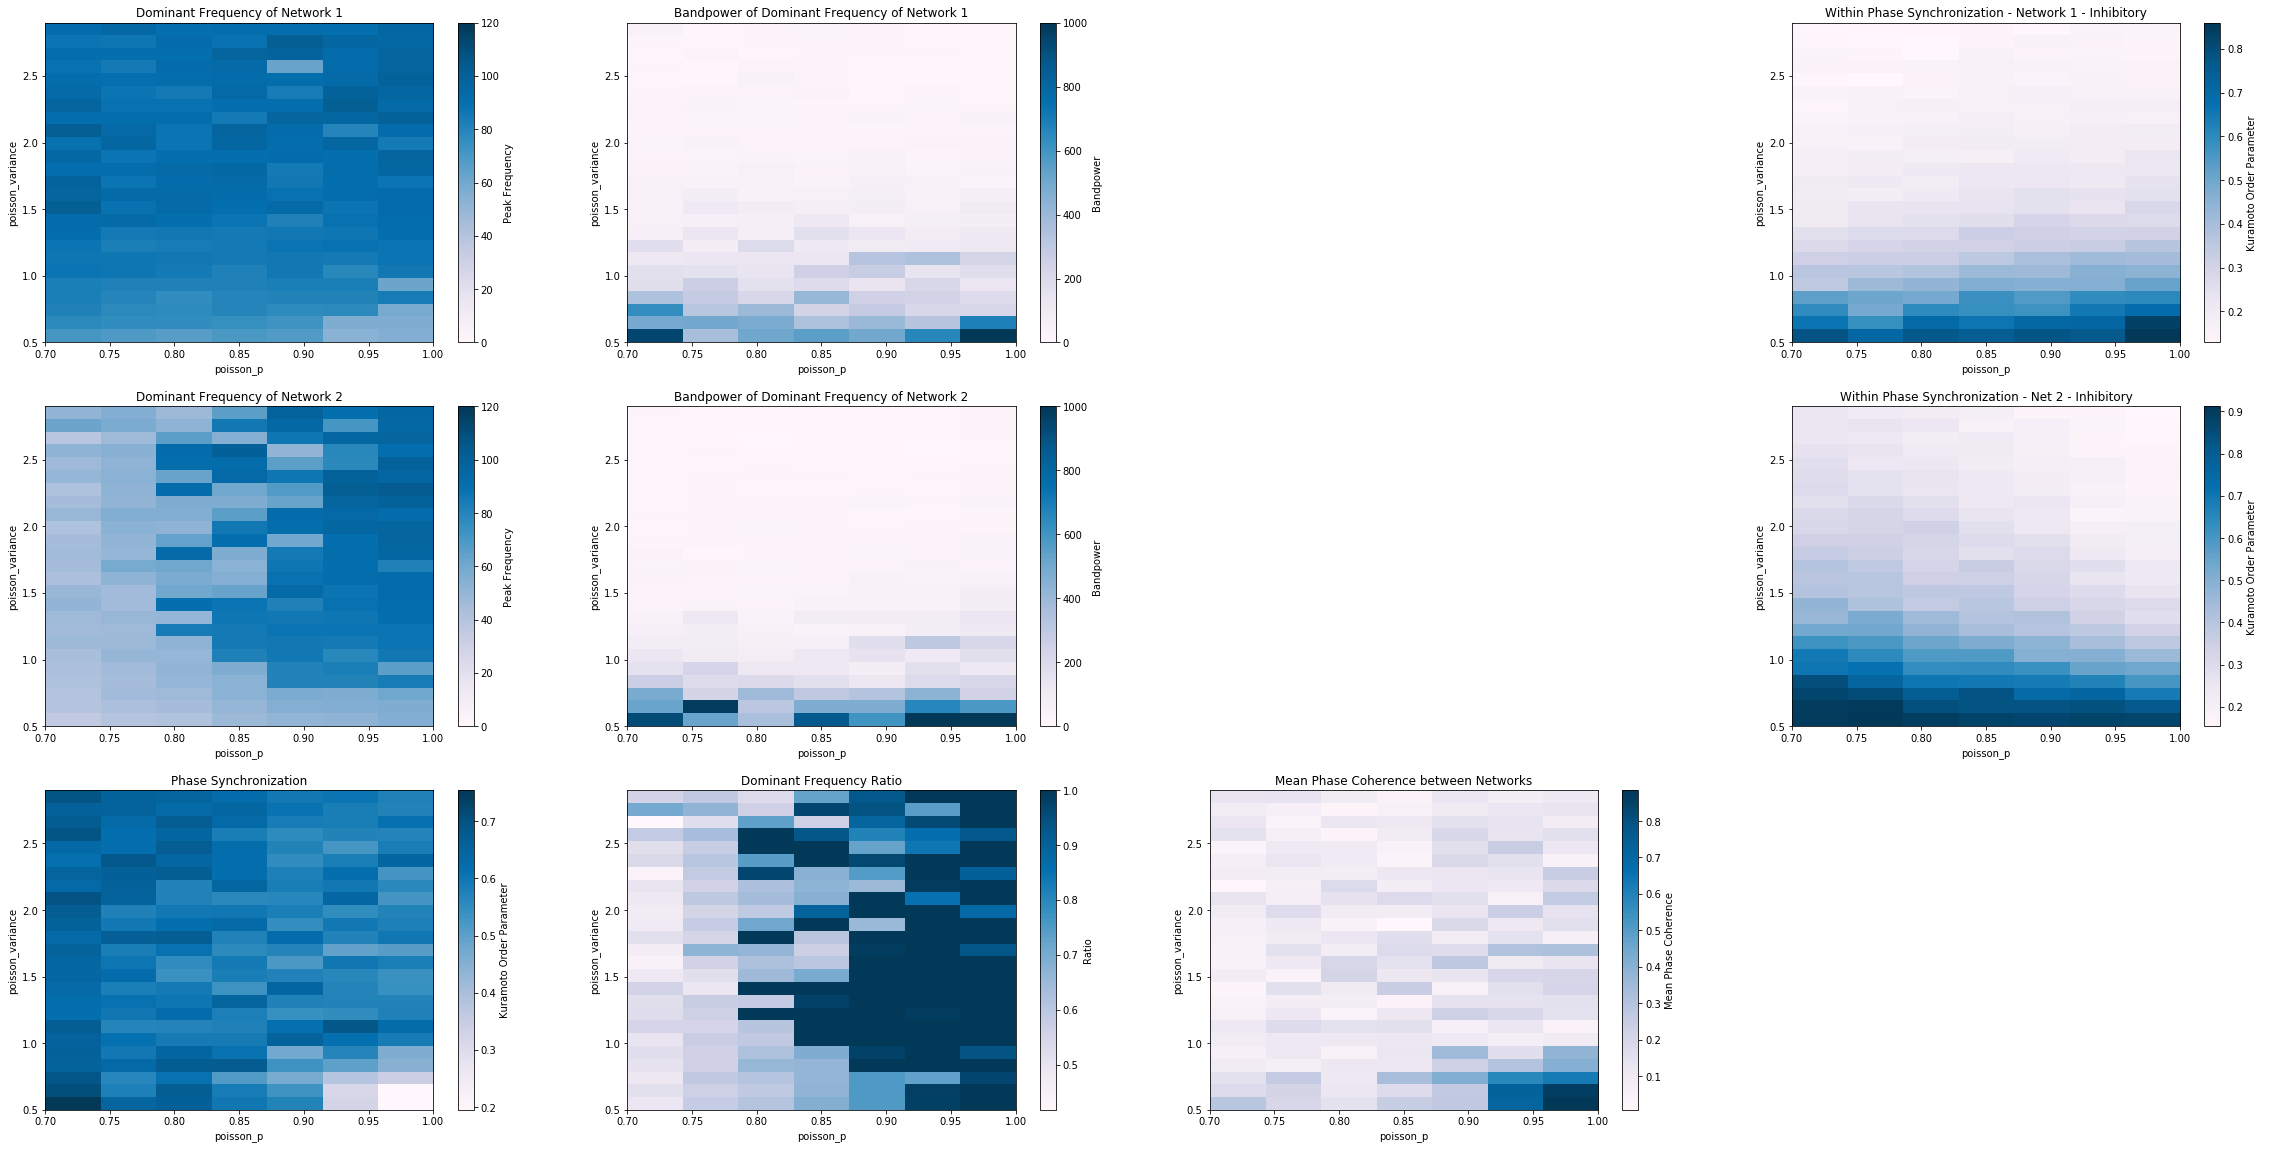

In [69]:
plots.plot_exploration(ex, vmin_ratio=None, vmin_phase=None, vmax_phase=None)

## Coupling Strength Exp

In [7]:
models = []
values = [0.1, 1, 2, 5, 10, 20]

for x in values:
    params_mid["J_itoi"] = x
    m = runner.run(
        modified_params=params_mid
    )
    models.append(m)

Initializing net ...
Net 1 - poisson rate 50000.0 - single neuron 62.5 - strength 0.01
Poisson rate to I pop: 62.5
Net 2 - rate for single neuron 43.75
Initialization time: 0.6223320960998535s
Starting simulation at t=0. s for a duration of 0.5 s
0.5 s (100%) simulated in 4s


INFO       width adjusted from 10. ms to 10.05 ms [brian2.monitors.ratemonitor.adjusted_width]


runtime: 17.8
Initializing net ...
Net 1 - poisson rate 50000.0 - single neuron 62.5 - strength 0.01
Poisson rate to I pop: 62.5
Net 2 - rate for single neuron 43.75
Initialization time: 0.5154402256011963s
Starting simulation at t=0. s for a duration of 0.5 s
0.5 s (100%) simulated in 4s
runtime: 10.3
Initializing net ...
Net 1 - poisson rate 50000.0 - single neuron 62.5 - strength 0.01
Poisson rate to I pop: 62.5
Net 2 - rate for single neuron 43.75
Initialization time: 0.5864319801330566s
Starting simulation at t=0. s for a duration of 0.5 s
0.5 s (100%) simulated in 4s
runtime: 10.4
Initializing net ...
Net 1 - poisson rate 50000.0 - single neuron 62.5 - strength 0.01
Poisson rate to I pop: 62.5
Net 2 - rate for single neuron 43.75
Initialization time: 0.5321500301361084s
Starting simulation at t=0. s for a duration of 0.5 s
0.5 s (100%) simulated in 3s
runtime: 9.9
Initializing net ...
Net 1 - poisson rate 50000.0 - single neuron 62.5 - strength 0.01
Poisson rate to I pop: 62.5
Ne

----- J_itoi: 0.1 ----- 
----- J_itoi: 1 ----- 
----- J_itoi: 2 ----- 


WARNING    /Users/lrebscher/git/Synchronization-by-Uncorrelated-Noise/synchronization/plots.py:629: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(20, 5))
 [py.warnings]
  fig = plt.figure(figsize=(20, 5))

WARNING    /Users/lrebscher/git/Synchronization-by-Uncorrelated-Noise/synchronization/plots.py:283: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2, figsize=(40, 15))
 [py.warnings]
  fig, axs = plt.subplots(1, 2, figsize=(40, 15))



----- J_itoi: 5 ----- 


WARNING    /Users/lrebscher/git/Synchronization-by-Uncorrelated-Noise/synchronization/plots.py:302: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2, figsize=(20, 5))
 [py.warnings]
  fig, axs = plt.subplots(1, 2, figsize=(20, 5))

WARNING    /Users/lrebscher/git/Synchronization-by-Uncorrelated-Noise/synchronization/plots.py:655: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(2, 2, figsize=(20, 10), sharey="col")
 [py.warnings]
  fig, axs = plt.subplots(2, 2, figsize=(20, 10), sharey="col")

WARN

----- J_itoi: 10 ----- 
----- J_itoi: 20 ----- 


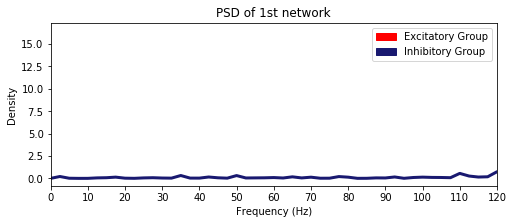

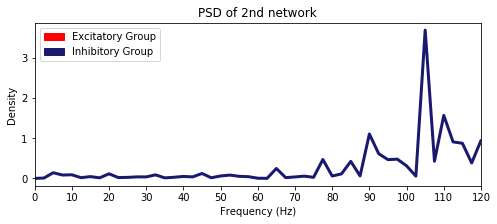

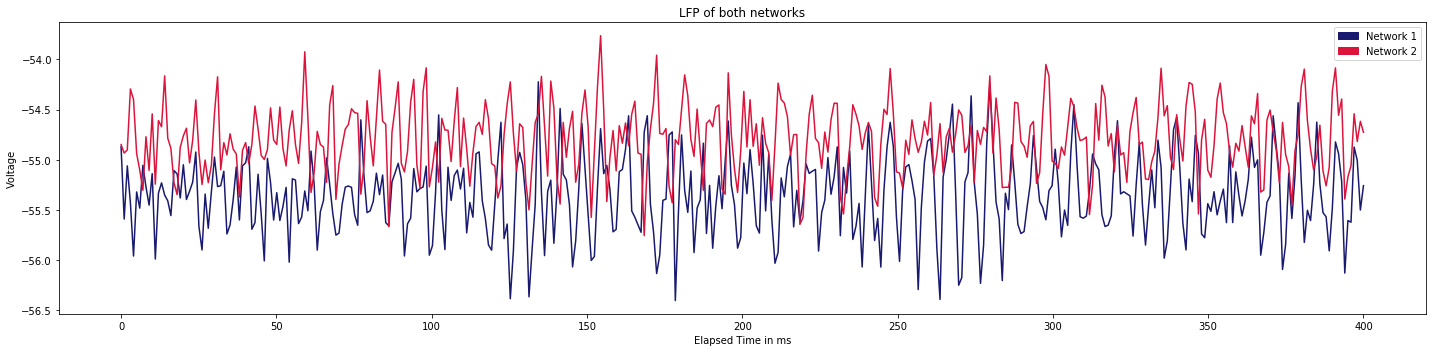

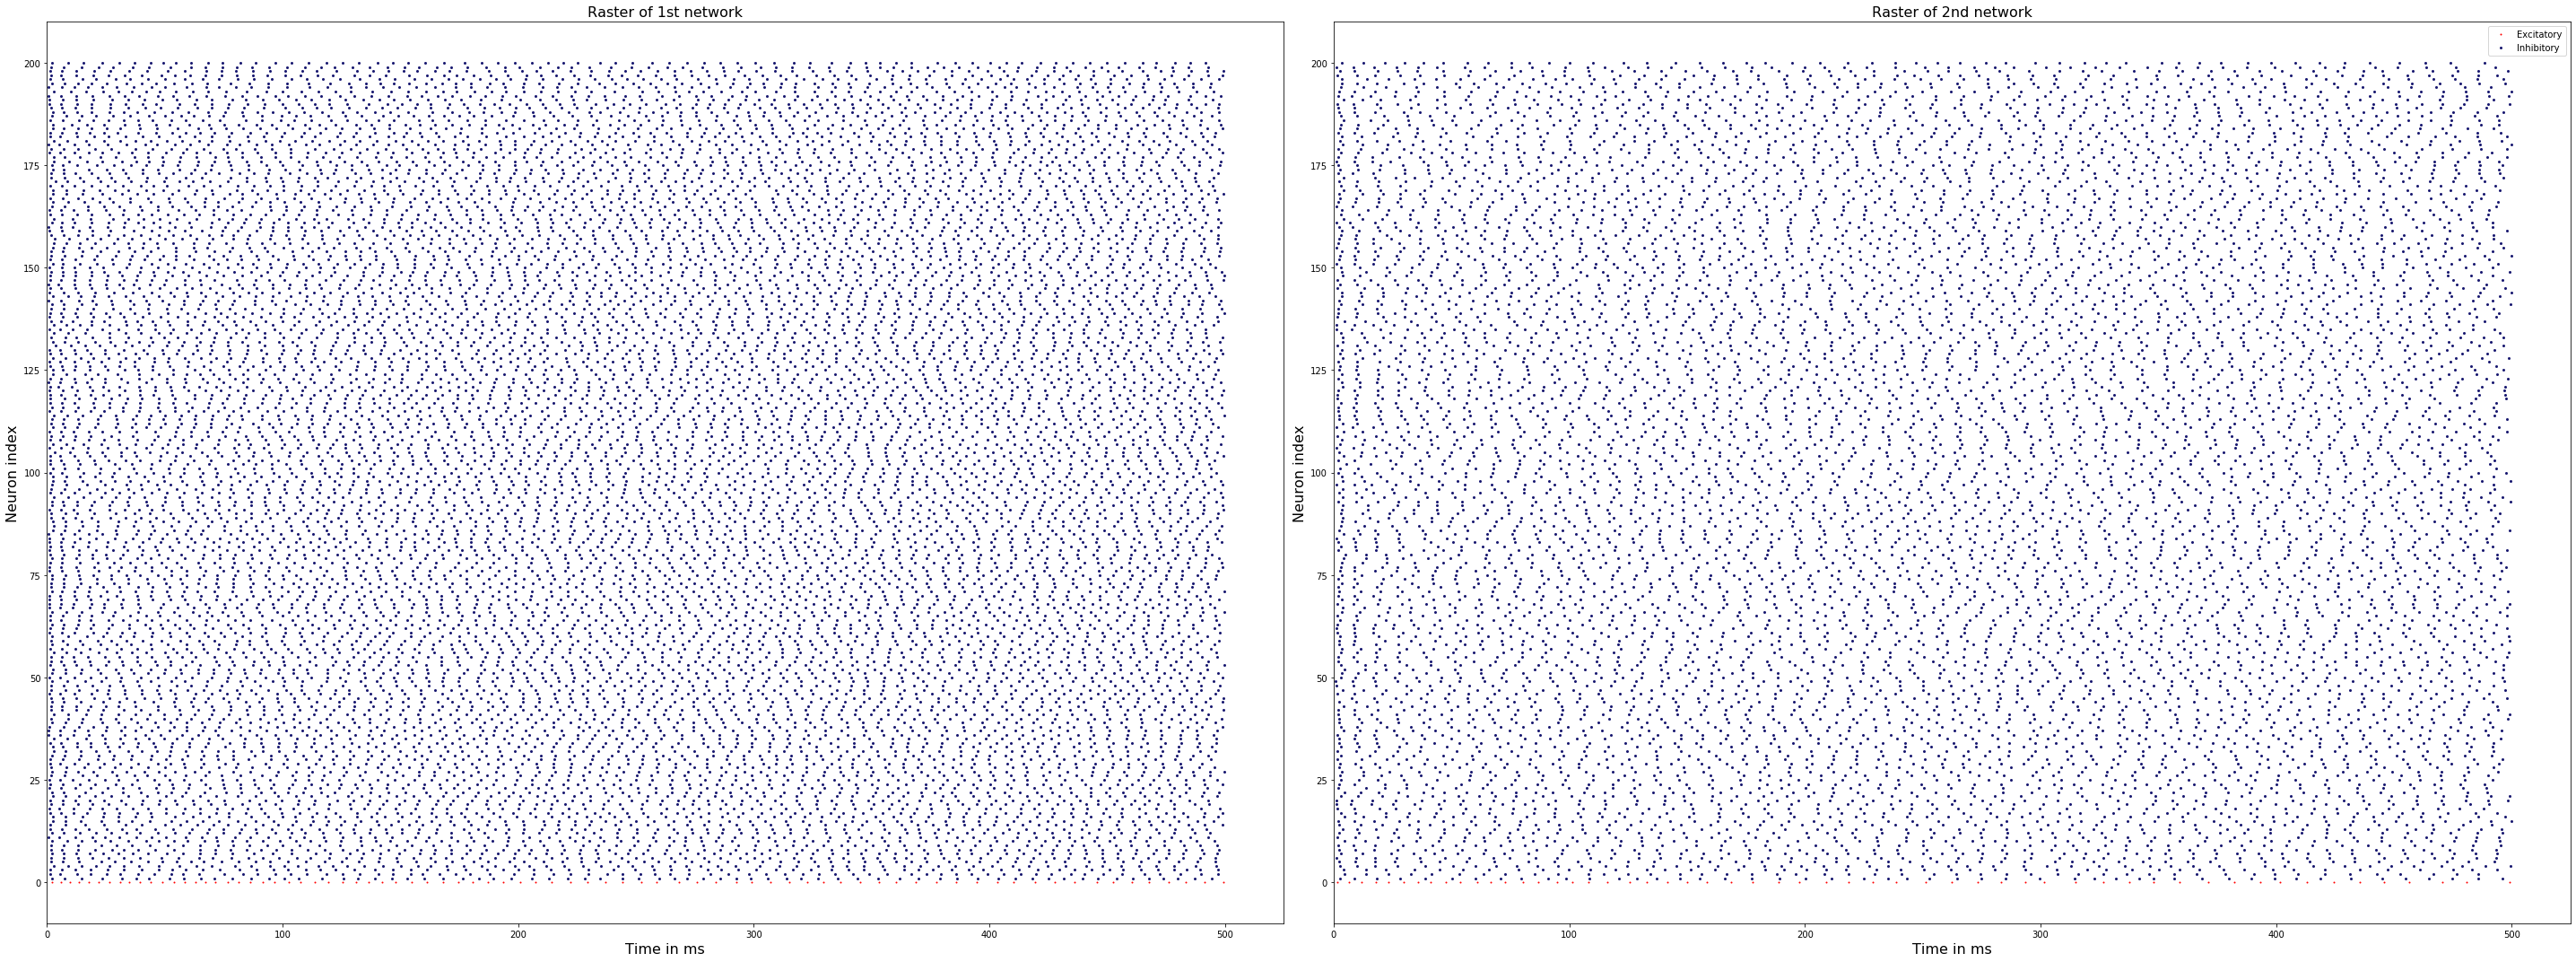

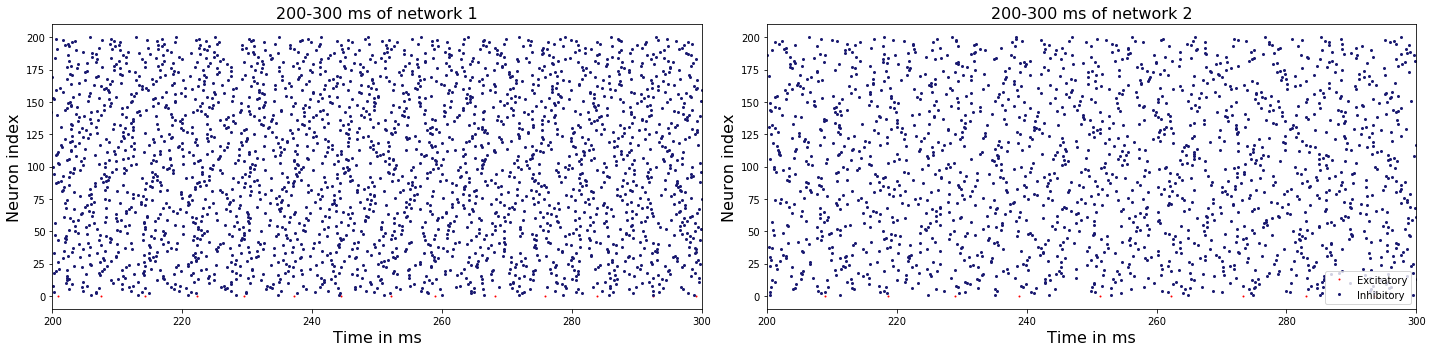

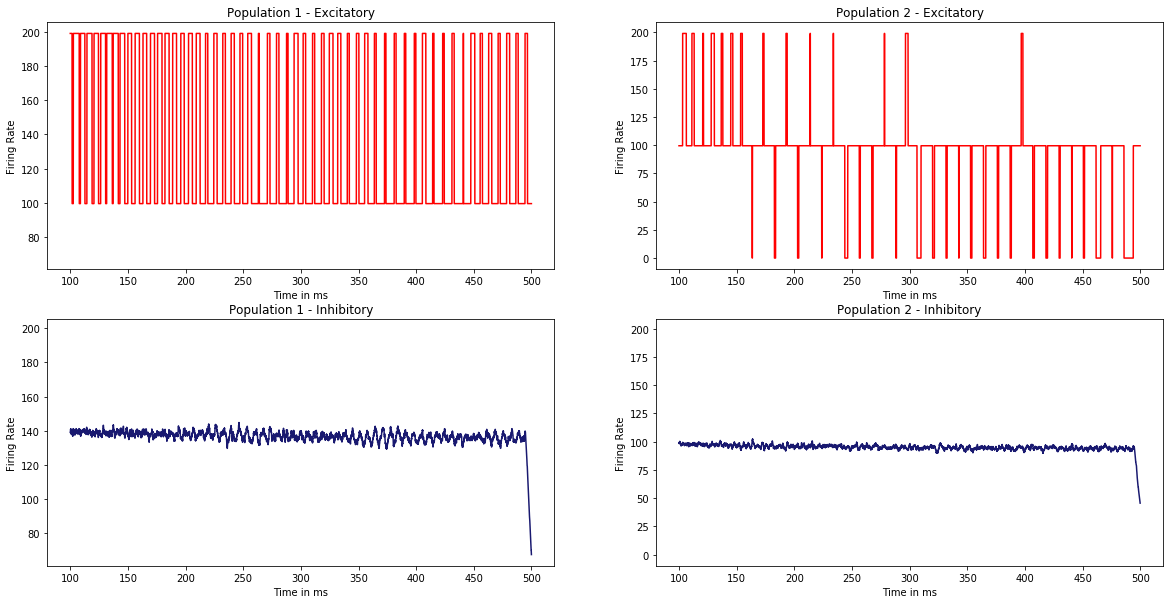

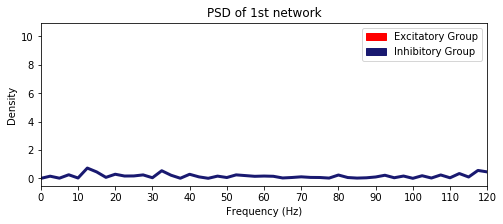

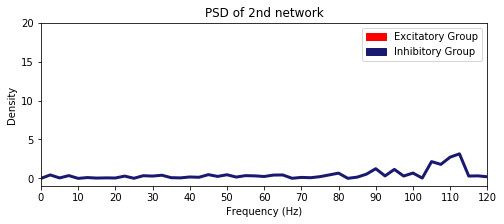

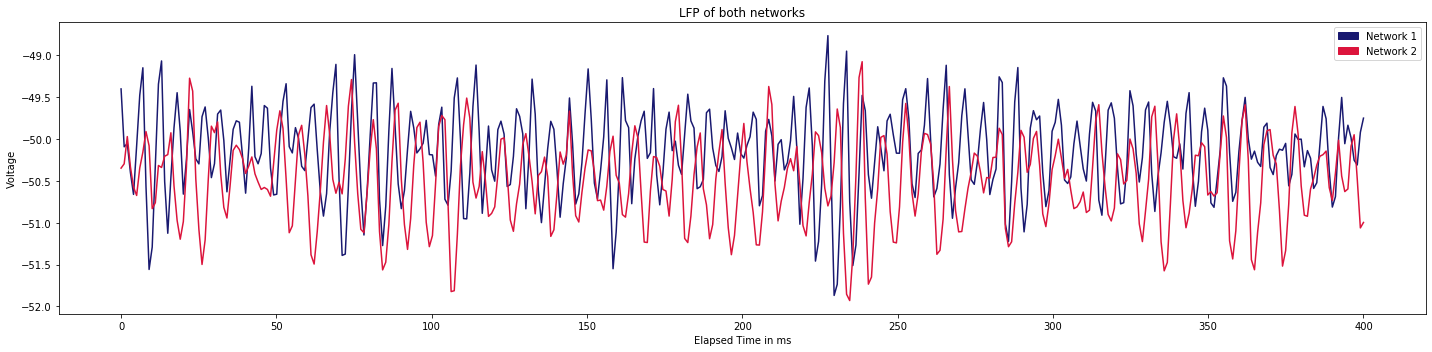

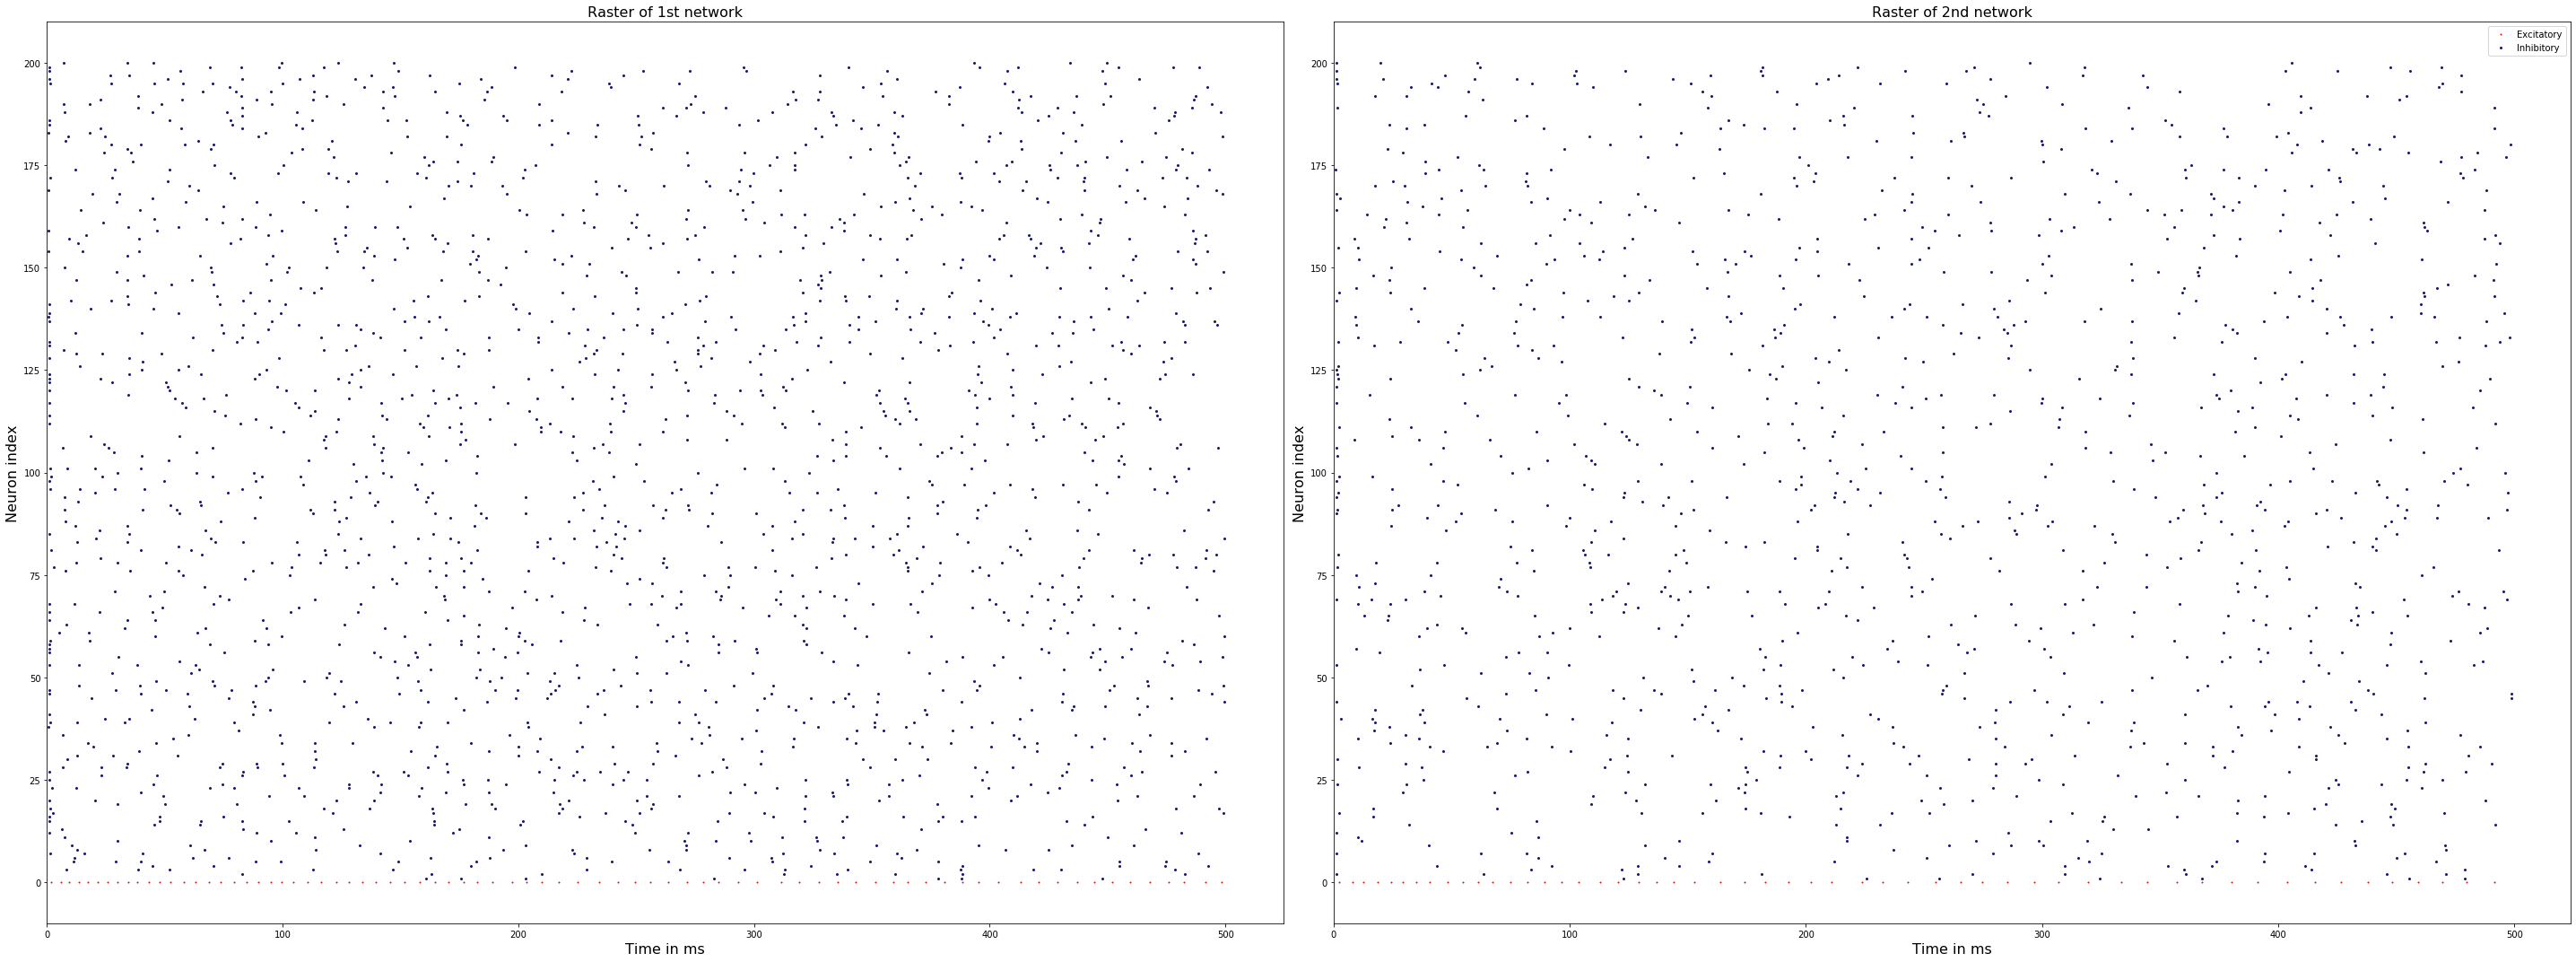

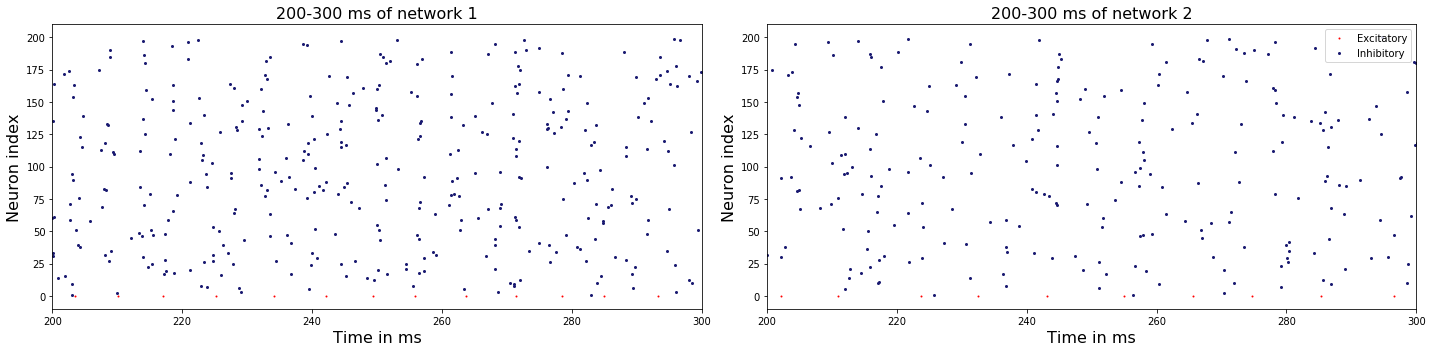

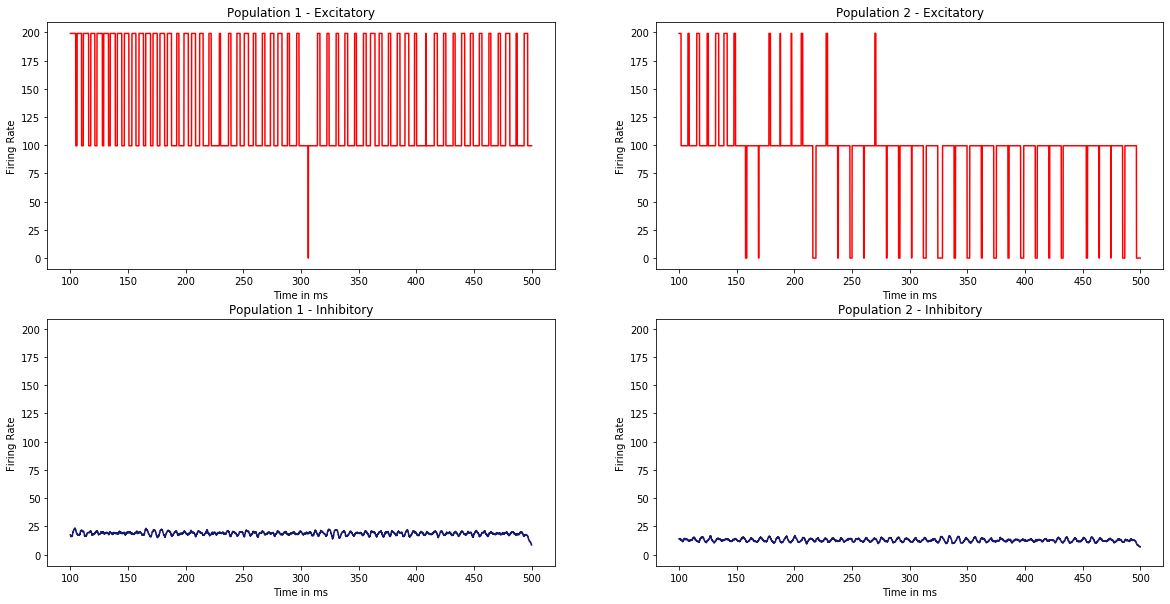

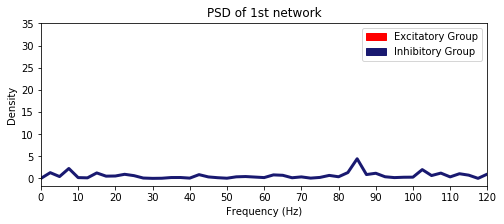

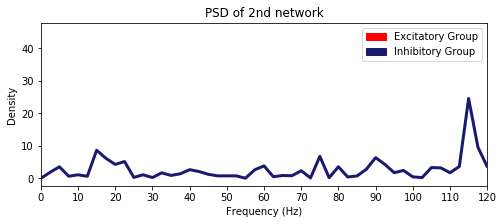

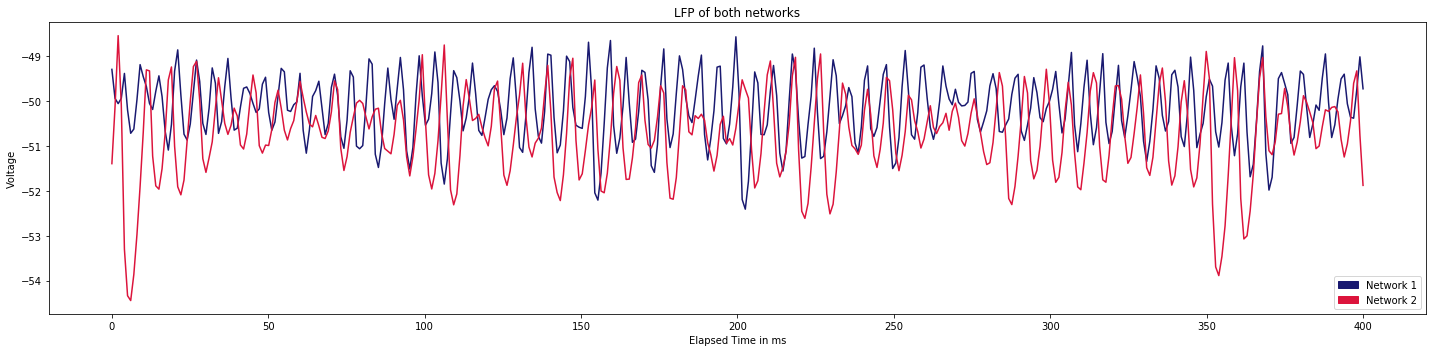

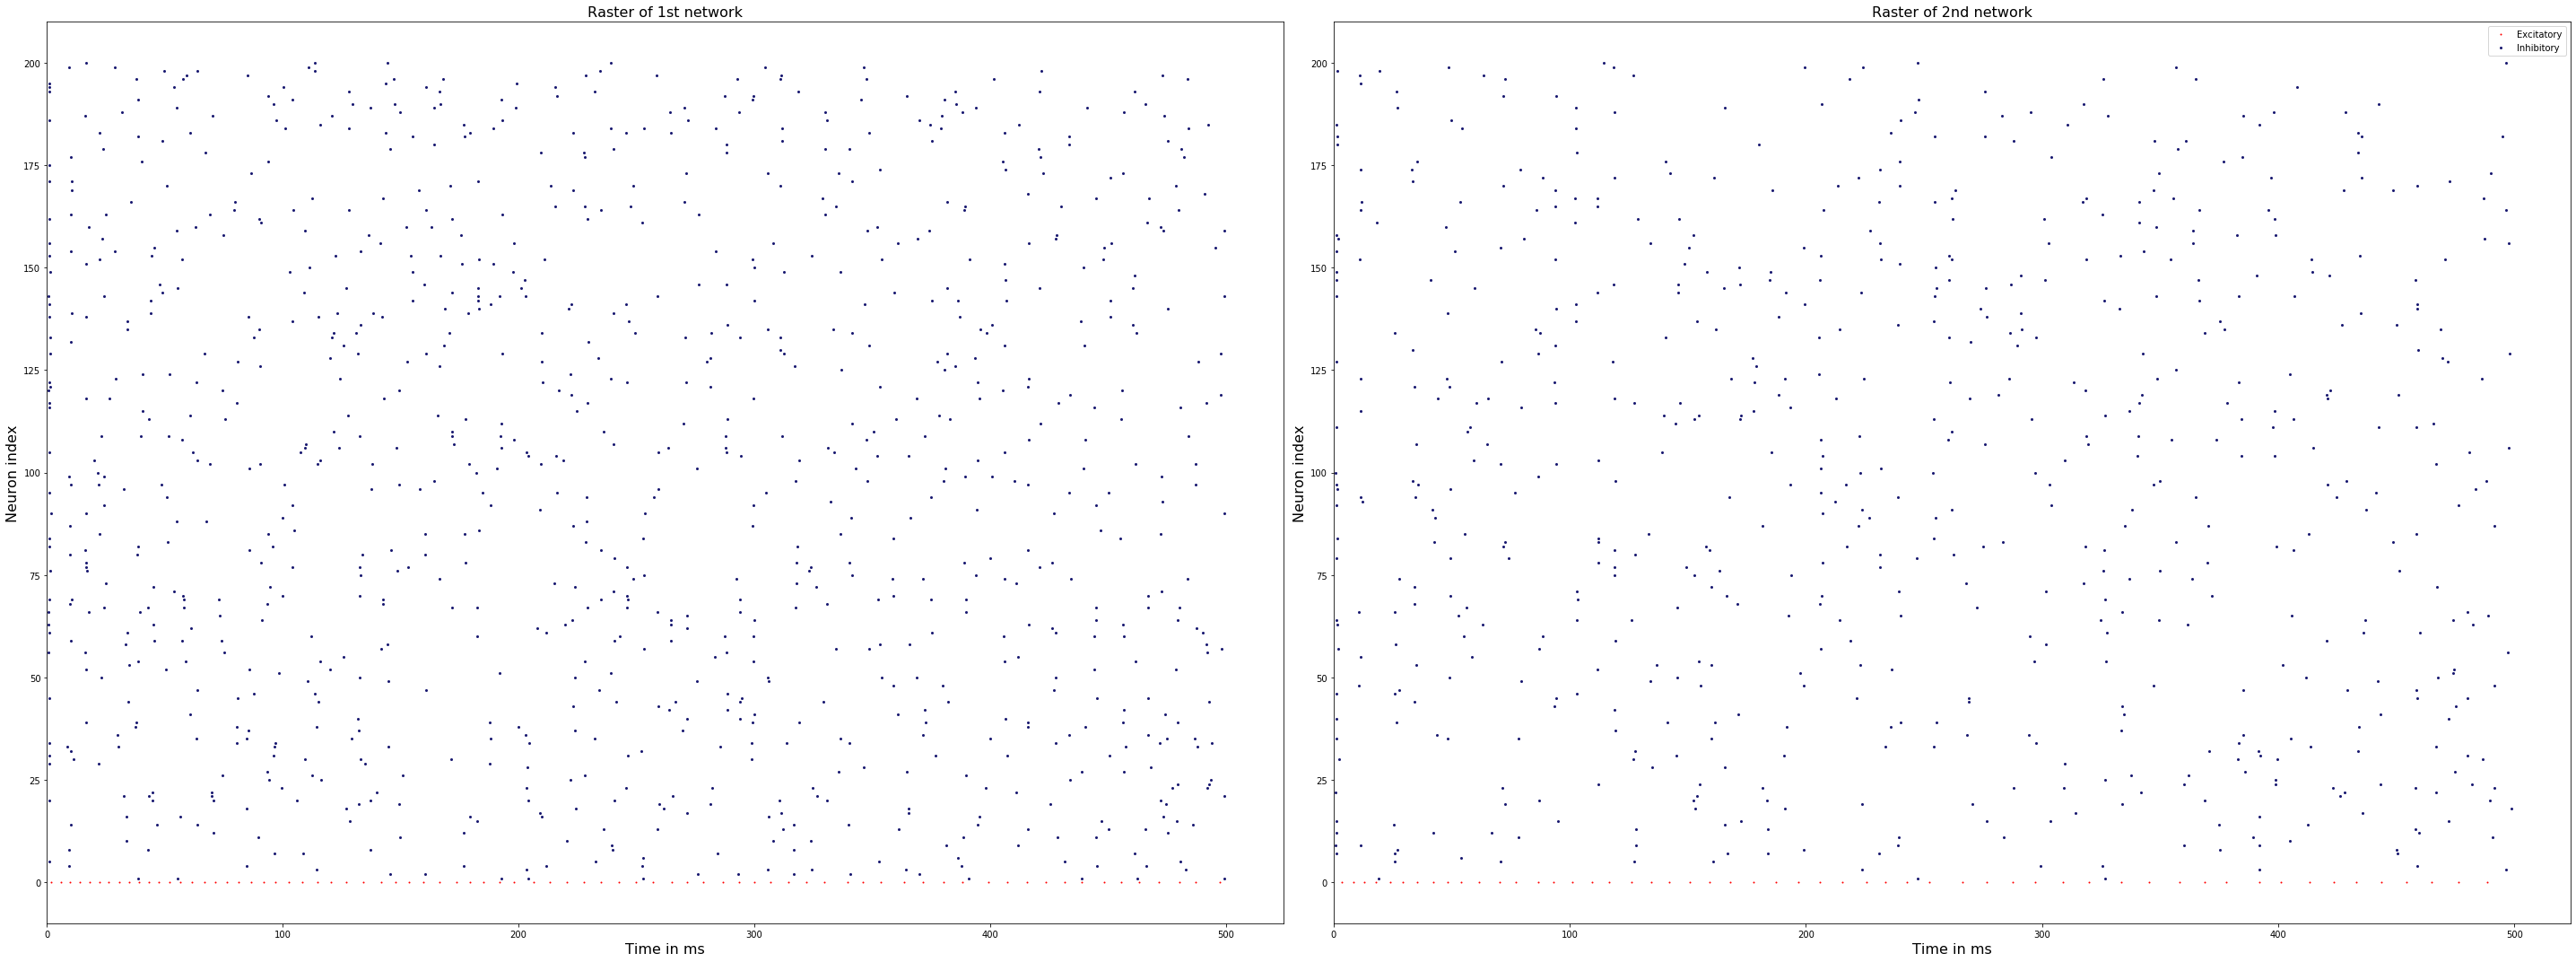

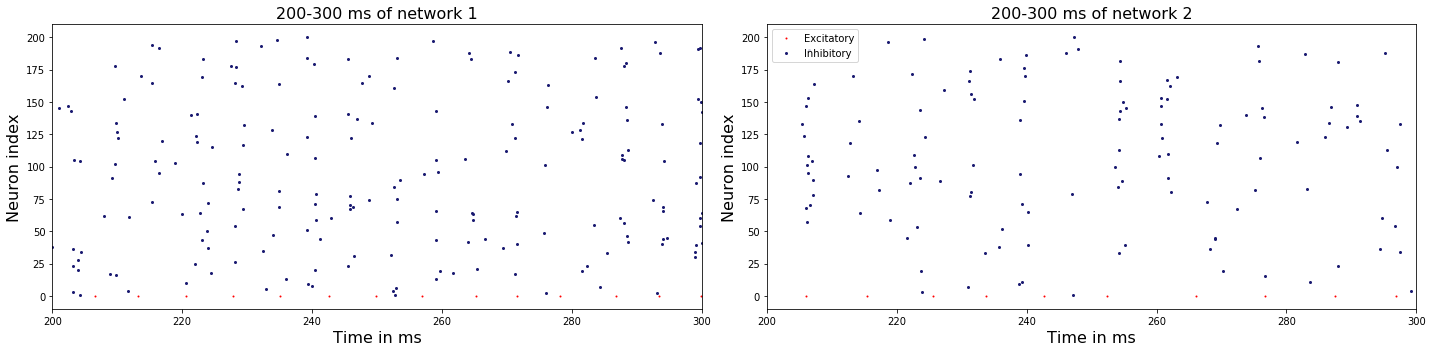

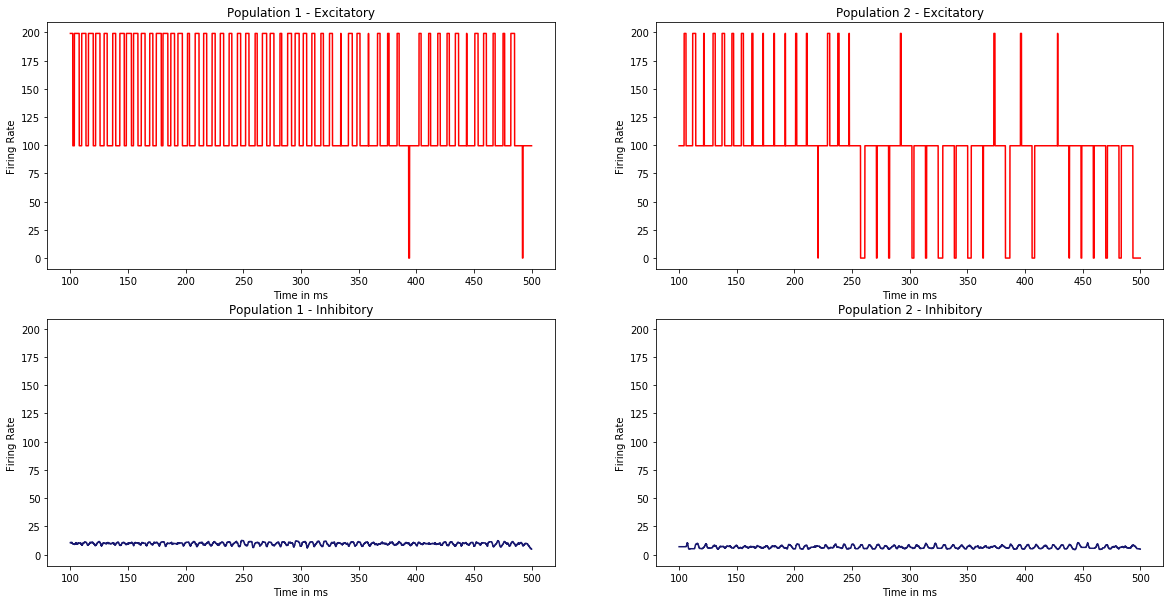

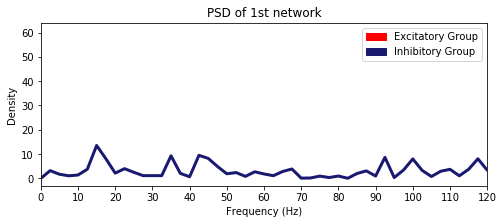

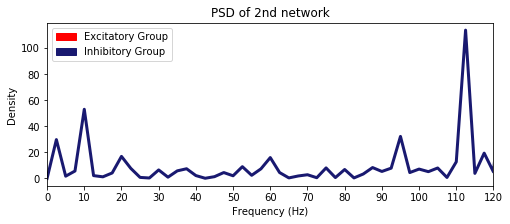

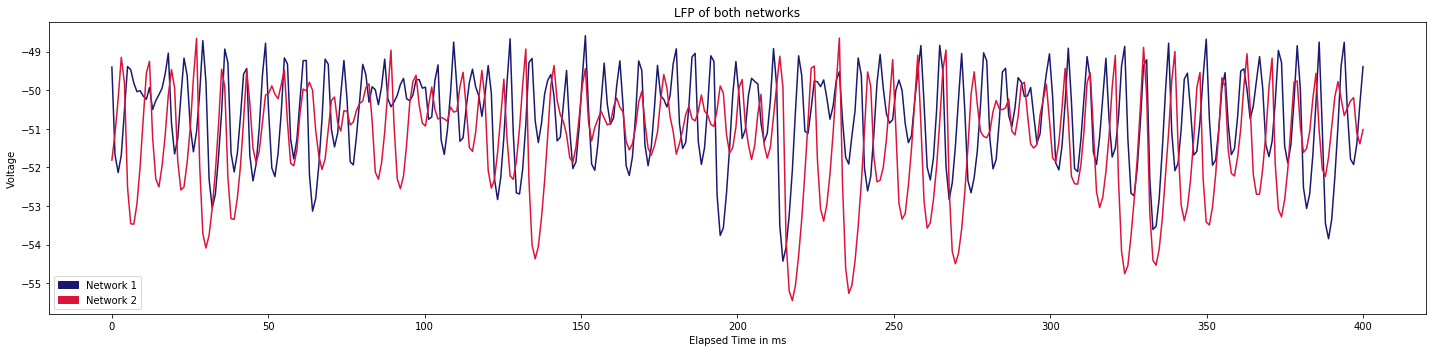

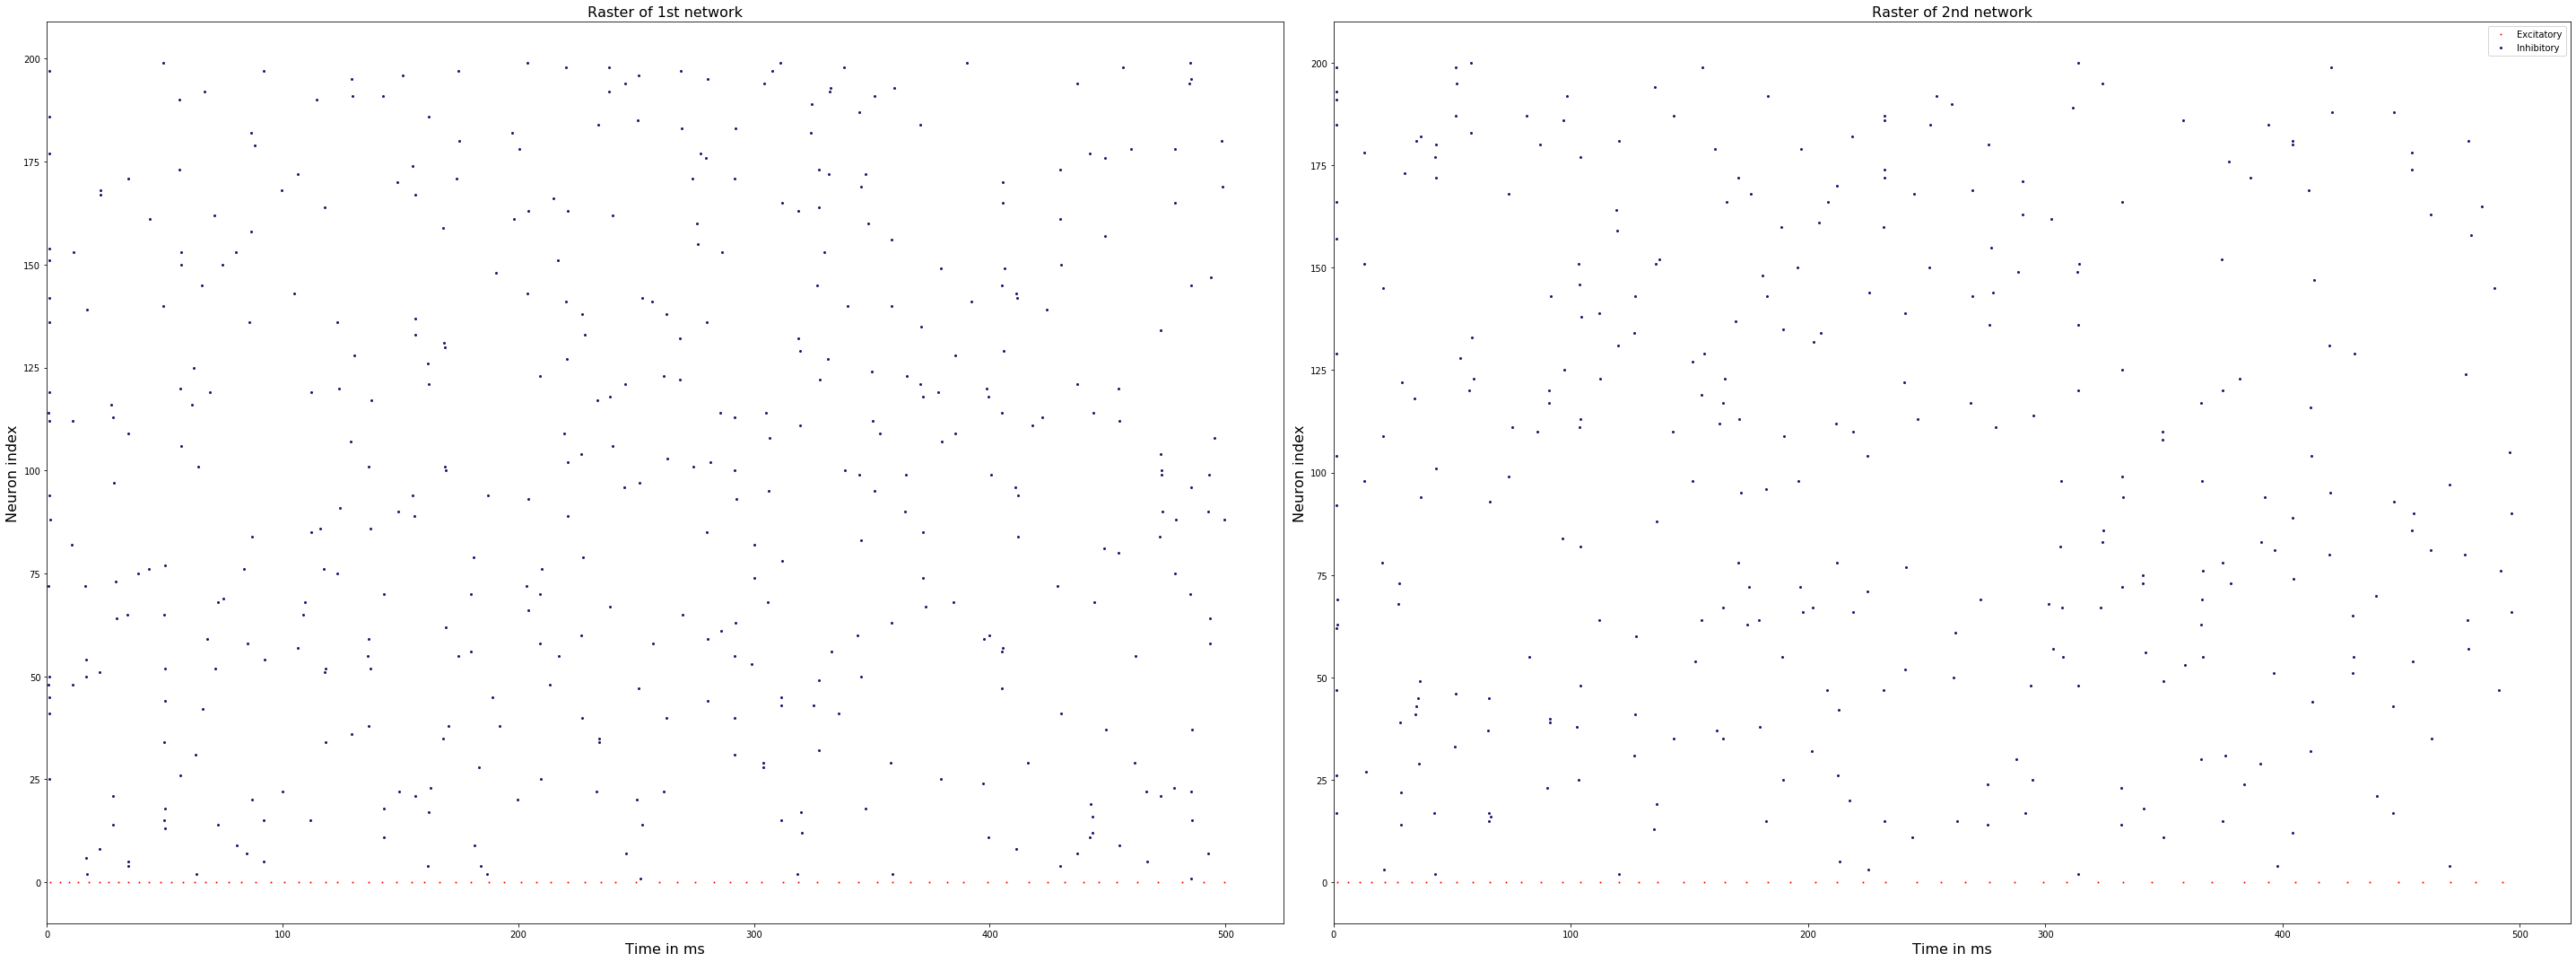

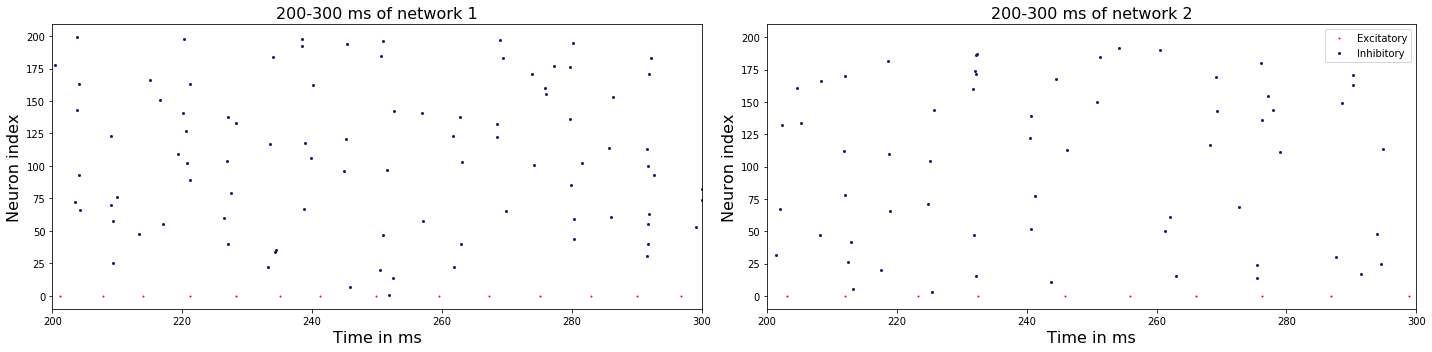

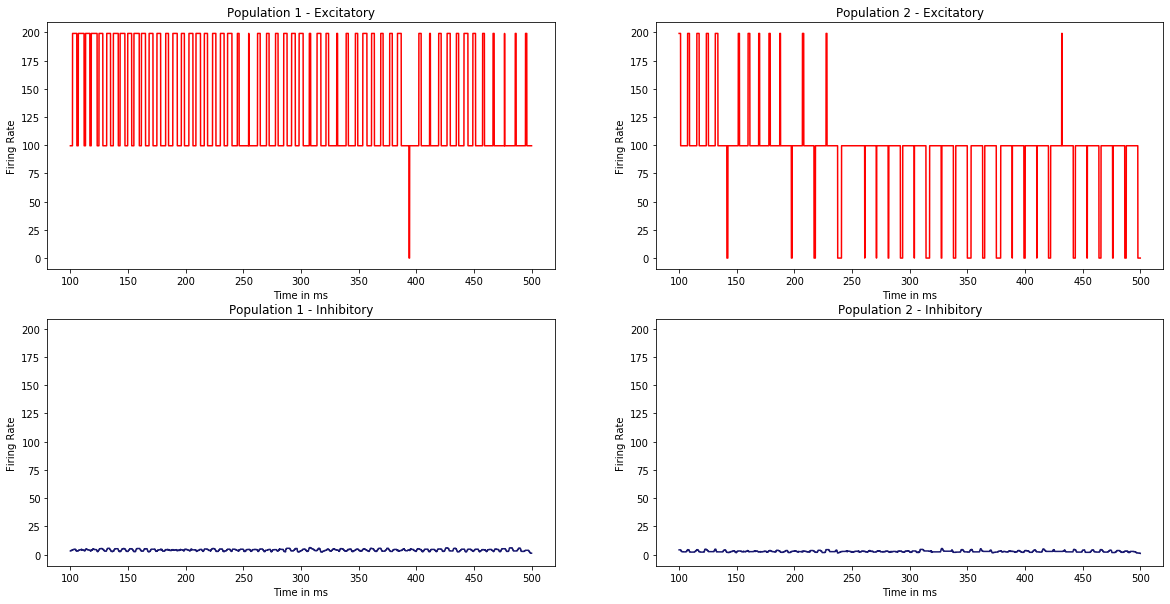

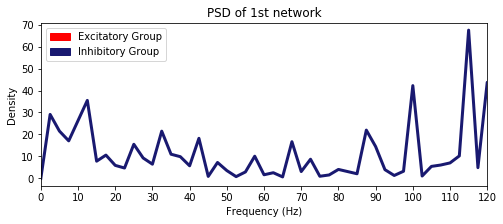

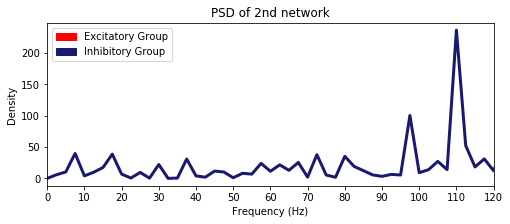

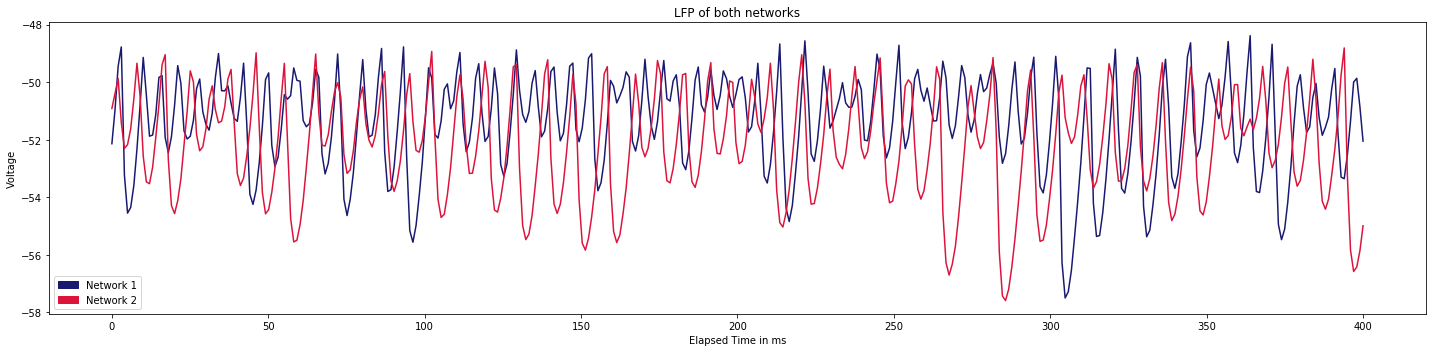

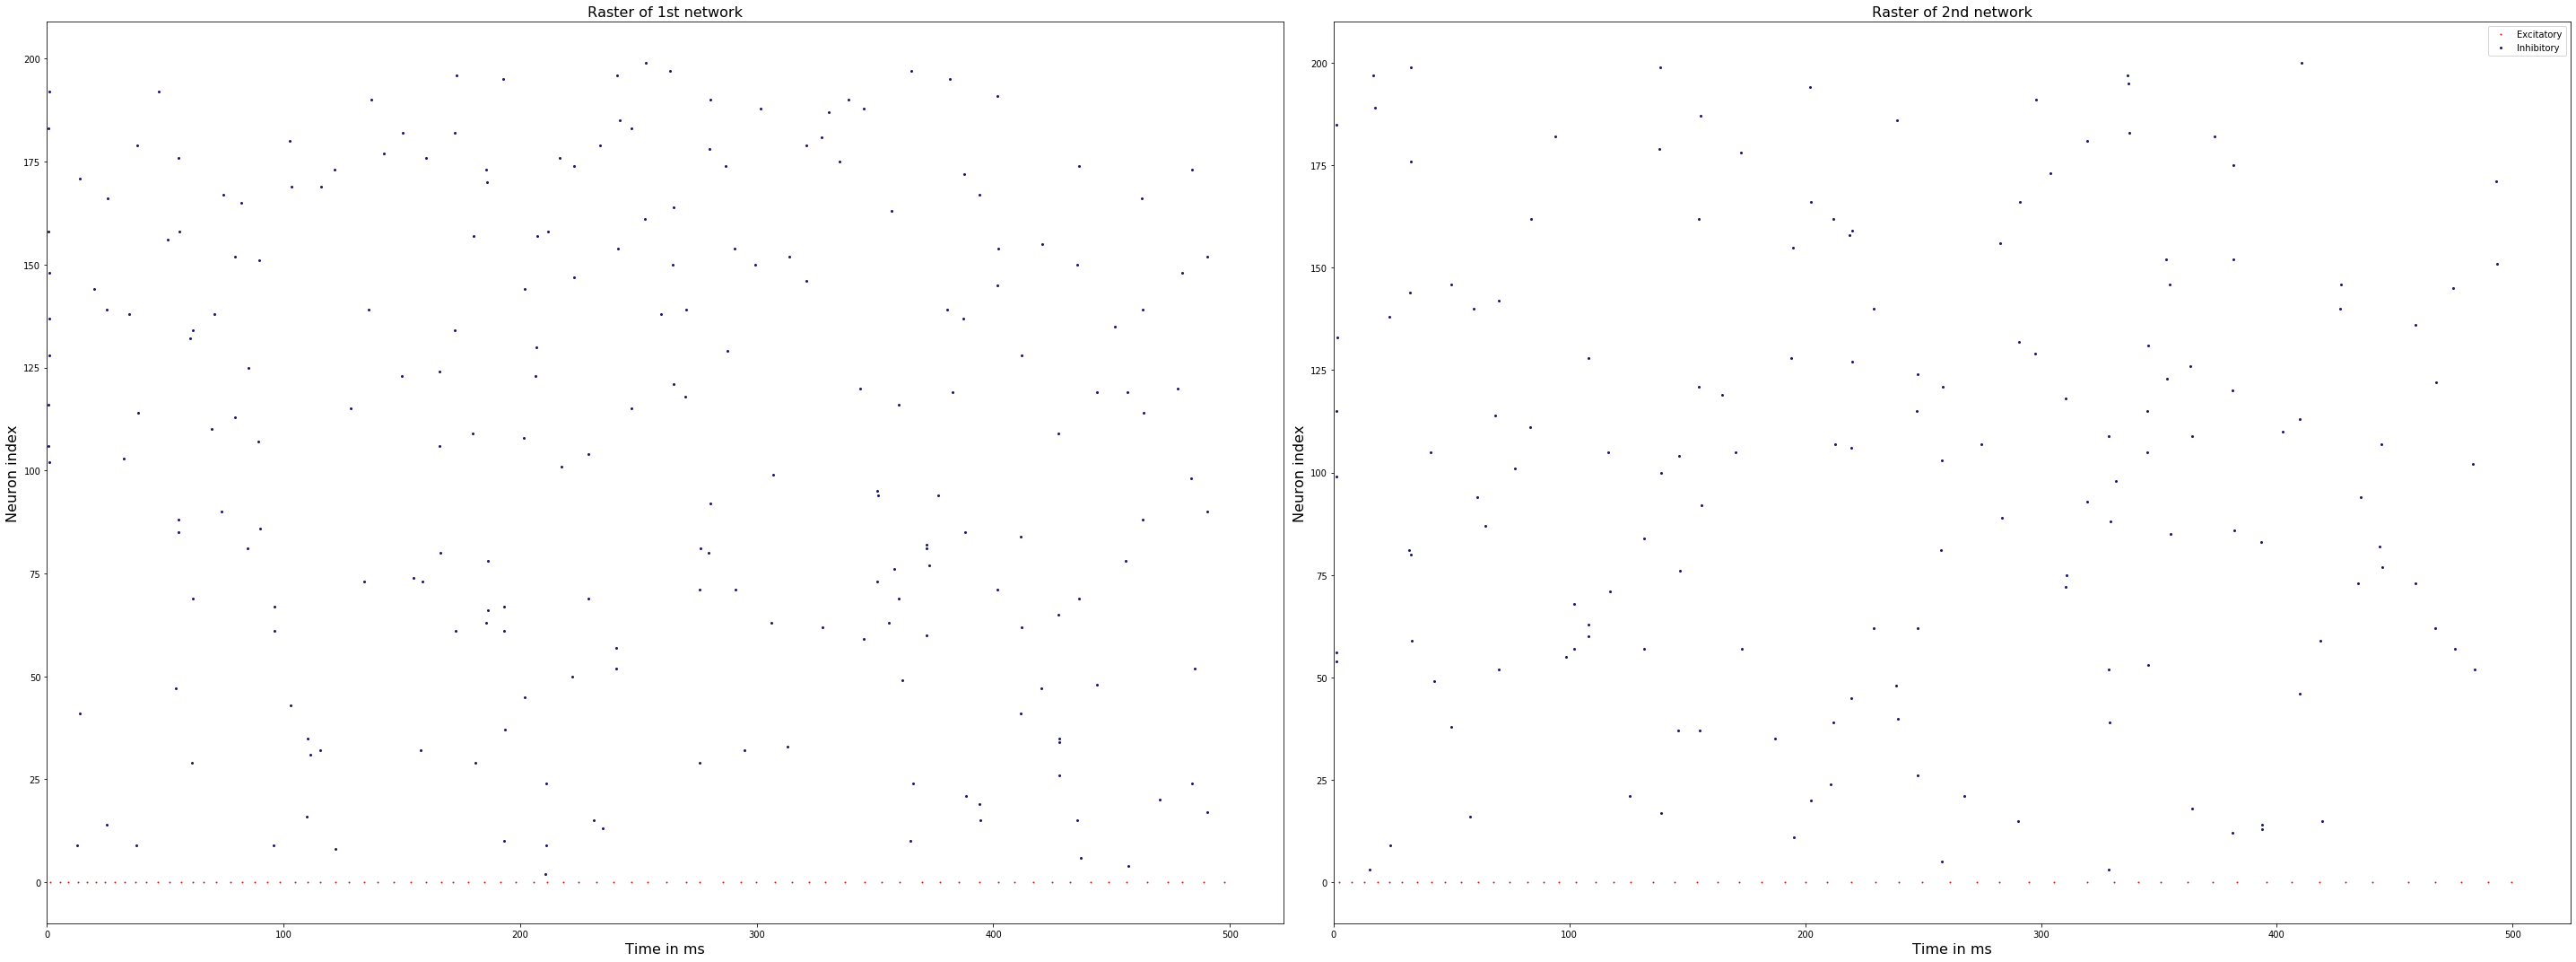

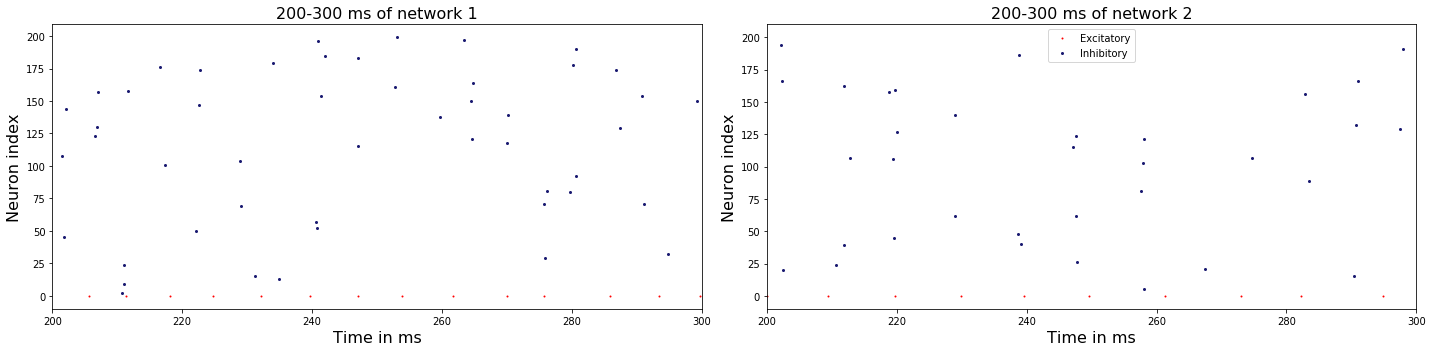

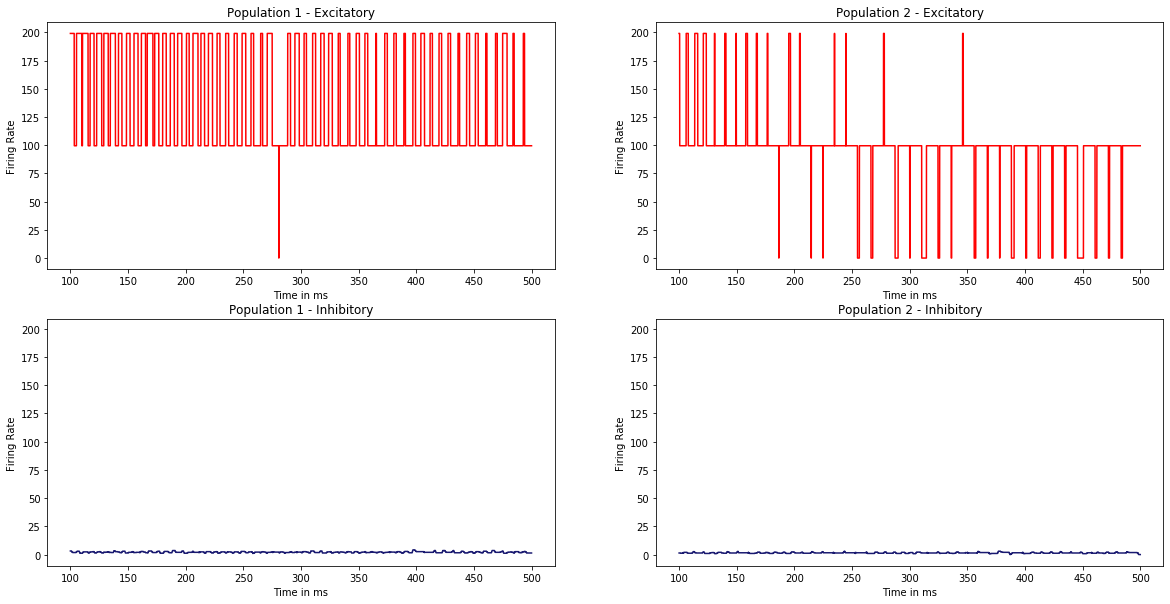

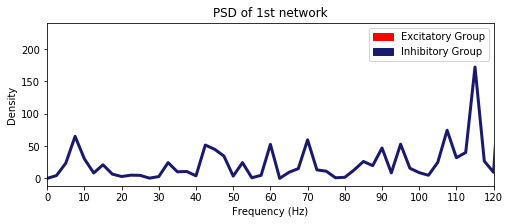

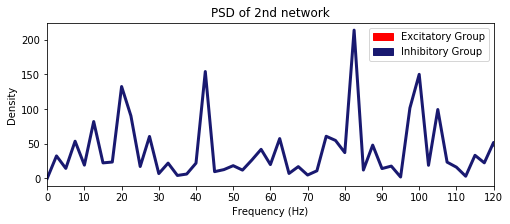

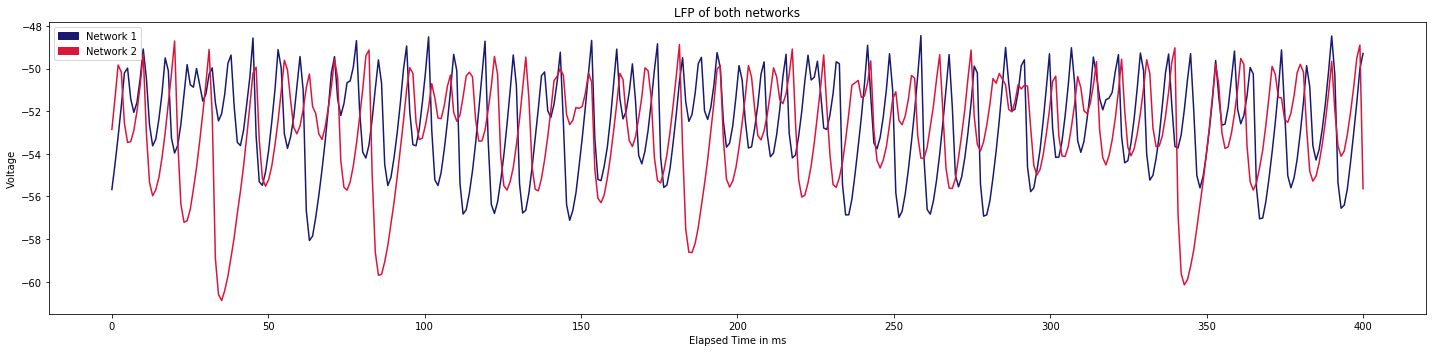

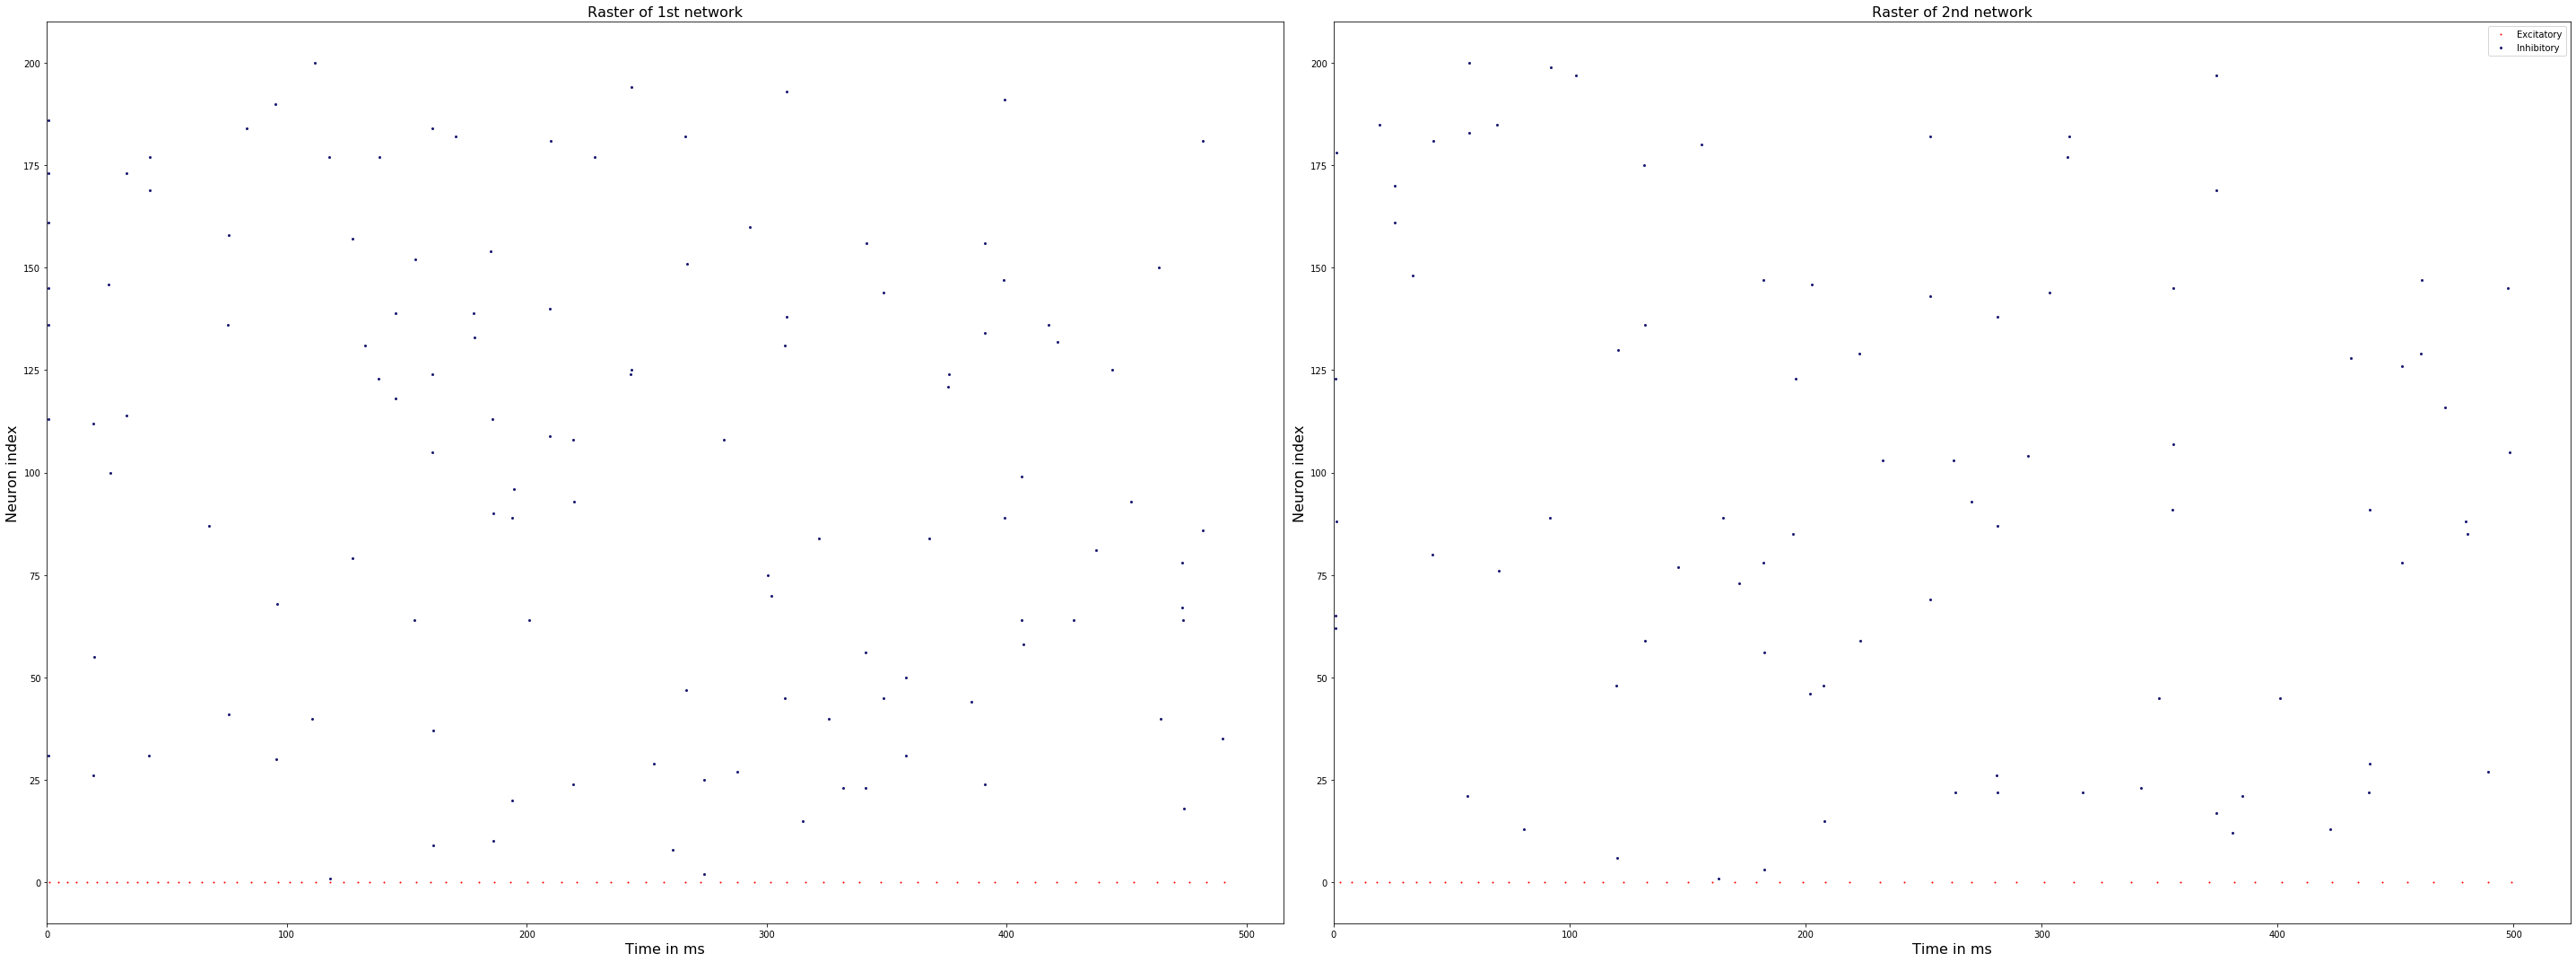

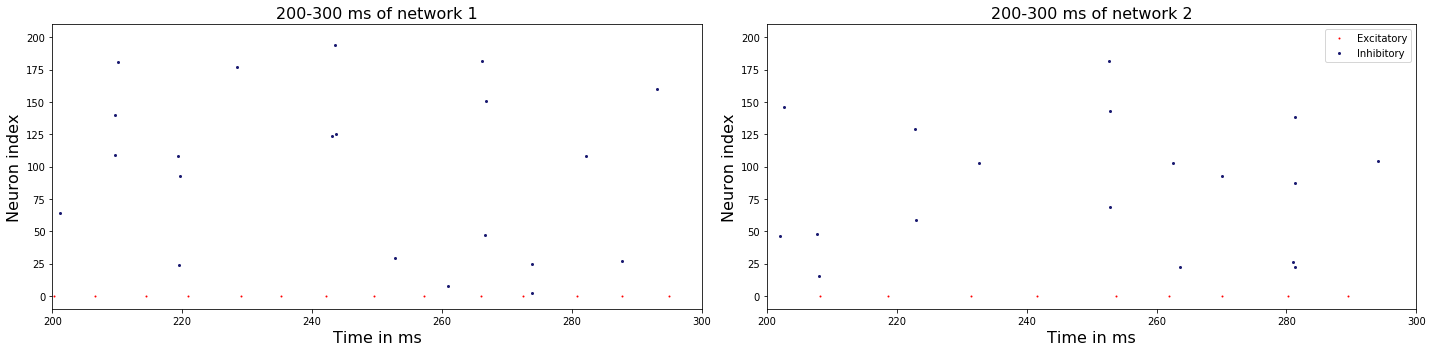

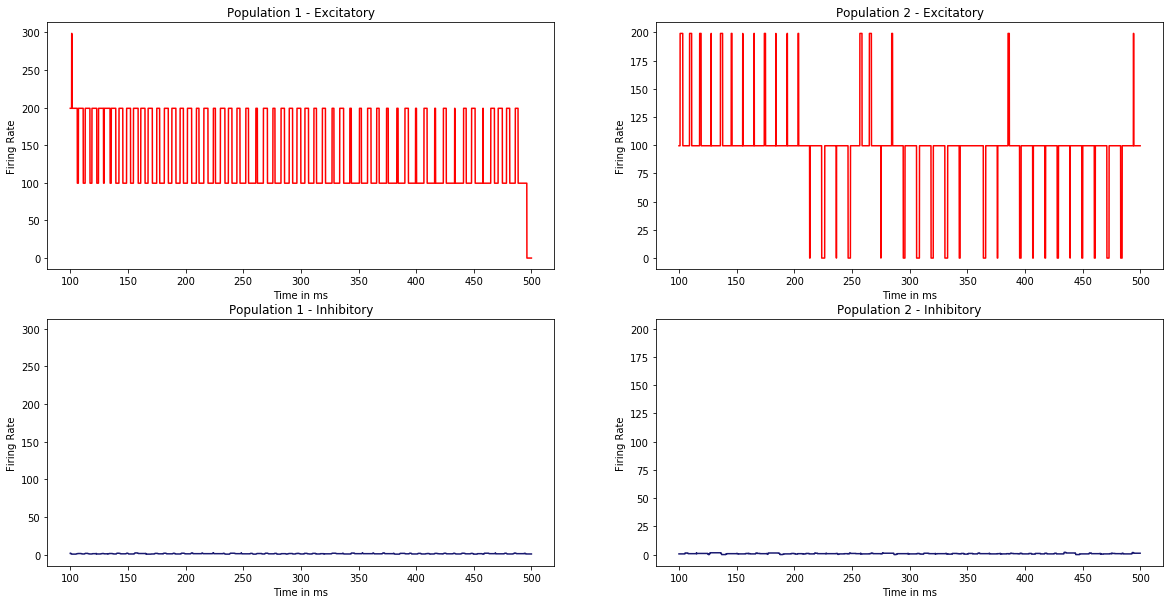

In [8]:
for m, v in zip(models, values):
    print(f"----- J_itoi: {v} ----- ")
    plots.plot_results(m, pop_rates=True, full_raster=True)
    plt.show()